In [1]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import h5py
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2
import pyute as ut

from importlib import reload
reload(ut)
import scipy.ndimage.filters as sfi
import scipy.stats as sst
import scipy.ndimage.measurements as snm
from mpl_toolkits.mplot3d import Axes3D
import size_contrast_analysis as sca
reload(sca)
import retinotopy_analysis as rt
import scipy.optimize as sop
import sklearn
import pdb

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [2]:
def tack_on(thisfold,thisfile,rg=(2,-10),criterion=lambda x:np.abs(x)>100):
    folds.append(thisfold)
    files.append(thisfile)
    rgs.append(rg)
    criteria.append(criterion)
    
folds = []
files = []
rgs = []
criteria = []


thisfold = '190225/M10344/'
thisfile = 'M10344_600_002'
rg = (1,-10)
criterion = lambda x:np.abs(x)>0
tack_on(thisfold,thisfile,rg,criterion)

# something weird about triggers in the size-contrast part of this

# thisfold = '190102/M10130/'
# thisfile = 'M10130_110_001'
# rg = (1,-10)
# criterion = lambda x:np.abs(x)>0
# tack_on(thisfold,thisfile,rg,criterion)

reload(rt)
ret,paramdict,pval,trialrun,has_inverse,nbydepth,proc = rt.analyze_everything(folds,files,rgs,criteria,datafoldbase='/media/mossing/data_ssd/data/2P/',stimfoldbase='/home/mossing/modulation/visual_stim/')

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [8]:
keylist = list(ret.keys())
k = 0
ret[keylist[k]].shape

(253, 9, 9)

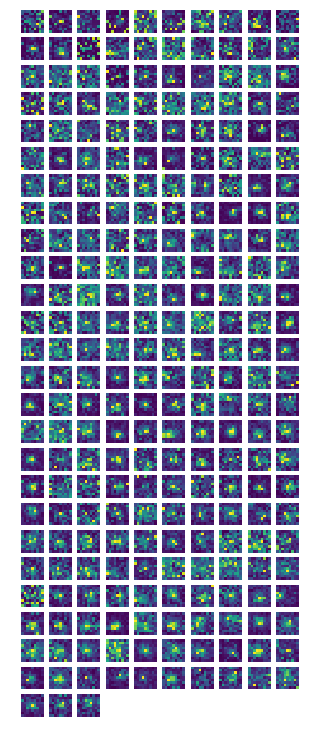

In [10]:
plt.figure()
ut.imshow_in_rows(ret[keylist[k]])

In [14]:
folds = []
files = []
rets = []
adjust_fns = []
rgs = []
criteria = []
datafoldbases = []

def tack_on(thisfold,thisfile,retnumber,frame_adjust=None,rg=(1,0),criterion=lambda x: np.abs(x)>100,datafoldbase=None):
    folds.append(thisfold)
    files.append(thisfile)
    rets.append(retnumber)
    adjust_fns.append(frame_adjust)
    rgs.append(rg)
    criteria.append(criterion)
    datafoldbases.append(datafoldbase)

thisfold = '190225/M10344/'
thisfile = 'M10344_600_003'
retnumber = '002'
datafoldbase = '/media/mossing/data_ssd/data/2P/'
rg = (1,-1)
# frame_adjust = lambda x: np.delete(x,6)
tack_on(thisfold,thisfile,retnumber,criterion=lambda x: np.abs(x)>100,datafoldbase=datafoldbase, rg=rg) #,frame_adjust=frame_adjust)


In [3]:
# soriavg,strialavg,lb,ub,pval,nbydepth,Sspont,Strials = analyze_everything(folds,files,rets,adjust_fns,rgs) #

In [16]:
reload(sca)
soriavg,ret_vars,proc = sca.analyze_everything_by_criterion(folds,files,rets,adjust_fns,rgs,criteria=criteria,datafoldbase=datafoldbases,stimfoldbase='/home/mossing/modulation/visual_stim/',criterion_cutoff=0.2)
# soriavg,strialavg,lb,ub,pval,nbydepth,spont,ret_vars,Smean_stat,proc = sca.analyze_everything_by_criterion(folds,files,rets,adjust_fns,rgs,criteria=criteria,datafoldbase='/media/mossing/backup_1/data/2P/',stimfoldbase='/home/mossing/modulation/visual_stim/',criterion_cutoff=0.2)

/media/mossing/data_ssd/data/2P/190225/M10344/retinotopy_002.mat
/media/mossing/data_ssd/data/2P/190225/M10344/ot/M10344_600_003_ot_000.rois
(253, 90660)
(253, 1440, 47)
0.0618055555556


/home/mossing/Documents/code/adesnal/size_contrast_analysis.py:107: RuntimeWarning: Mean of empty slice.
  trialrun[i] = np.abs(dxdt[frame[0::2][i]:frame[1::2][i]]).mean()
/home/mossing/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


/media/mossing/data_ssd/data/2P/190225/M10344/ot/M10344_600_003_ot_000.rois
(253, 90660)
(253, 1440, 47)
0.938194444444


/home/mossing/Documents/code/adesnal/size_contrast_analysis.py:150: RuntimeWarning: Mean of empty slice
  Smean_stat[:,i,j,k] = np.nanmean(data[:,stat],1)


0
1
2
3
0.0
45.0
90.0
135.0
loaded retinotopy file


In [17]:
keylist = list(soriavg.keys())

In [18]:
int(keylist[0].split('/')[0])
indicator = [int(key.split('/')[0])>181030 for key in keylist]
print(indicator)
ontarget_ret_lax = {}
for key in keylist:
    pos = ret_vars[key]['position']
    if indicator:
        pos = pos*np.array((1,-1))
    ontarget_ret_lax[key],_ = rt.ontarget_by_retinotopy(ret_vars[key],ctr=pos,rg=10)

[True]


In [19]:
keylist

['190225/M10344/']

In [20]:
for key in keylist:
    print(key)
    print(ontarget_ret_lax[key].sum())
#     print(ontarget[key].sum())

190225/M10344/
2


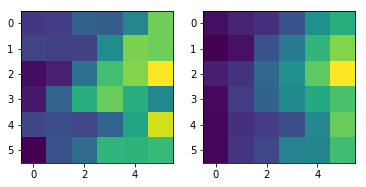

In [25]:
plt.figure()
# k = 0
# plt.subplot(2,2,1)
# plt.imshow(soriavg[keylist[k]][1][ontarget_ret_lax[keylist[k]]].mean(0))
# plt.savefig('l4_size_contrast_181127_non_running.pdf')
# k = 1
# plt.subplot(2,2,2)
# plt.imshow(soriavg[keylist[k]][0][ontarget_ret_lax[keylist[k]]].mean(0))
# # plt.savefig('l4_size_contrast_190202_non_running.pdf')
k = 0
plt.subplot(1,2,1)
plt.imshow(soriavg[keylist[k]][1][ontarget_ret_lax[keylist[k]]].mean(0))
plt.subplot(1,2,2)
plt.imshow(soriavg[keylist[k]][1].mean(0))
# plt.savefig('l4_size_contrast_181127_non_running.pdf')
# k = 1
# plt.subplot(2,2,4)
# plt.imshow(soriavg[keylist[k]][1][ontarget_ret_lax[keylist[k]]].mean(0))
# plt.savefig('l4_size_contrast_190202_non_running.pdf')
# plt.savefig('l4_summary_size_contrast.pdf')

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


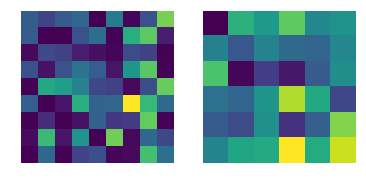

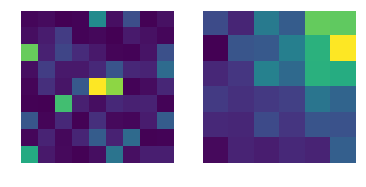

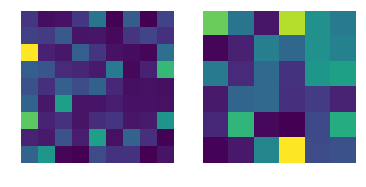

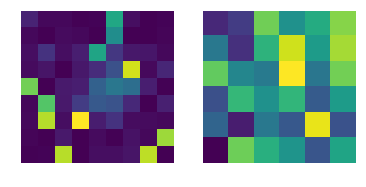

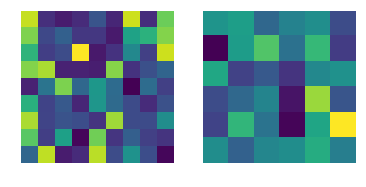

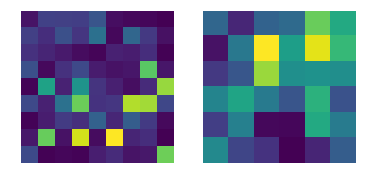

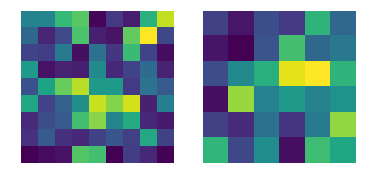

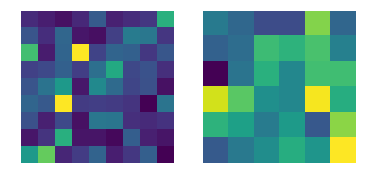

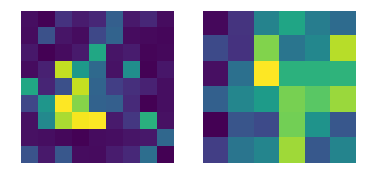

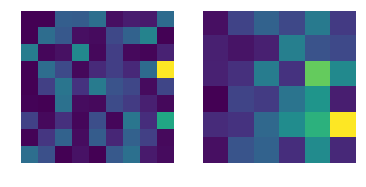

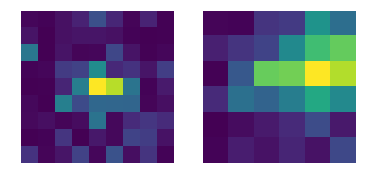

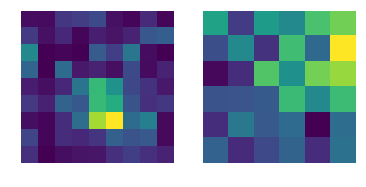

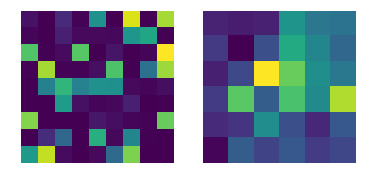

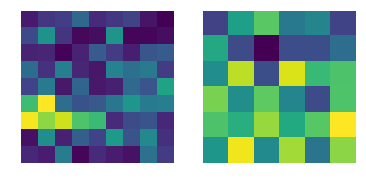

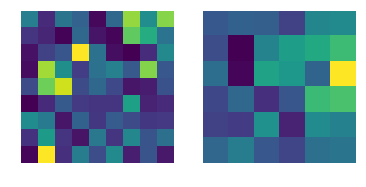

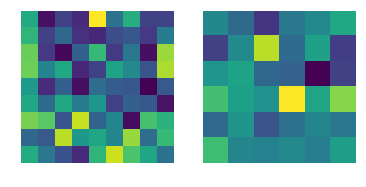

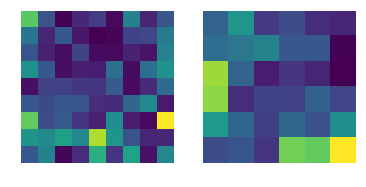

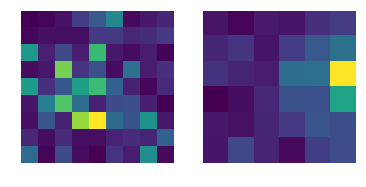

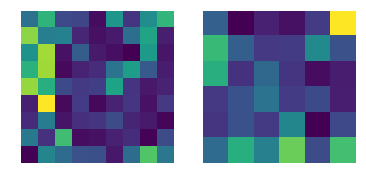

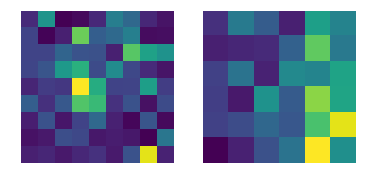

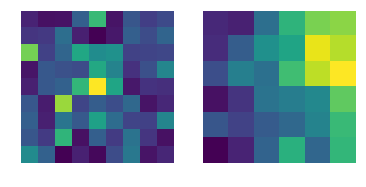

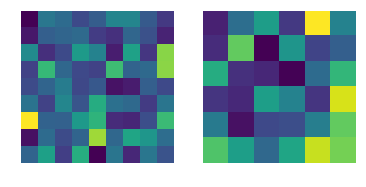

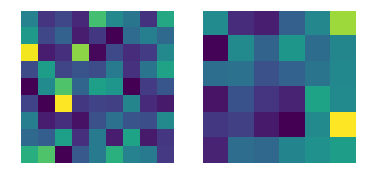

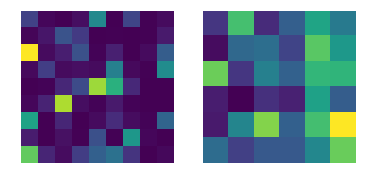

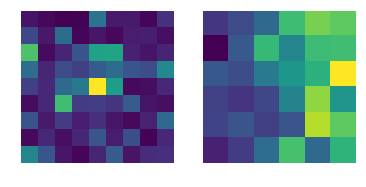

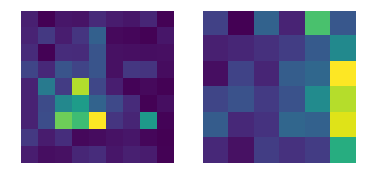

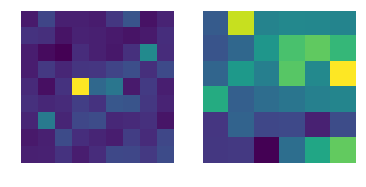

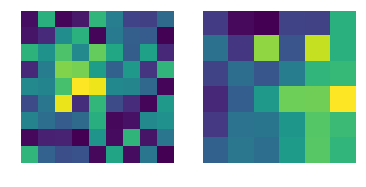

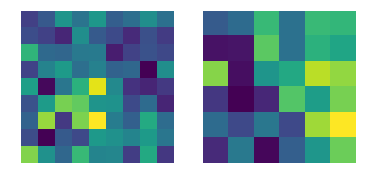

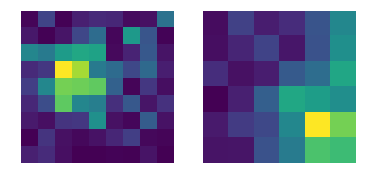

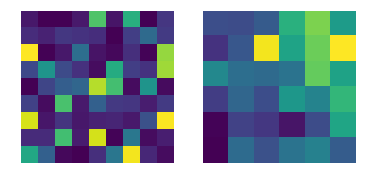

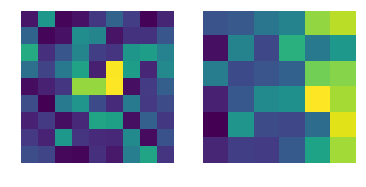

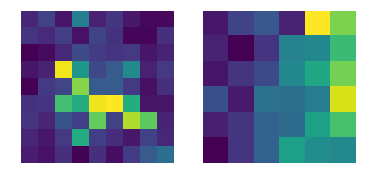

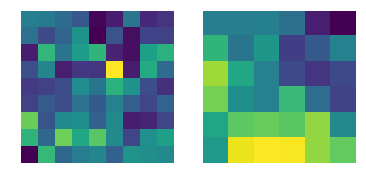

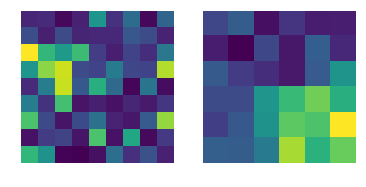

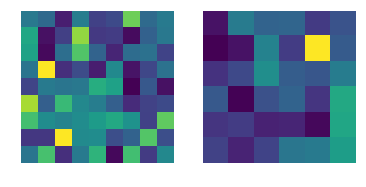

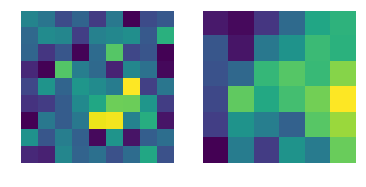

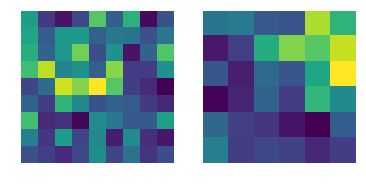

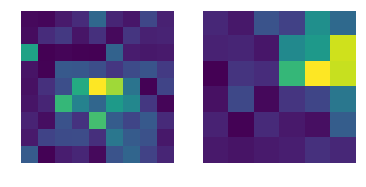

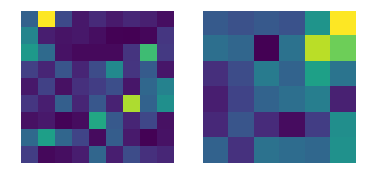

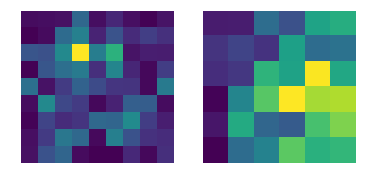

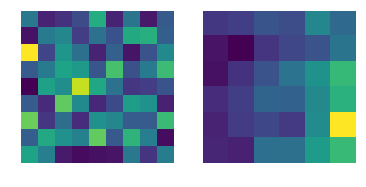

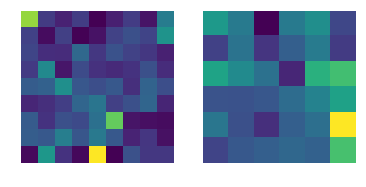

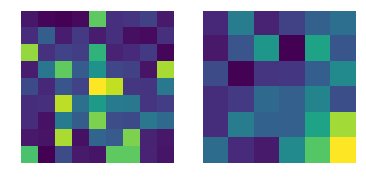

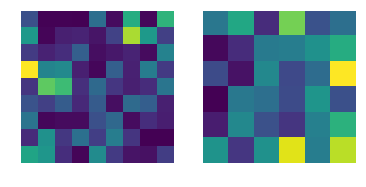

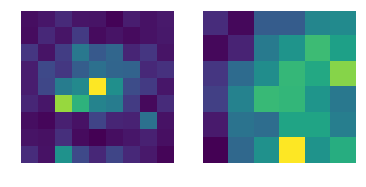

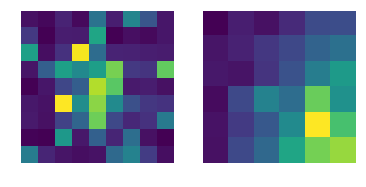

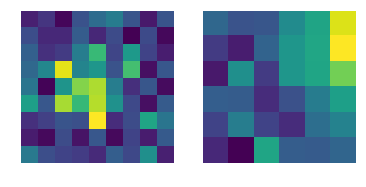

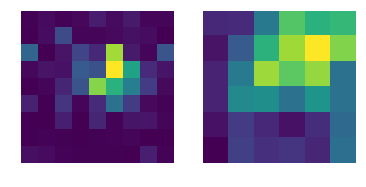

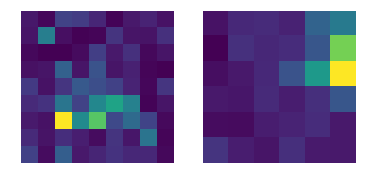

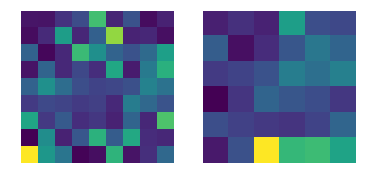

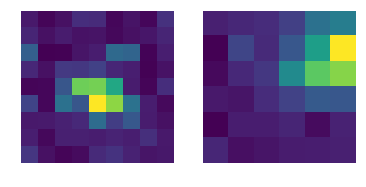

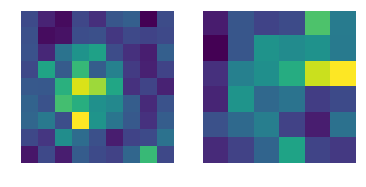

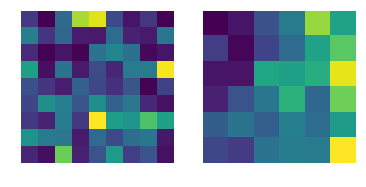

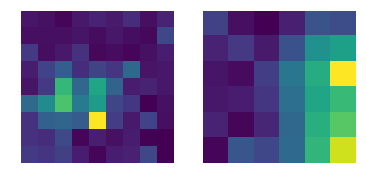

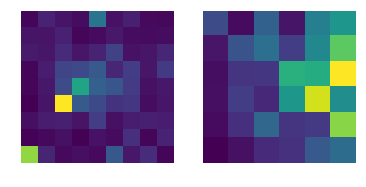

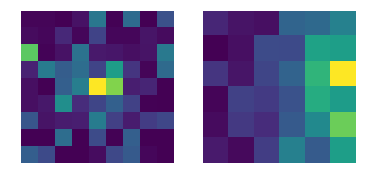

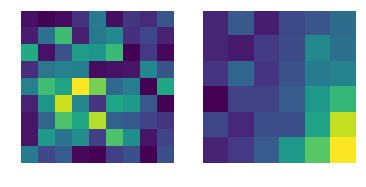

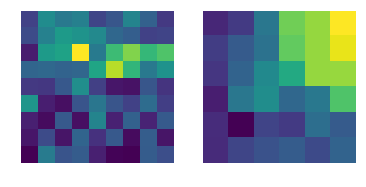

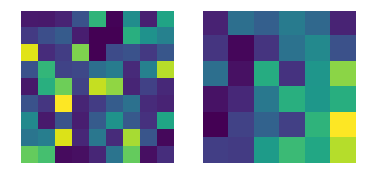

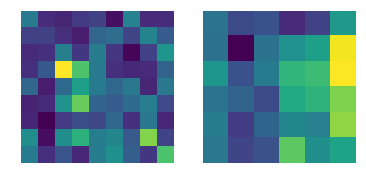

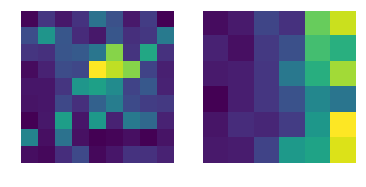

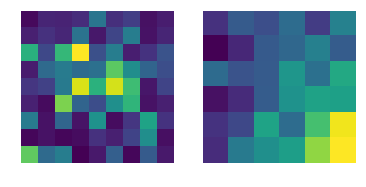

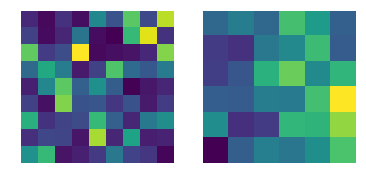

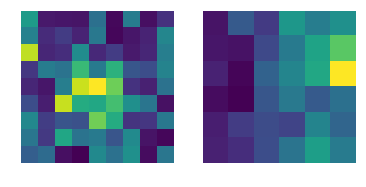

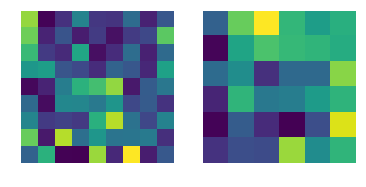

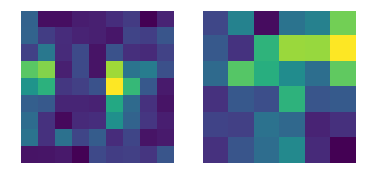

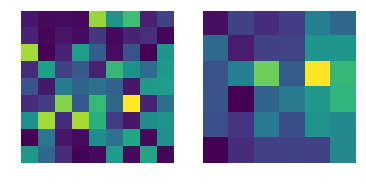

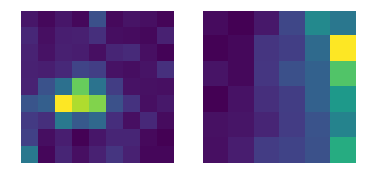

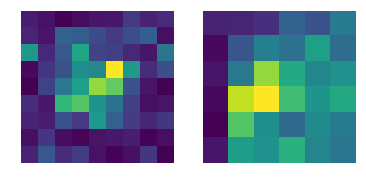

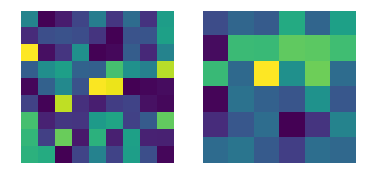

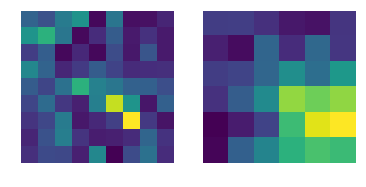

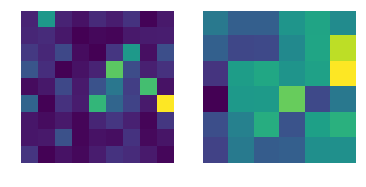

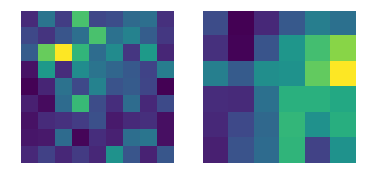

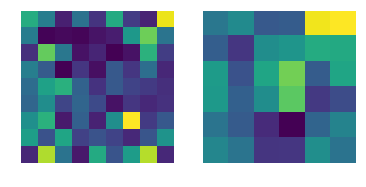

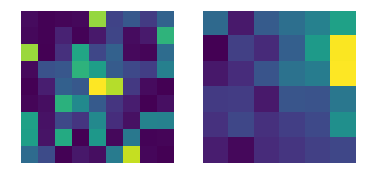

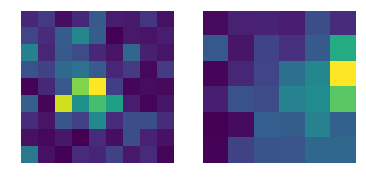

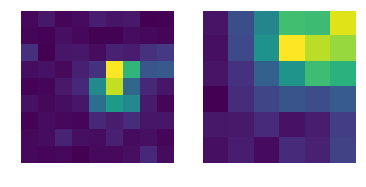

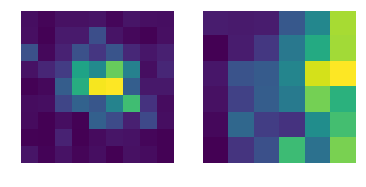

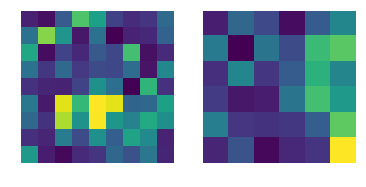

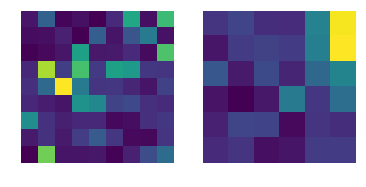

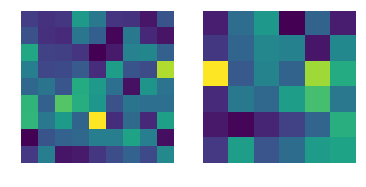

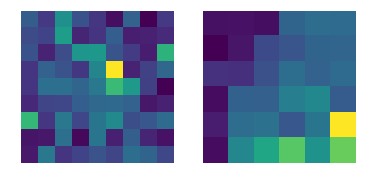

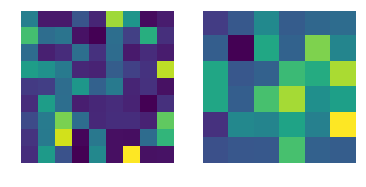

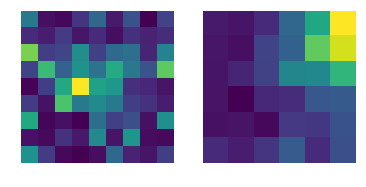

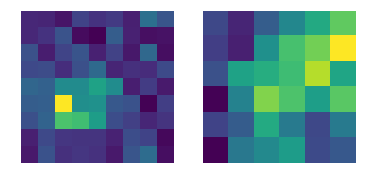

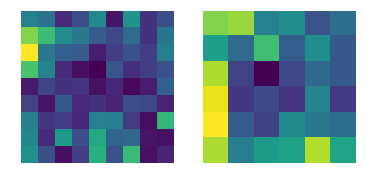

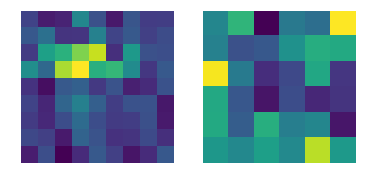

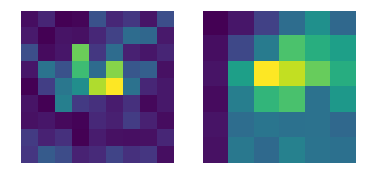

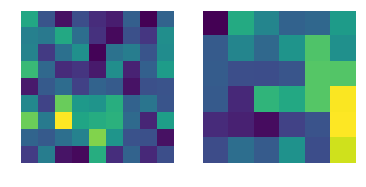

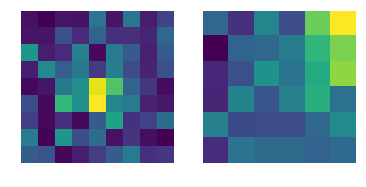

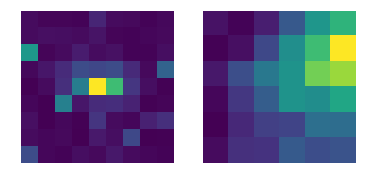

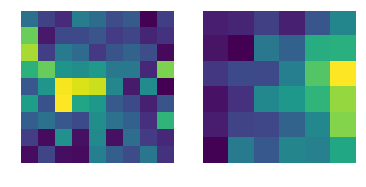

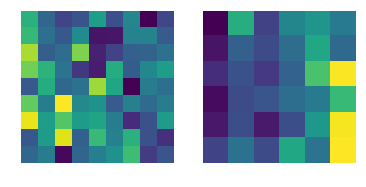

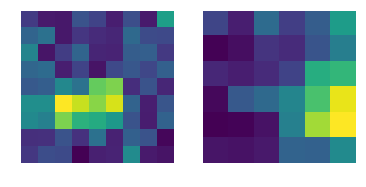

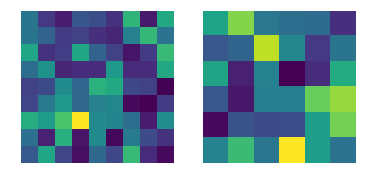

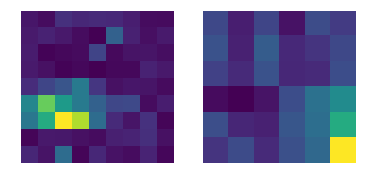

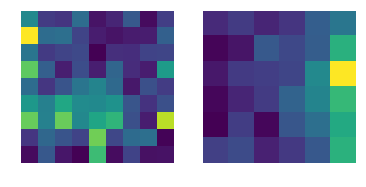

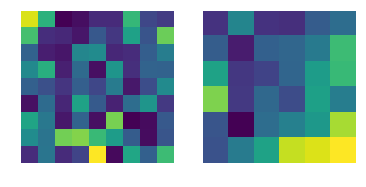

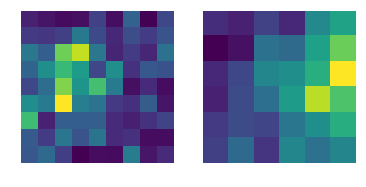

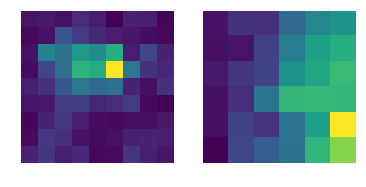

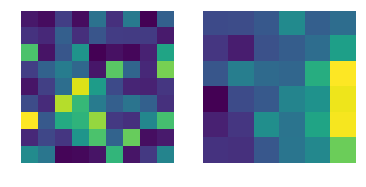

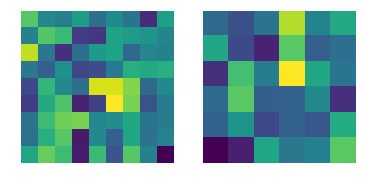

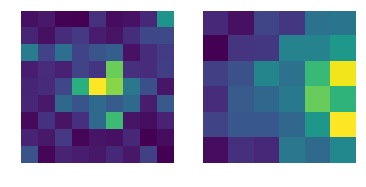

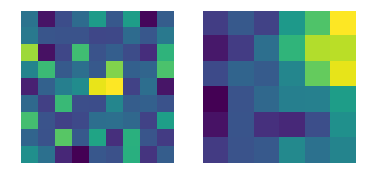

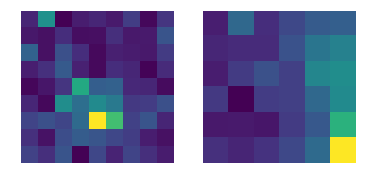

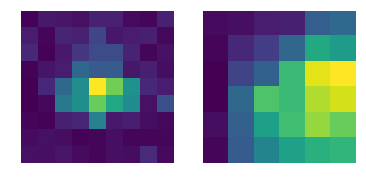

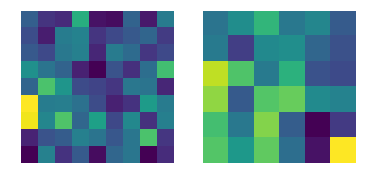

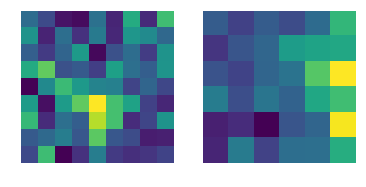

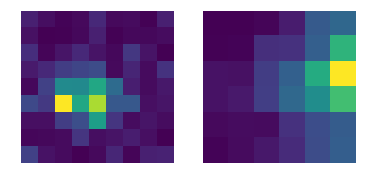

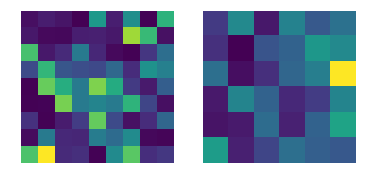

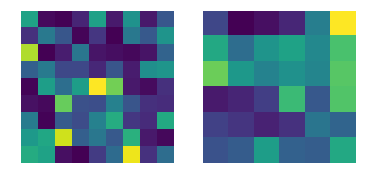

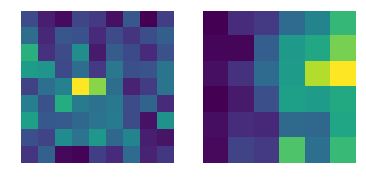

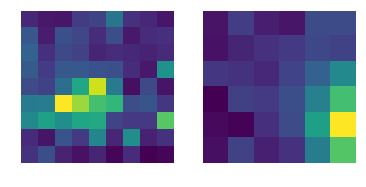

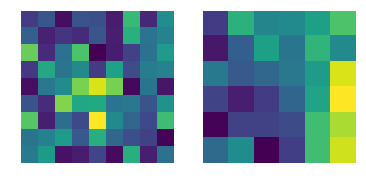

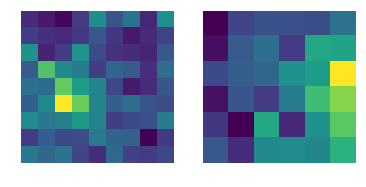

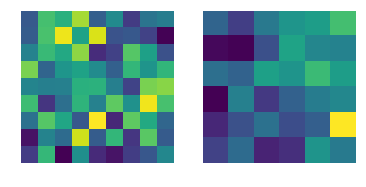

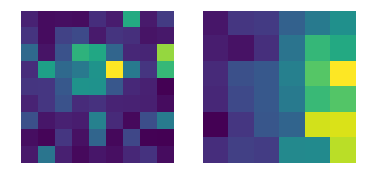

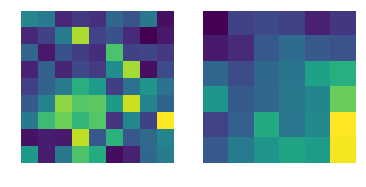

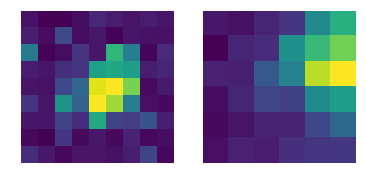

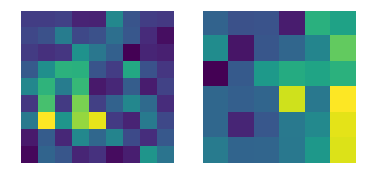

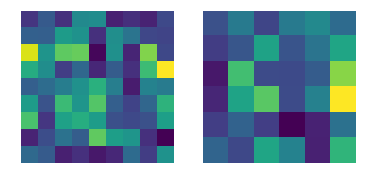

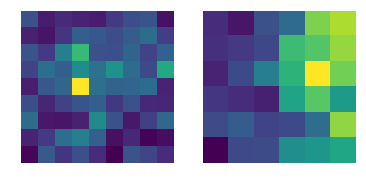

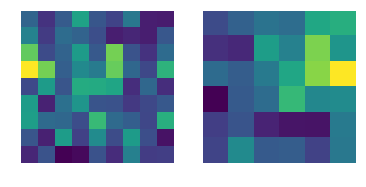

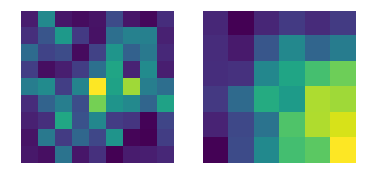

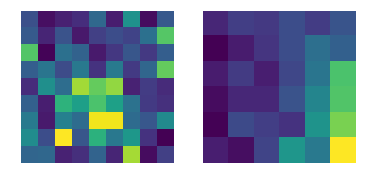

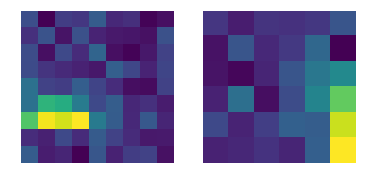

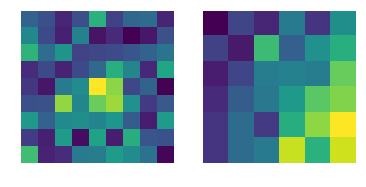

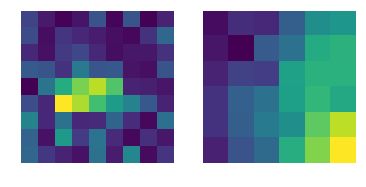

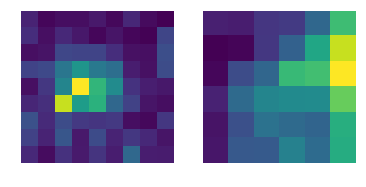

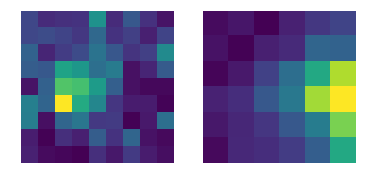

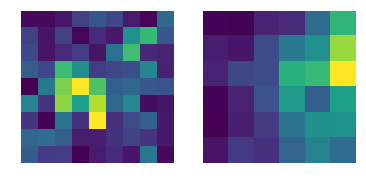

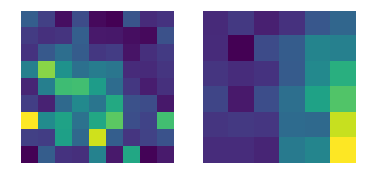

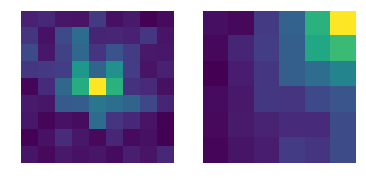

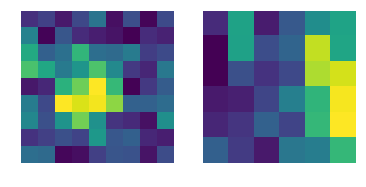

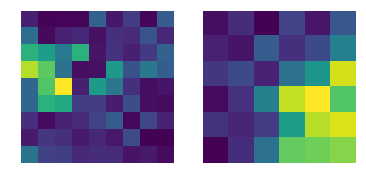

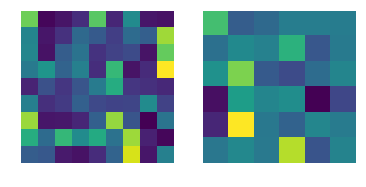

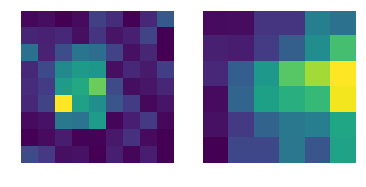

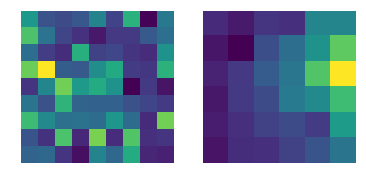

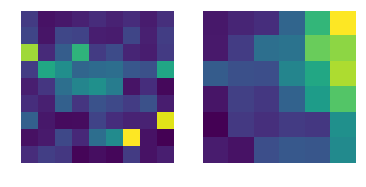

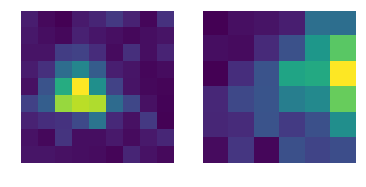

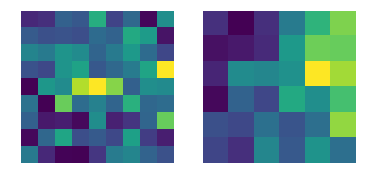

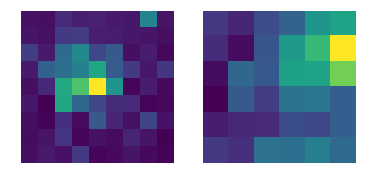

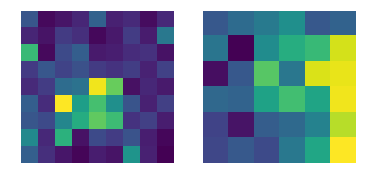

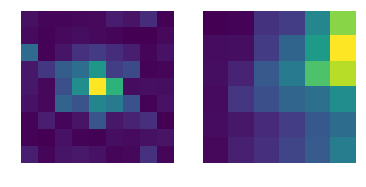

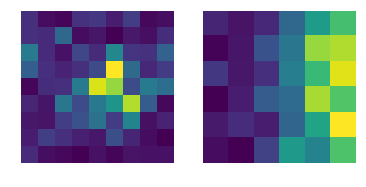

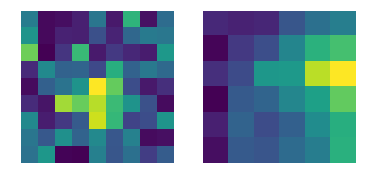

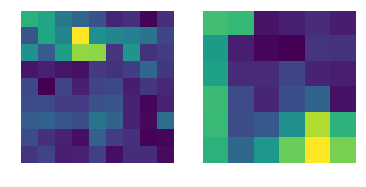

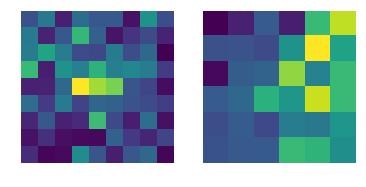

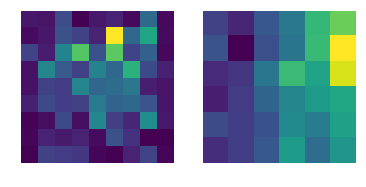

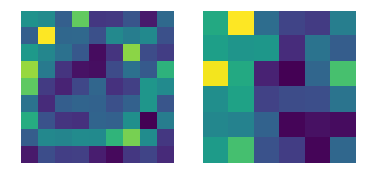

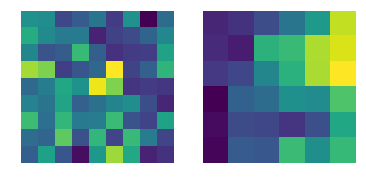

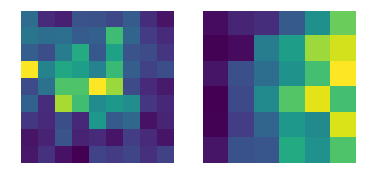

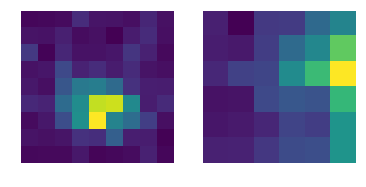

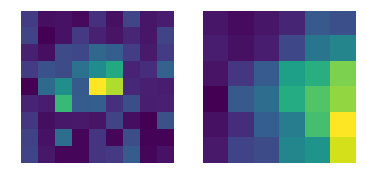

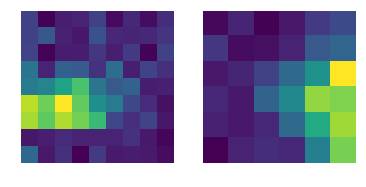

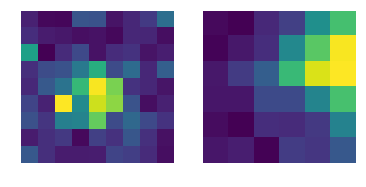

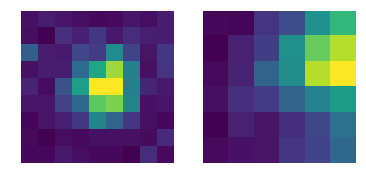

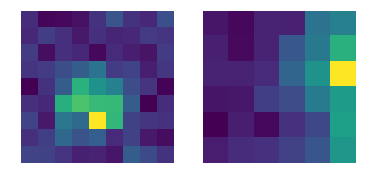

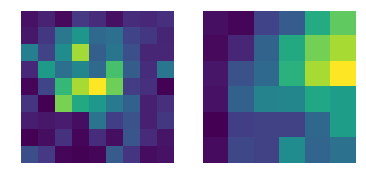

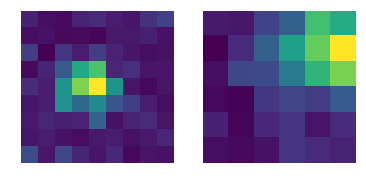

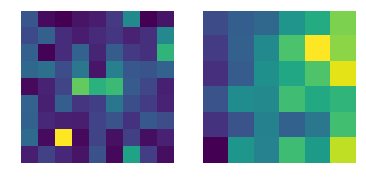

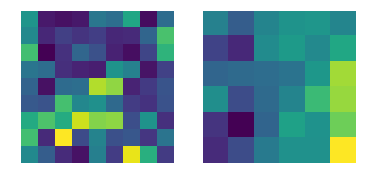

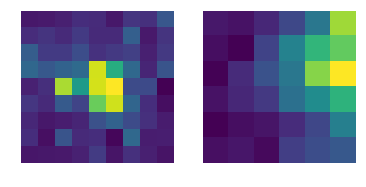

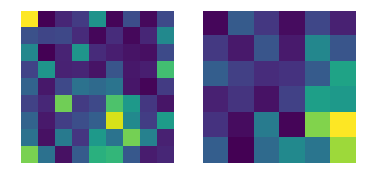

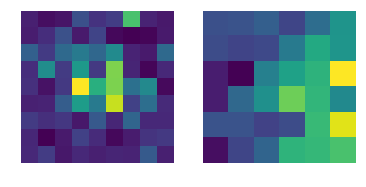

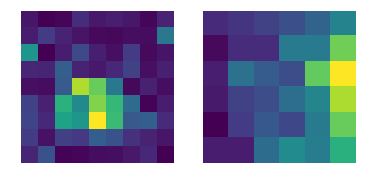

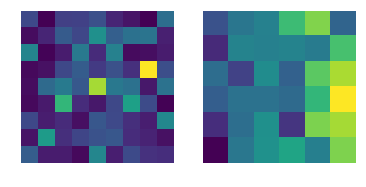

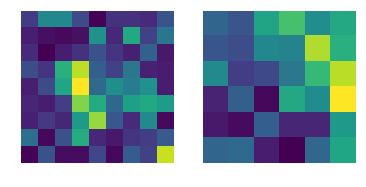

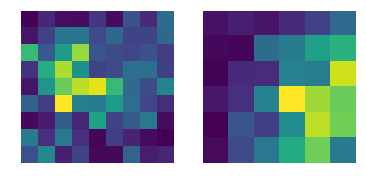

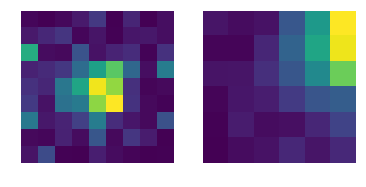

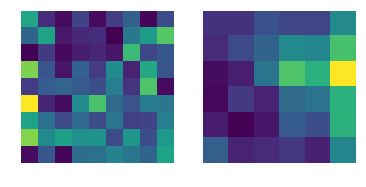

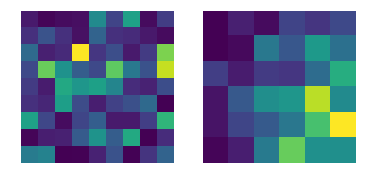

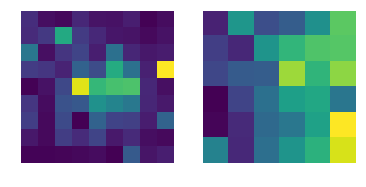

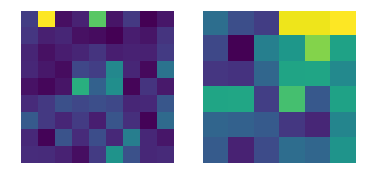

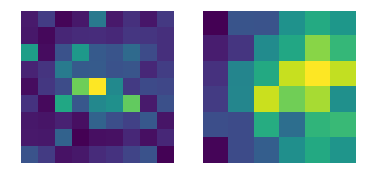

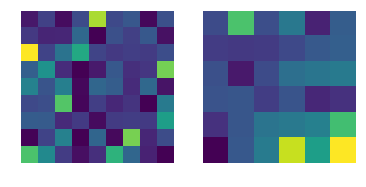

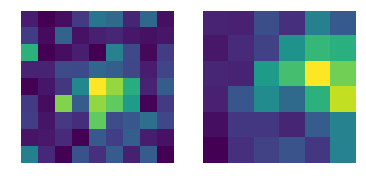

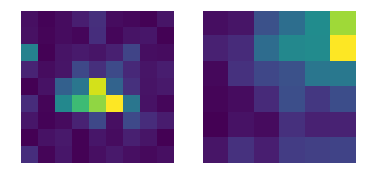

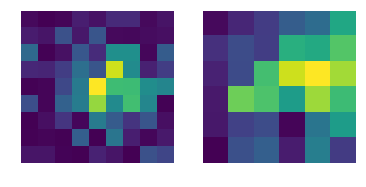

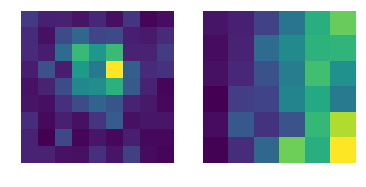

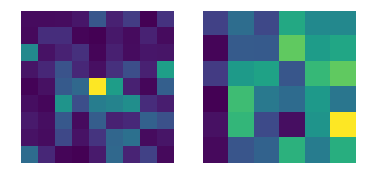

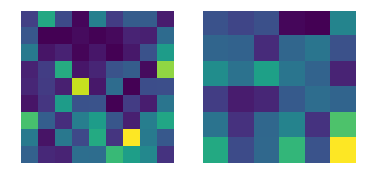

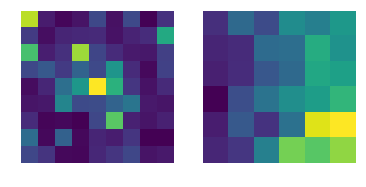

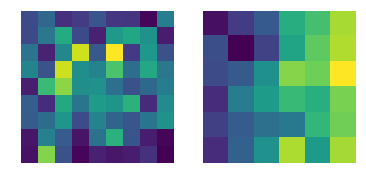

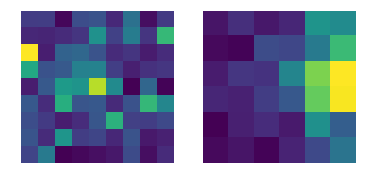

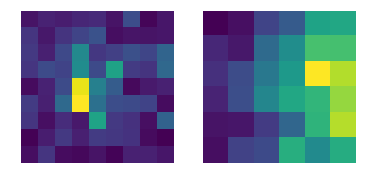

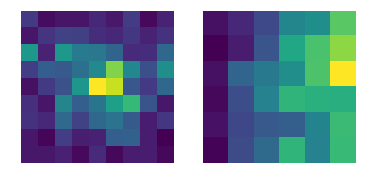

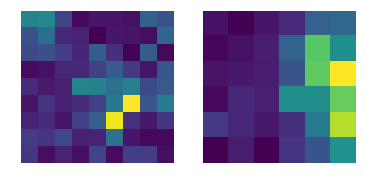

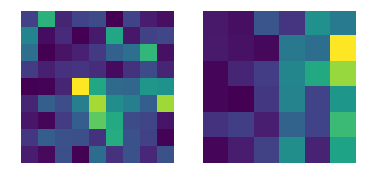

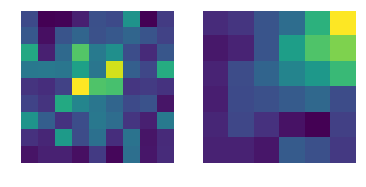

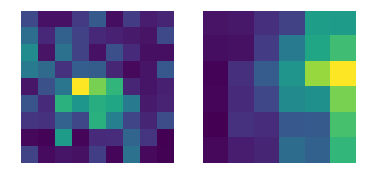

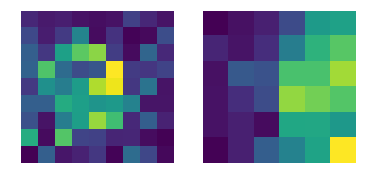

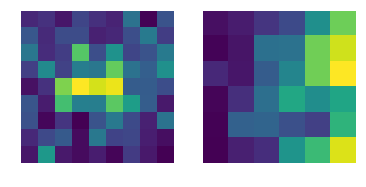

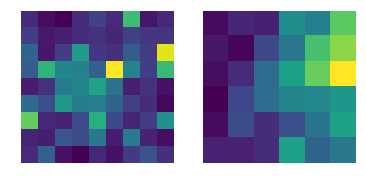

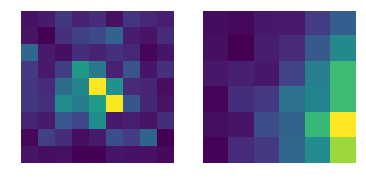

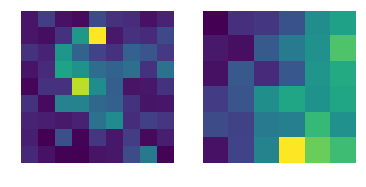

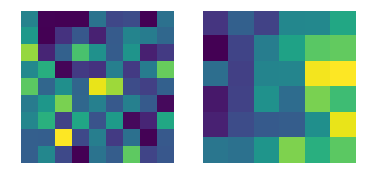

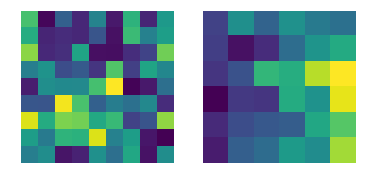

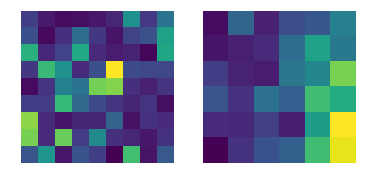

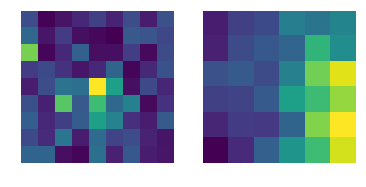

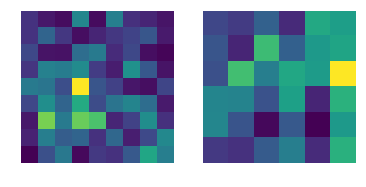

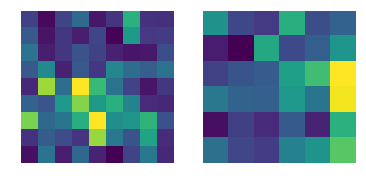

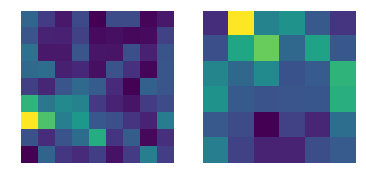

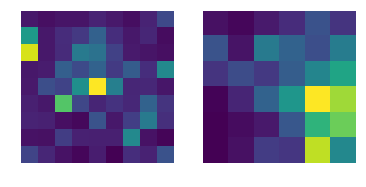

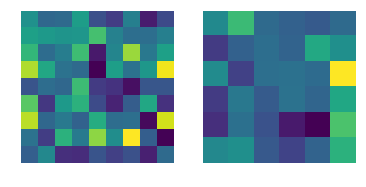

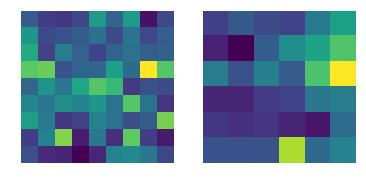

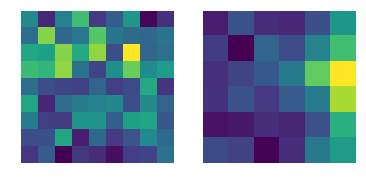

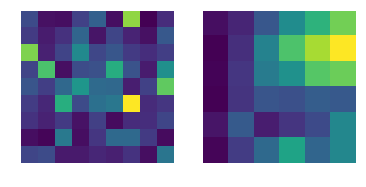

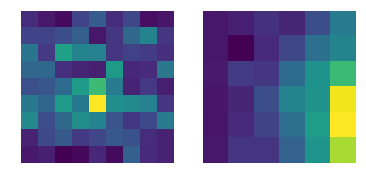

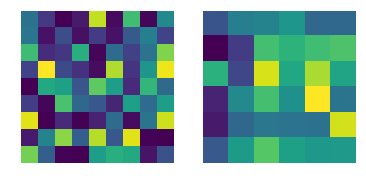

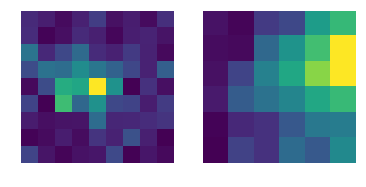

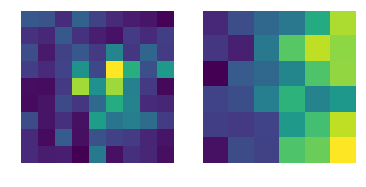

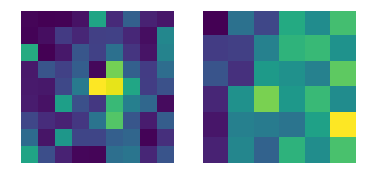

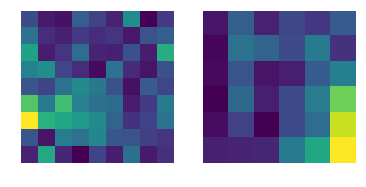

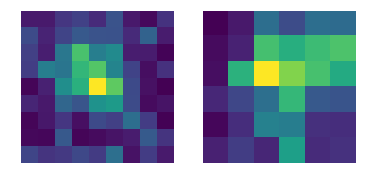

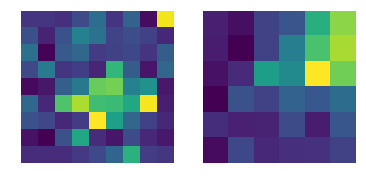

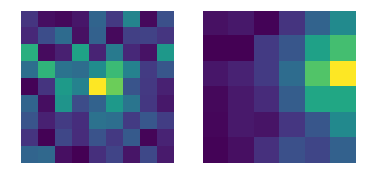

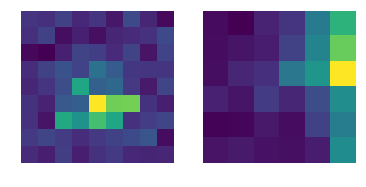

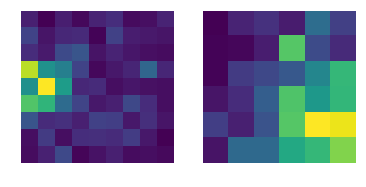

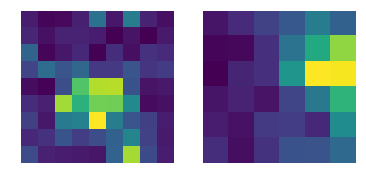

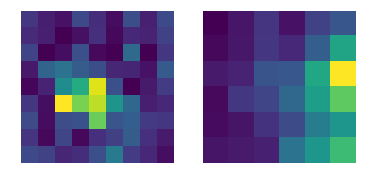

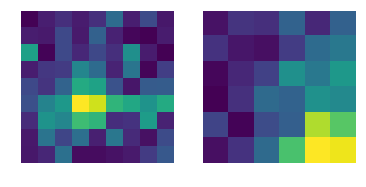

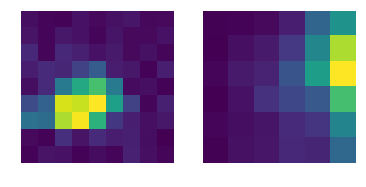

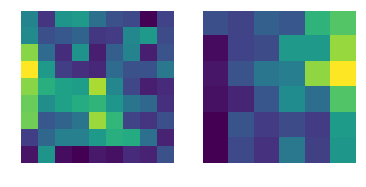

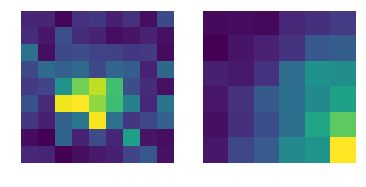

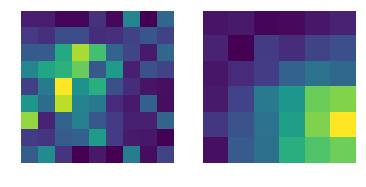

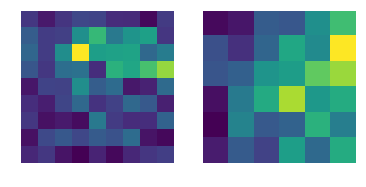

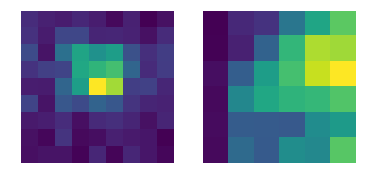

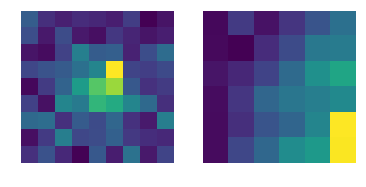

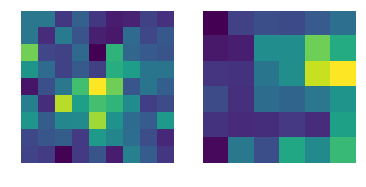

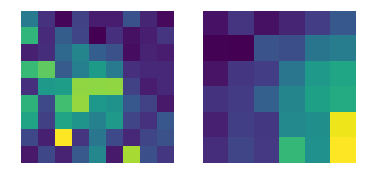

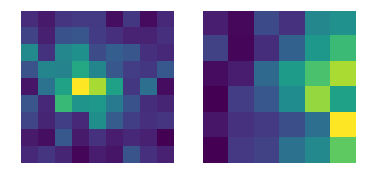

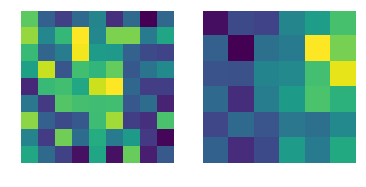

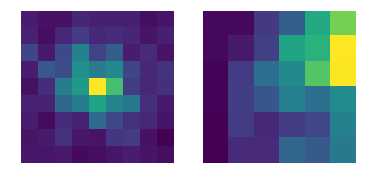

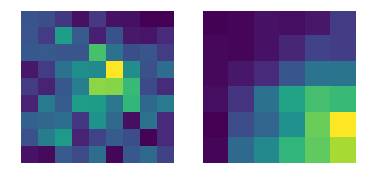

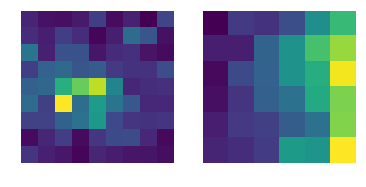

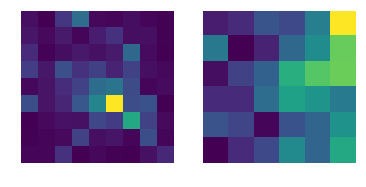

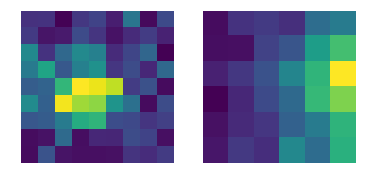

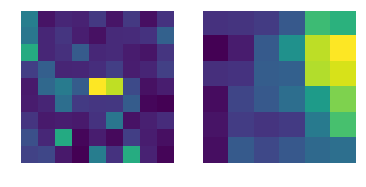

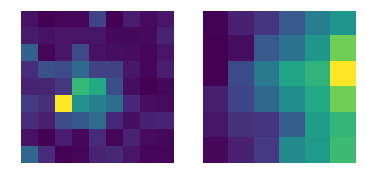

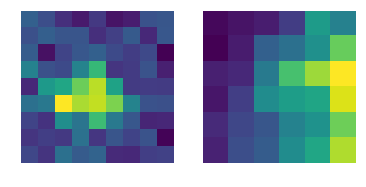

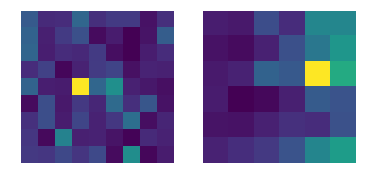

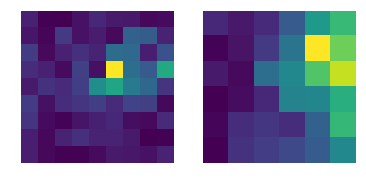

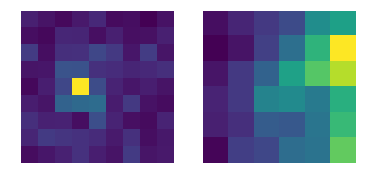

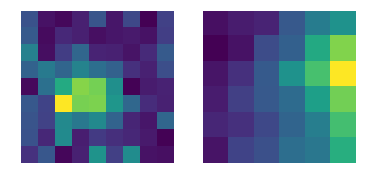

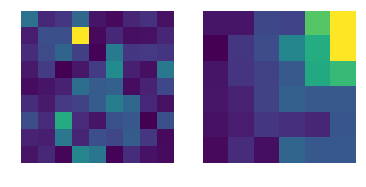

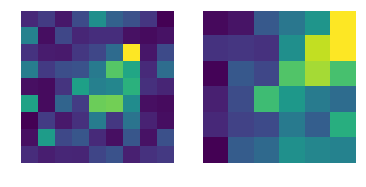

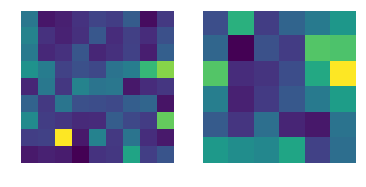

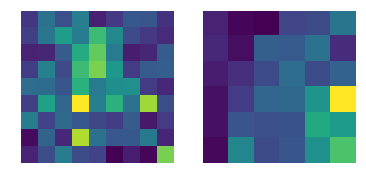

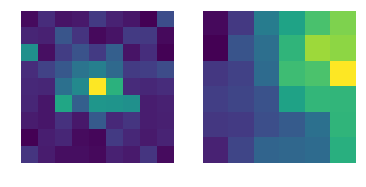

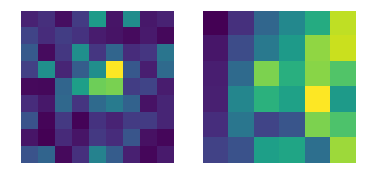

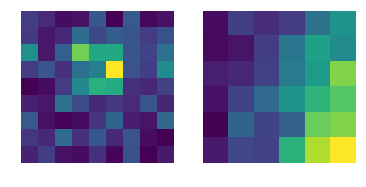

In [32]:
# os.mkdir('l5_size_contrast')
for i in range(soriavg[keylist[k]][1].shape[0]):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(ret[keylist[k]][i])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(soriavg[keylist[k]][1][i])
    plt.axis('off')
    plt.savefig('l5_size_contrast/%03d.png' % i)

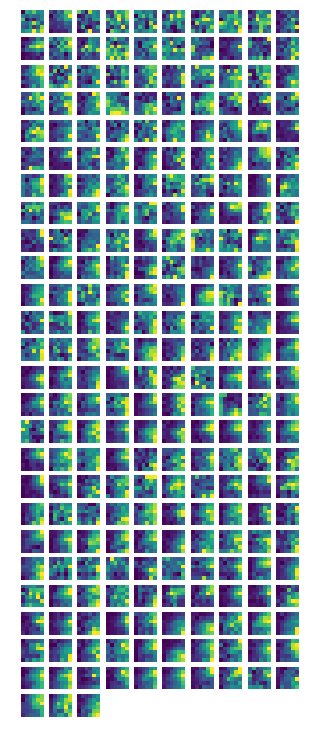

In [24]:
ut.imshow_in_rows(soriavg[keylist[k]][1])

<IPython.core.display.Javascript object>


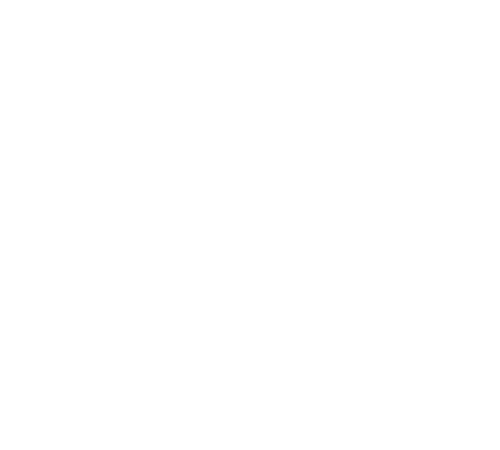

<IPython.core.display.Javascript object>


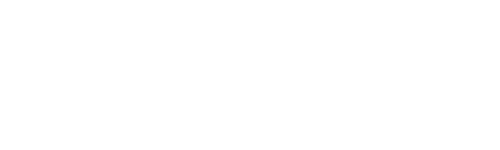

In [43]:
k = 0
ut.imshow_in_rows(soriavg[keylist[k]][1][ontarget_ret_lax[keylist[k]]])
# plt.savefig('l4_size_contrast_181127_non_running.pdf')
k = 1
ut.imshow_in_rows(soriavg[keylist[k]][1][ontarget_ret_lax[keylist[k]]])
# plt.savefig('l4_size_contrast_190202_non_running.pdf')

<IPython.core.display.Javascript object>


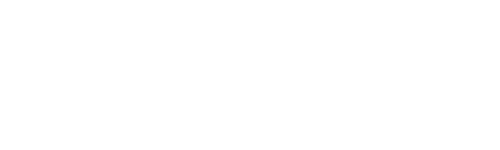

In [63]:
# k = 0
# ut.imshow_in_rows(soriavg[keylist[k]][0][ontarget_ret_lax[keylist[k]]])
# # plt.savefig('l4_size_contrast_181127_running.pdf')
k = 1
ut.imshow_in_rows(soriavg[keylist[k]][0][ontarget_ret_lax[keylist[k]]])
plt.savefig('l4_size_contrast_190202_running.pdf')
plt.savefig('l4_size_contrast_190202_running.png')

In [57]:
vmax

array([ 0.03593671,  0.03067969,  0.04967066,  0.04297876,  0.08419854,
        0.1296212 ,  0.02469531,  0.06685482,  0.03437276,  0.06255806,
        0.16373546,  0.28556352,  0.04292998,  0.05876938,  0.03096243,
        0.06420234,  0.0852948 ,  0.27841698,  0.0273767 ,  0.01954684,
        0.02176252,  0.03850278,  0.05491788,  0.11887337,  0.03544697,
        0.0313465 ,  0.01946027,  0.00965185,  0.01958833,  0.02156992,
        0.06021008,  0.01823062,  0.0406534 ,  0.02243468,  0.0370308 ,
        0.0421591 ])

<IPython.core.display.Javascript object>


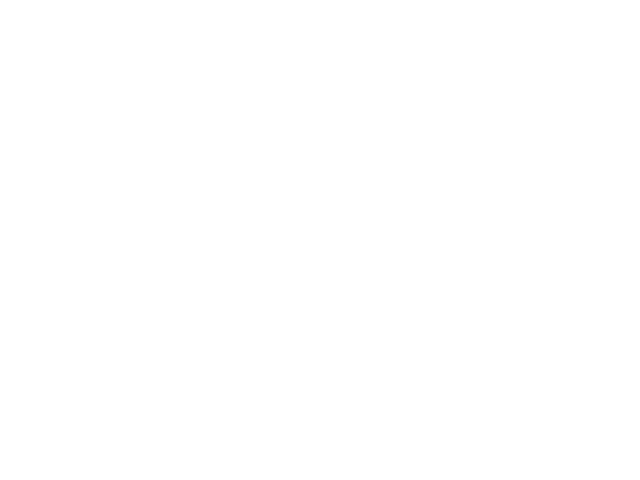

In [60]:
plt.figure()
lkat = (6,9,4)
nmax = len(lkat)
for i,el in enumerate(lkat):
    data0 = soriavg[keylist[k]][0][ontarget_ret_lax[keylist[k]]][el]
    data1 = soriavg[keylist[k]][1][ontarget_ret_lax[keylist[k]]][el]
    vmax = np.maximum(data0.flatten(),data1.flatten()).max()
    plt.subplot(2,nmax,i+1)
    plt.imshow(data0,vmax=vmax)
    plt.subplot(2,nmax,nmax+i+1)
    plt.imshow(data1,vmax=vmax)
plt.savefig('l4_example_rois_size_contrast_running_nonrunning.pdf')
plt.savefig('l4_example_rois_size_contrast_running_nonrunning.png')

<IPython.core.display.Javascript object>


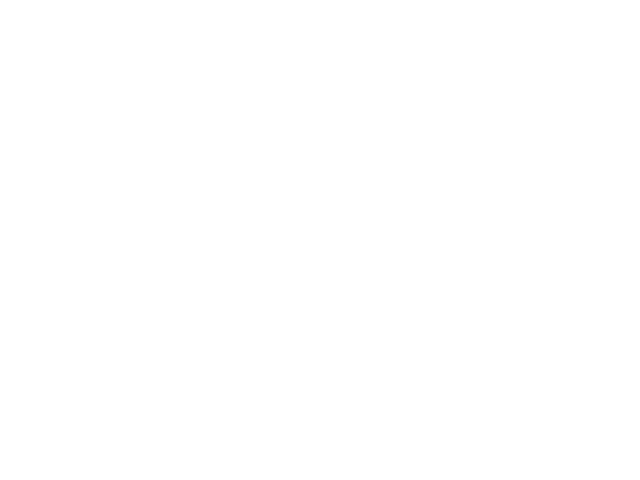

In [62]:
plt.figure()
lkat = (6,9,4)
nmax = len(lkat)
for i,el in enumerate(lkat):
    data0 = soriavg[keylist[k]][0][ontarget_ret_lax[keylist[k]]][el]
#     data1 = soriavg[keylist[k]][1][ontarget_ret_lax[keylist[k]]][el]
#     vmax = np.maximum(data0.flatten(),data1.flatten()).max()
    plt.subplot(1,nmax,i+1)
    plt.imshow(data0)#,vmax=vmax)
#     plt.subplot(2,nmax,nmax+i+1)
#     plt.imshow(data1,vmax=vmax)
plt.savefig('l4_example_rois_size_contrast_running.pdf')
plt.savefig('l4_example_rois_size_contrast_running.png')

<IPython.core.display.Javascript object>


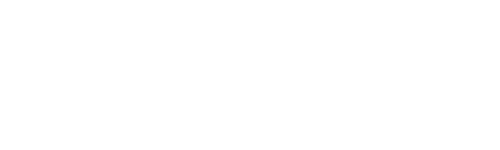

<IPython.core.display.Javascript object>


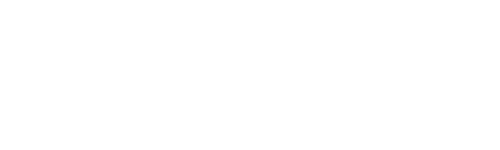

In [39]:

ut.imshow_in_rows(soriavg[keylist[1]][0][ontarget_ret_lax[keylist[1]]])
# ut.imshow_in_rows(soriavg[keylist[1]][1][ontarget_ret_lax[keylist[1]]])

<IPython.core.display.Javascript object>


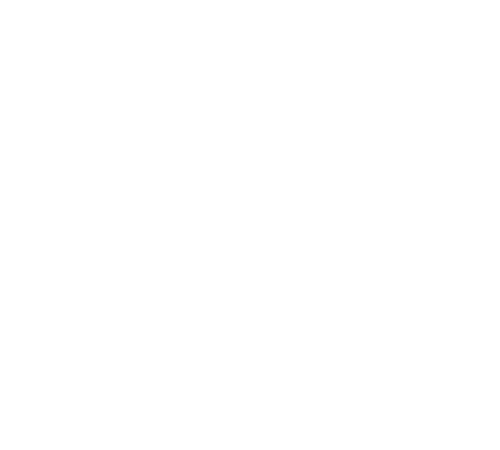

<IPython.core.display.Javascript object>


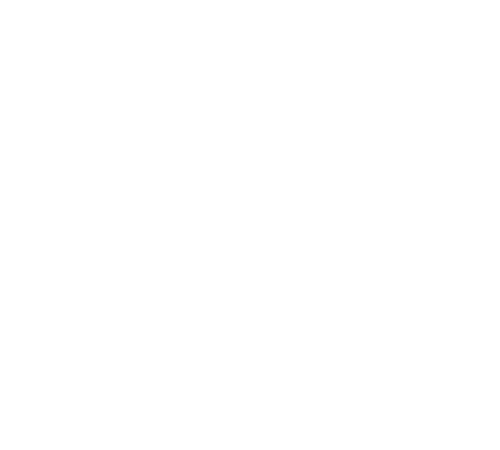

In [40]:
# ut.imshow_in_rows(soriavg[keylist[0]][0][ontarget[keylist[0]]])
# ut.imshow_in_rows(soriavg[keylist[0]][1][ontarget[keylist[0]]])
k = 0
ut.imshow_in_rows(soriavg[keylist[k]][0][ontarget_ret_lax[keylist[k]]])
ut.imshow_in_rows(soriavg[keylist[k]][1][ontarget_ret_lax[keylist[k]]])

<IPython.core.display.Javascript object>


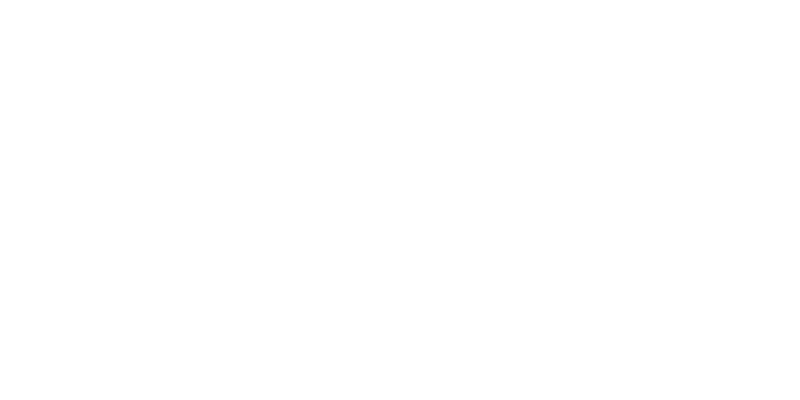

In [37]:
plt.figure(figsize=(8,4))
for k in range(2):
    plt.subplot(1,2,k+1)
    if k==0:
        c = 100*np.array((0,0.03,0.06,0.12,0.25,0.5,1))
    else:
        c = 100*np.array((0,0.06,0.12,0.25,0.5,1))
    plt.plot(c,soriavg[keylist[k]][1][ontarget[keylist[k]]].mean(0).T)

<IPython.core.display.Javascript object>


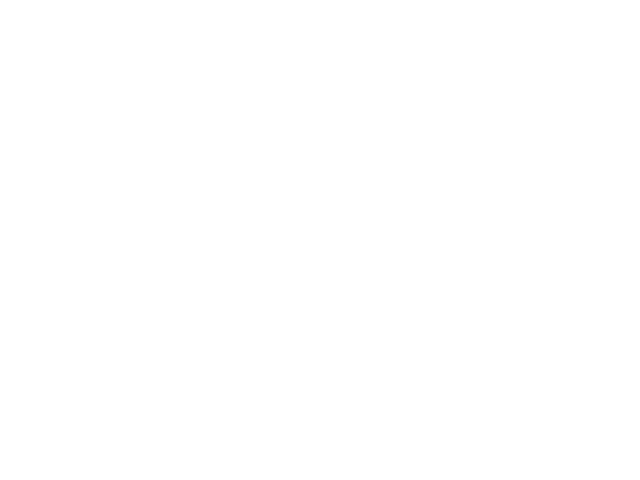

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [125]:
plt.figure()
plt.subplot(2,2,1)
for k in range(2):
    for r in range(2):
        plt.subplot(2,2,2*k+r+1)
        plt.imshow(soriavg[keylist[k]][r][ontarget[keylist[k]]].mean(0))
plt.savefig('l4_running_nonrunning_size_contrast.pdf')

In [91]:
soriavg[keylist[0]][0]

array([[[  5.27819518e-02,  -1.95250013e-25,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,  -1.73886377e-26,  -1.84776626e-26],
        [  0.00000000e+00,   1.34750532e-04,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   1.66178539e-03,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           2.35750432e-02,   0.00000000e+00,   6.61821713e-25]],

       [[  0.00000000e+00,   5.24865412e-03,   1.69627912e-02, ...,
           1.43277149e-02,   7.92694805e-02,   0.00000000e+00],
        [  7.03272575e-03,   2.68773961e-01,   1.55721332e-02, ...,
           5.74464456e-02,   6.73627846e-02,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
      

In [93]:
# on target based on size/contrast responses
ucontrast = {}
to_take_c = {}
intersect = np.array(())
for key in keylist:
    ucontrast[key] = np.unique(proc[key][1]['contrast'])
for key in keylist:
    if not intersect.size:
        intersect = ucontrast[key]
    else:
        intersect = np.intersect1d(intersect,ucontrast[key])
for key in keylist:
    to_take_c[key] = np.where(np.in1d(ucontrast[key],intersect))[0]
    
c = 100*intersect
    
usize = {}
to_take_s = {}
intersect = np.array(())
for key in keylist:
    usize[key] = np.unique(proc[key][1]['size'])
for key in keylist:
    if not intersect.size:
        intersect = usize[key]
    else:
        intersect = np.intersect1d(intersect,usize[key])
for key in keylist:
    to_take_s[key] = np.where(np.in1d(usize[key],intersect))[0]

s = intersect
s0 = np.concatenate(((0,),s))

snorm = sca.get_norm_curves_row_col(soriavg,ontarget_ret_lax,sizes=to_take_s,contrasts=to_take_c,append_gray=True)

KeyError: '190202/M10075/'

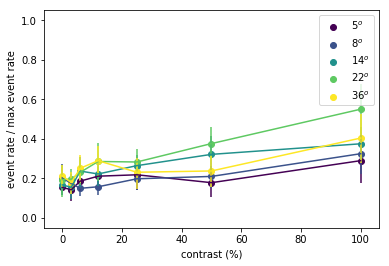

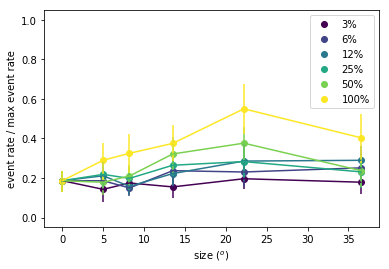

In [97]:
plt.figure()
ut.plot_bootstrapped_errorbars_hillel(c,snorm[1][:,1:])
plt.xlabel('contrast (%)')
plt.ylabel('event rate / max event rate')
plt.legend([str(int(np.round(x)))+'$^o$' for x in s])
plt.ylim((-0.05,1.05))
# plt.savefig('190125_figs/l4_contrast_by_size_190125_non_running_only.pdf')

plt.figure()
ut.plot_bootstrapped_errorbars_hillel(s0,snorm[1][:,:,1:].transpose((0,2,1)))
plt.xlabel('size ($^o$)')
plt.ylabel('event rate / max event rate')
plt.legend([str(int(np.round(x)))+'%' for x in c[1:]])
plt.ylim((-0.05,1.05))
# plt.savefig('190125_figs/l4_size_by_contrast_190125_non_running_only.pdf')

In [13]:
ret_vars[keylist[2]]['paramdict_normal']['gridsize'][()]

IndexError: list index out of range

In [13]:
# for k in (1,2,3,4,6):


In [28]:
keylist[6]

IndexError: list index out of range

In [31]:
def rf_info(k):
    offset = ret_vars[keylist[k]]['paramdict_normal']['ctr'][()]*np.array((1,-1))-ret_vars[keylist[k]]['position']
    shp = ret_vars[keylist[k]]['ret'].shape[1:3]
    gridsize = ret_vars[keylist[k]]['paramdict_normal']['gridsize'][()]
    Nx = shp[1]
    Ny = shp[0]
    xrg = offset[0] + np.arange(-(Nx-1)*gridsize/2,(Nx+1)*gridsize/2,gridsize)
    yrg = offset[1] + np.arange((Ny-1)*gridsize/2,-(Ny+1)*gridsize/2,-gridsize)
    print(offset)
    print(xrg)
    print(yrg)
    if len(ret_vars[keylist[k]]['ret'].shape)>3:
        rf = ret_vars[keylist[k]]['ret'][:,:,:,0]
    else:
        rf = ret_vars[keylist[k]]['ret']
    return rf,xrg,yrg

tuning = np.zeros((0,5,6))
started = False
for k in (0,):
#     print(soriavg[keylist[k]]) # [ontarget_ret_lax[keylist[k]]].shape)
    n = soriavg[keylist[k]].shape[0]
    rf,xrg,yrg = rf_info(k)
    retinotopy_ = np.empty((n,),dtype='object')
    xlocations_ = np.empty((n,),dtype='object')
    ylocations_ = np.empty((n,),dtype='object')
    for i in range(n):
        retinotopy_[i] = rf[i]
        xlocations_[i] = xrg
        ylocations_[i] = yrg
    expt_id_ = np.array([keylist[k]]*n,dtype='object')
    if not started:
        tuning = soriavg[keylist[k]] # [ontarget_ret_lax[keylist[k]]]
        retinotopy = retinotopy_
        xlocations = xlocations_
        ylocations = ylocations_
        expt_id = expt_id_
        started = True
    else:
        tuning = np.concatenate((tuning,soriavg[keylist[k]]),axis=0) #[ontarget_ret_lax[keylist[k]]]
        retinotopy = np.concatenate((retinotopy,retinotopy_),axis=0) #ret_vars[keylist[k]]['ret'][:,:,:,0]
        xlocations = np.concatenate((xlocations,xlocations_),axis=0)
        ylocations = np.concatenate((ylocations,ylocations_),axis=0)
        expt_id = np.concatenate((expt_id,expt_id_),axis=0)
axes = ['neuron','size','contrast']
sizes = np.logspace(np.log10(5),np.log10(36.5),5)
contrasts = np.array((0,0.06,0.12,0.25,0.5,1))*100
# sio.savemat('vip_size_contrast.mat',{'axes':axes,'sizes':sizes,'contrasts':contrasts,'tuning':tuning,'rf':retinotopy,'rf_xlocations':xlocations,'rf_ylocations':ylocations,'expt_id':expt_id})

[ 0.  0.]
[-20. -15. -10.  -5.   0.   5.  10.  15.  20.]
[ 20.  15.  10.   5.   0.  -5. -10. -15. -20.]


<IPython.core.display.Javascript object>


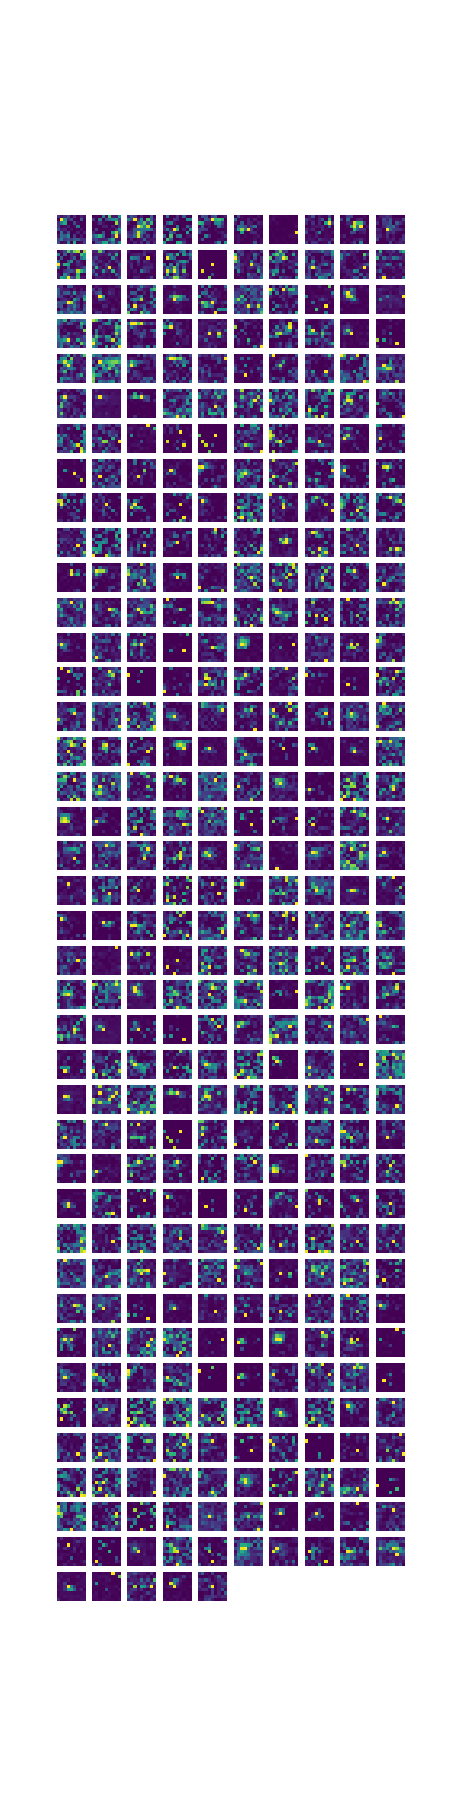

In [33]:
thisfold = keylist[0]
# plt.imshow(ret_vars[thisfold]['ret'][ontarget[thisfold]][:,:,:].mean(0))
ut.imshow_in_rows(ret_vars[thisfold]['ret'][np.logical_not(ontarget_ret_lax[thisfold])][:,:,:])

<IPython.core.display.Javascript object>


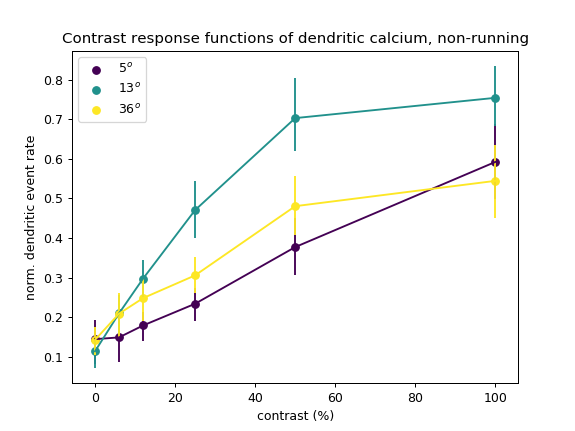

In [54]:
k = 0
plt.figure()
c = np.array((0,0.06,0.12,0.25,0.5,1))*100
reload(ut)
ut.plot_bootstrapped_errorbars_hillel(c,(soriavg[keylist[k]]/soriavg[keylist[k]].max(-1).max(-1)[:,np.newaxis,np.newaxis])[ontarget_ret_lax[keylist[0]]])
plt.xlabel('contrast (%)')
plt.ylabel('norm. dendritic event rate')
plt.title('Contrast response functions of dendritic calcium, non-running')
plt.legend([x+'$^o$' for x in ['5','13','36']])
plt.savefig('dendritic_crfs.pdf')

In [35]:
np.logical_not(np.isnan(soriavg[thisfold])).sum()

7812

<IPython.core.display.Javascript object>


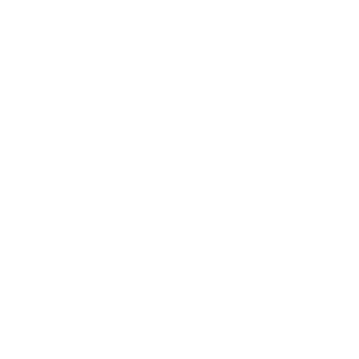

ValueError: a must be non-empty

In [36]:
def snorm_two_curves(soriavg,theserows,lkat):
    keylist = list(lkat.keys())
    snorm = np.array(())
    for key in keylist:
#         biny = np.in1d(np.arange(soriavg[key].shape[1]),theserows)
        binx = np.in1d(np.arange(soriavg[key].shape[2]),theserows)
        to_add = soriavg[key][lkat[key]][:,:,binx]
        to_add = to_add/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        if snorm.size:
            snorm = np.vstack((snorm,to_add))
        else:
            snorm = to_add
    return snorm

def snormup_two_curves(soriavg,theserows,lkat):
    keylist = list(lkat.keys())
    snorm = np.array(())
    for key in keylist:
#         biny = np.in1d(np.arange(soriavg[key].shape[1]),theserows)
        binx = np.in1d(np.arange(soriavg[key].shape[2]),theserows)
        to_add = soriavg[key][lkat[key]][:,:,binx]
        to_add = to_add/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        temp = soriavg[key][lkat[key]]/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        gray = np.tile(temp[:,:,0].mean(1)[:,np.newaxis],(1,theserows.size))[:,np.newaxis,:]
        to_add = np.concatenate((gray,to_add),axis=1)
        if snorm.size:
            snorm = np.vstack((snorm,to_add))
        else:
            snorm = to_add
    return snorm

plt.figure(figsize=(4,4))
s = np.array([5,8.2,13.5,22.2,36.5])
s0 = np.concatenate(((0,),s))
theserows = np.array((1,2,3,4,5))
lkatd = {}
for k in np.arange(1,len(keylist)):
    
    lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]]) #np.logical_and(ontarget[keylist[k]],ontarget_ret_lax[keylist[k]])
    lkatd[keylist[k]] = lkat
    snorm = (soriavg[keylist[k]]/soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis])
    lbmn,ubmn = ut.bootstrap(snorm[lkat],np.nanmean,axis=0,pct=(16,84))
    gray = snorm[lkat][:,:,0].mean(1)[:,np.newaxis]
#     
    reload(ut)

    # goldenrod = np.array((218,165,32))/255
    salmon = np.array((250,128,114))/255

#     fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='solid',c=goldenrod)
#     fn_inner = lambda x: x[:,theserows[1]].T
#     do_three(s,np.nanmean(snorm[lkat],axis=0),lbmn,ubmn,fn_outer,fn_inner)

#     fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='dashed',c='y')
#     fn_inner = lambda x: x[:,theserows[0]].T
#     do_three(s,np.nanmean(snorm[lkat],axis=0),lbmn,ubmn,fn_outer,fn_inner)

    # # ut.plot_errorbar_hillel(s,snorm[lkat].mean(0)[:,theserows[0]].T,lbmn[:,theserows[0]].T,ubmn[:,theserows[0]].T,linestyle='dashed')
    plt.plot(30,0.5,linestyle='solid',c='m')
    plt.plot(30,0.5,linestyle='dashed',c=salmon)
    plt.plot(s0,np.hstack((snorm[lkat][:,:,0].mean(1)[:,np.newaxis],snorm[lkat][:,:,theserows[1]])).T,alpha=0.04,c='m')
    plt.plot(s0,np.hstack((snorm[lkat][:,:,0].mean(1)[:,np.newaxis],snorm[lkat][:,:,theserows[0]])).T,alpha=0.04,c=salmon)
    whitespace = 0.05
    plt.ylim(0-whitespace,1+whitespace)
    plt.xlabel('size (deg.)')
    plt.ylabel('norm. event rate')
#     plt.legend(['50% contrast','12% contrast'])
#     gray = snorm[lkat,:,0].mean(1)
#     plt.scatter(np.zeros_like(gray),gray,c='r')
# plt.savefig('sst_12_50_size_tuning_curves.pdf')
# plt.axis('tight')
colors = plt.cm.viridis(np.linspace(0,1,5))
snorm = snormup_two_curves(soriavg,theserows,lkatd)
lbmn,ubmn = ut.bootstrap(snorm,np.nanmean,axis=0,pct=(16,84))
transpose = False
fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='solid',c=colors[i])
fn_inner = lambda x: x[i]
if transpose:
    for i in range(5):
        do_three(s0,np.nanmean(snorm,axis=0).T,lbmn.T,ubmn.T,fn_outer,fn_inner)
else:
    for i in range(5):
        do_three(s,np.nanmean(snorm,axis=0),lbmn,ubmn,fn_outer,fn_inner)
# fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='dashed',c=salmon)
# fn_inner = lambda x: x[0]
# do_three(s0,np.nanmean(snorm,axis=0).T,lbmn.T,ubmn.T,fn_outer,fn_inner)

# plt.savefig('vip_supp_12_50_size_tuning_curves.pdf')

In [37]:
def plot_bootstrapped_errorbars(s,snorm,transpose=False,plot_options=None):
    
    def do_three(x,mn,lb,ub,fn_outer,fn_inner):
        fn_outer(x,fn_inner(mn),fn_inner(lb),fn_inner(ub))
    
    if transpose:
        toplot = snorm.transpose((0,2,1))
    else:
        toplot = snorm
    lbmn,ubmn = ut.bootstrap(toplot,np.nanmean,axis=0,pct=(2.5,97.5))
    nlines = toplot.shape[2]
    
    opt = plot_options
    opt_keys = ['c','linewidth','linestyle']
        
    
    if opt is None:
        opt = {'c':plt.cm.jet(np.linspace(0,1,nlines))}

    for key in opt_keys:
        if not key in opt:
            opt[key] = None
            
    for i in range(nlines):
        leg_opt = ut.get_dict_ind(opt,i)
        plt.plot(s.mean(),toplot.mean(),c=leg_opt['c'],linewidth=leg_opt['linewidth'],linestyle=leg_opt['linestyle'])
    
    fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,plot_options=ut.get_dict_ind(opt,i))
    fn_inner = lambda x: x[:,i]
    for i in range(nlines):
        do_three(s,np.nanmean(toplot,axis=0),lbmn,ubmn,fn_outer,fn_inner)

In [38]:
c = np.array((0,0.06,0.12,0.25,0.5,1))*100

In [21]:
# import pickle as pkl
# with open('vip_all_size.p', 'wb') as handle:
#     pkl.dump(savedict, handle, protocol=pkl.HIGHEST_PROTOCOL)

NameError: name 'savedict' is not defined

In [39]:
soriavg[keylist[k]][:,:,np.concatenate(((0,),cselection))].shape

NameError: name 'cselection' is not defined

In [40]:
keylist

['181213/M10345/']

0


<IPython.core.display.Javascript object>


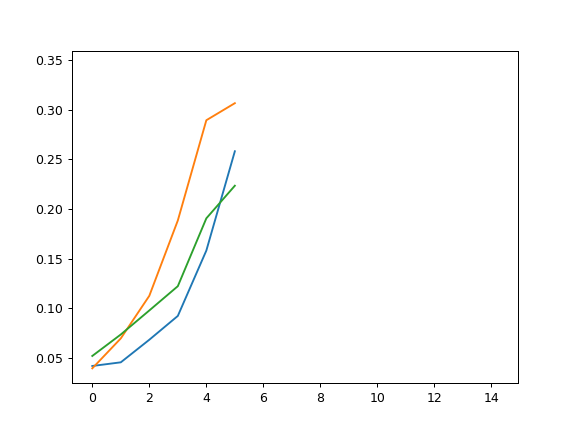

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [42]:
lkatd = {}
soriavg_temp = {}
cselection = np.array((2,5))
for k in np.array((0,)):
    print(k)
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]]) #np.logical_and(ontarget[keylist[k]],ontarget_ret_lax[keylist[k]])
    soriavg_temp[keylist[k]] = soriavg[keylist[k]][:,:,np.concatenate(((0,),cselection))]
    
plt.figure()
# plt.subplot(1,2,1)
plot_options = {'linestyle':['dashed','solid'],'c':'b'}
sizebycontrast = sca.get_norm_curves(soriavg_temp, lkatd, contrasts=((1,2)), append_gray=True)
plot_bootstrapped_errorbars(s0,sizebycontrast,transpose=False,plot_options=plot_options)
plt.legend([str(x)+'%' for x in c[cselection].astype('int')])
plt.xlabel('size (deg.)')
plt.ylabel('norm. event rate')


# plt.subplot(1,2,2)
# plot_options = None #{'linewidth':[1,1,1,1,1]}
# sselection = np.array((2,))
# contrastbysize = sca.get_norm_curves(soriavg_temp, lkatd, sizes=sselection, append_gray=False)
# plot_bootstrapped_errorbars(c,contrastbysize,transpose=True,plot_options=plot_options)
# plt.legend(s[sselection])

In [124]:
[x.sum() for x in lkatd.values()]

[24, 16, 15, 2, 100]

<IPython.core.display.Javascript object>


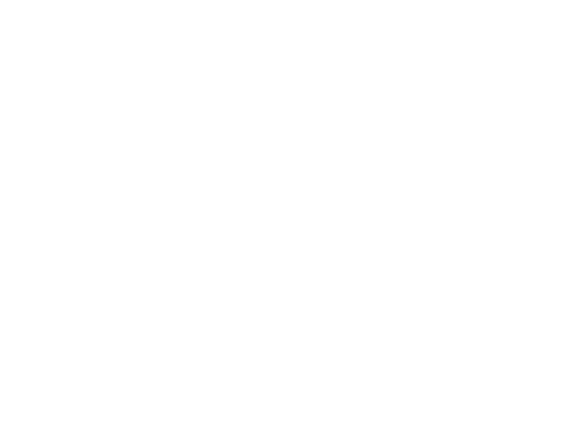

In [125]:
lkatd = {}
soriavg_temp = {}
cselection = np.array((2,5))
for k in np.array((1,2,3,4,6)):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]]) #np.logical_and(ontarget[keylist[k]],ontarget_ret_lax[keylist[k]])
    soriavg_temp[keylist[k]] = soriavg[keylist[k]][:,:,np.concatenate(((0,),cselection))]
    
plt.figure()
# plt.subplot(1,2,1)
plot_options = {'linestyle':['dashed','solid'],'c':'r'}
sizebycontrast = sca.get_norm_curves(soriavg_temp, lkatd, contrasts=((1,2)), append_gray=True)
plot_bootstrapped_errorbars(s0,sizebycontrast,transpose=False,plot_options=plot_options)
plt.legend([str(x)+'%' for x in c[cselection].astype('int')])
plt.xlabel('size (deg.)')
plt.ylabel('norm. event rate')

# plt.savefig('')


# plt.subplot(1,2,2)
# plot_options = None #{'linewidth':[1,1,1,1,1]}
# sselection = np.array((2,))
# contrastbysize = sca.get_norm_curves(soriavg_temp, lkatd, sizes=sselection, append_gray=False)
# plot_bootstrapped_errorbars(c,contrastbysize,transpose=True,plot_options=plot_options)
# plt.legend(s[sselection])

<IPython.core.display.Javascript object>


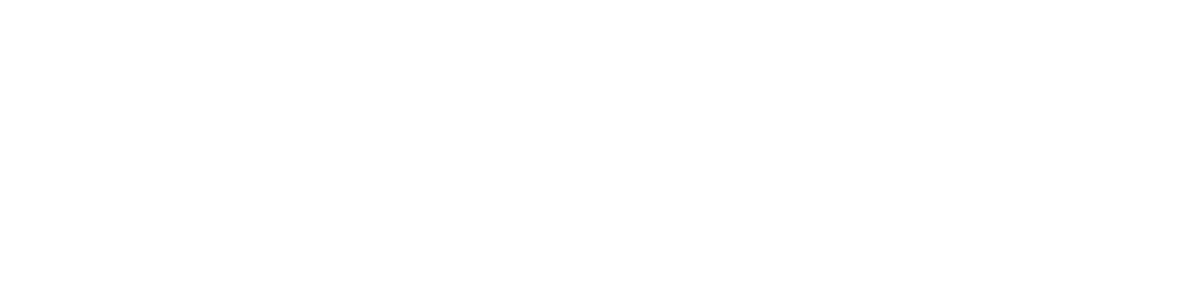

KeyError: '180618/M8956/'

In [33]:
plt.figure(figsize=(12,3))
for i,k in enumerate((1,2,3,5)):
    plt.subplot(1,4,i+1)
    plt.plot(soriavg[keylist[k]][lkatd[keylist[k]]].mean(0).T)

In [24]:
# for k in (1,2,3,5):
#     ut.plot_in_rows(soriavg[keylist[k]][lkatd[keylist[k]]].transpose((0,2,1)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyError: '180618/M8956/'

<IPython.core.display.Javascript object>


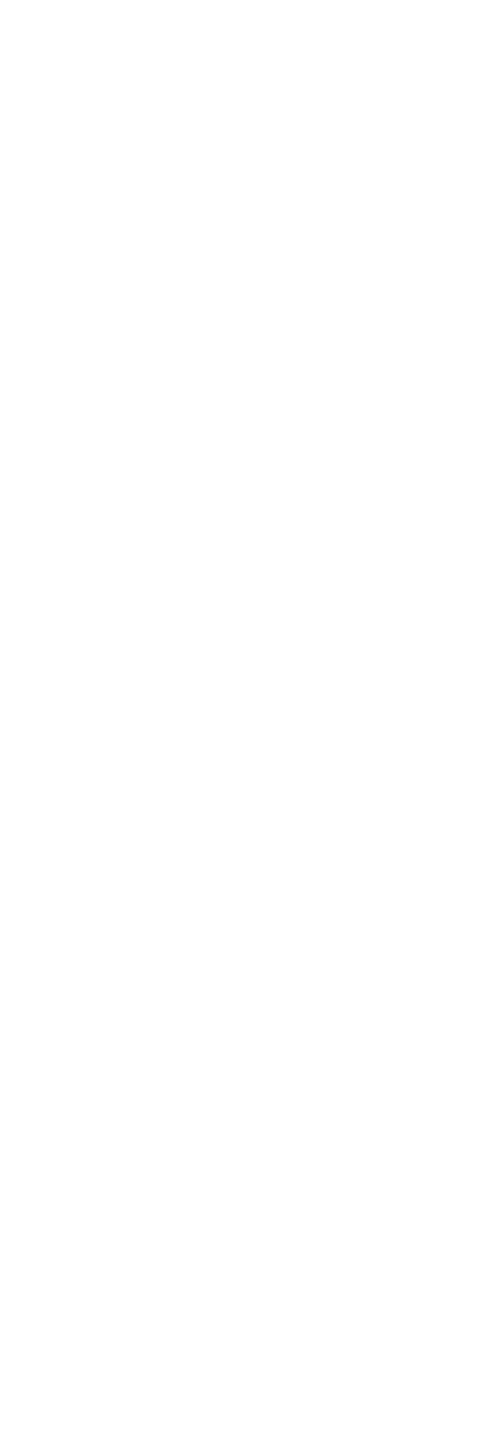

<IPython.core.display.Javascript object>


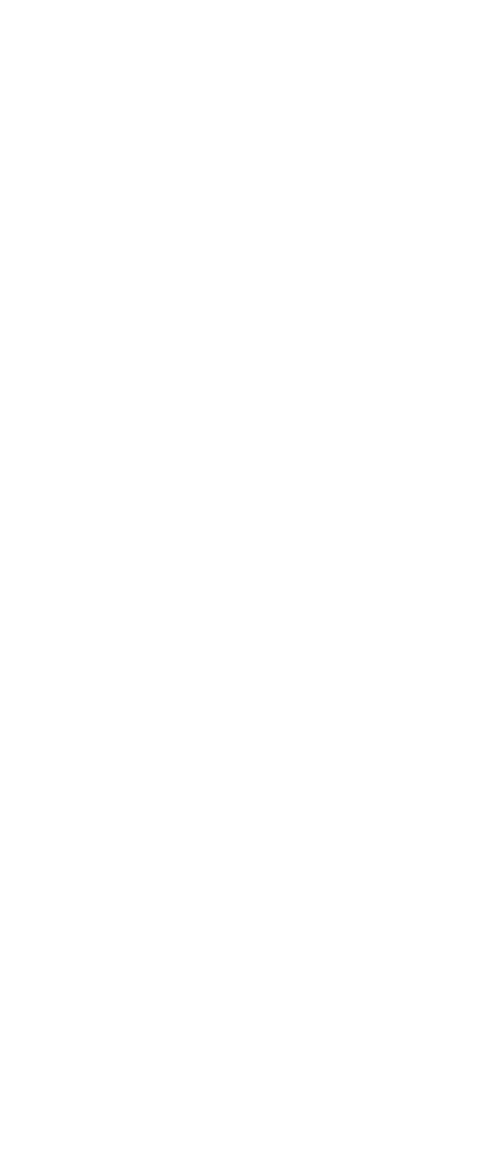

<IPython.core.display.Javascript object>


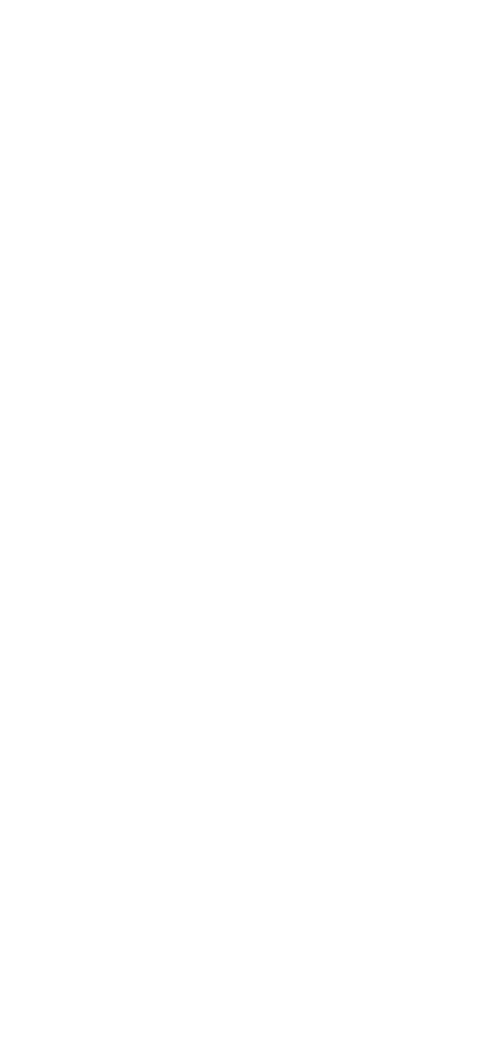

<IPython.core.display.Javascript object>


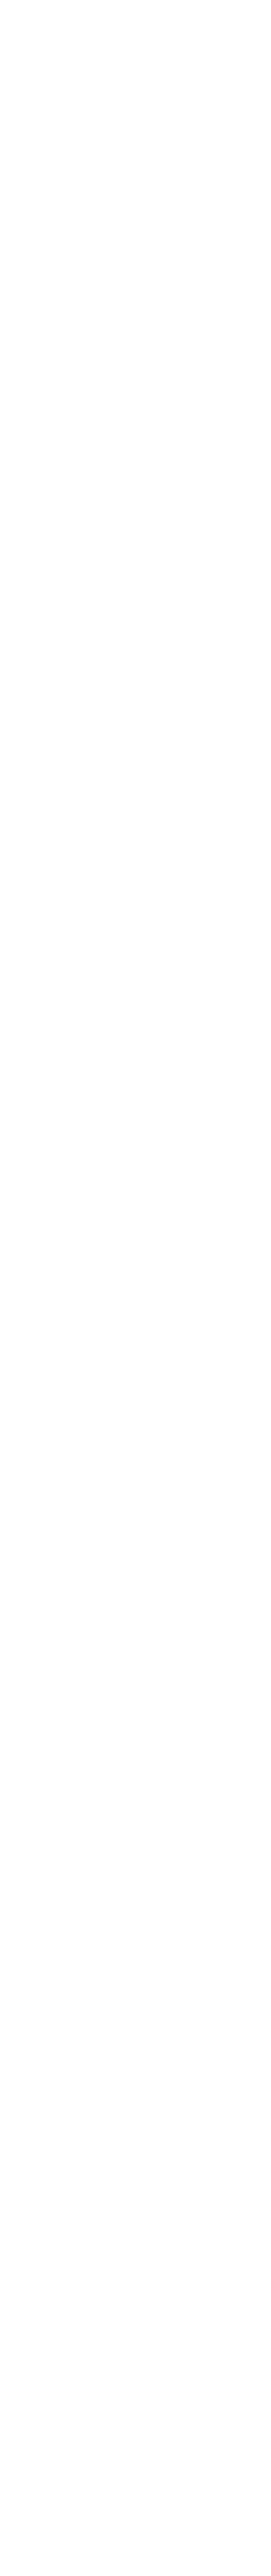

In [25]:
# for k in (1,2,3,5):
#     ut.plot_in_rows(soriavg[keylist[k]].transpose((0,2,1)))

In [126]:
lkatd.keys()

dict_keys(['180516/M8956/', '180519/M8959/', '180528/M8959/', '180531/M8961/', '180903/M8961/'])

In [127]:
for k in np.array((1,2,3,5)):
    print(ret_vars[keylist[k]]['ret'].shape)

(290, 5, 6, 2)
(226, 5, 6, 2)
(202, 5, 7, 2)
(949, 5, 7, 2)


In [128]:
# plt.figure()
# ut.imshow_in_rows(ret_vars[keylist[5]]['ret'])

In [129]:
ret_vars[keylist[5]]['ret'][10]

array([[[ 0.11134768,  0.10133714],
        [ 0.10196871,  0.13441683],
        [ 0.05807391,  0.06158953],
        [ 0.04190631,  0.04801453],
        [ 0.12709515,  0.03868319],
        [ 0.04224492,  0.03874861],
        [ 0.04554558,  0.12901705]],

       [[ 0.09190858,  0.06571841],
        [ 0.07867636,  0.1070053 ],
        [ 0.18827199,  0.06402838],
        [ 0.11185399,  0.13275506],
        [ 0.17175807,  0.06364633],
        [ 0.13546461,  0.0330469 ],
        [ 0.07527829,  0.07491215]],

       [[ 0.04381901,  0.02507423],
        [ 0.09899053,  0.09755597],
        [ 0.20556483,  0.08019736],
        [ 0.07979846,  0.073707  ],
        [ 0.43507293,  0.12617779],
        [ 0.24803577,  0.04384498],
        [ 0.0447594 ,  0.03653123]],

       [[ 0.01808232,  0.00324683],
        [ 0.11083419,  0.11516049],
        [ 0.10890315,  0.03935654],
        [ 0.09138399,  0.13432434],
        [ 0.07276079,  0.12105472],
        [ 0.20888138,  0.05412977],
        [ 0.05945215, 

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


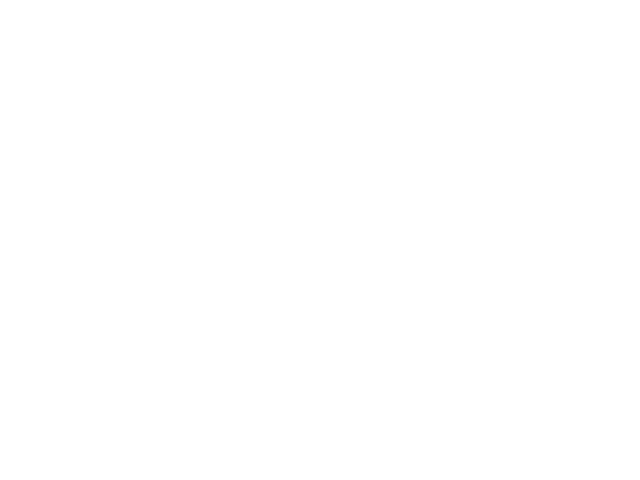

In [202]:
# szs = np.array(((2,2,2,2,2,2))

# for k in np.array((1,2,3,5)):
#     lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
#     snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k]:szs[k]+1,:]},{keylist[k]:lkat},sizes=(0,),append_gray=False)
#     # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
#     # plt.plot(c,snorm[:,0].mean(0),c='r')
#     if k==1:
#         snorm1 = snorm[:,0]
#     else:
#         snorm1 = np.vstack((snorm1,snorm[:,0]))
c = np.array((0,0.06,0.12,0.25,0.5,1))*100
szs = [np.array((0,1,2,3,4))]*7

for k in np.array((1,2,3,4,6)):
    lkat = np.logical_and(True,ontarget_ret_lax[keylist[k]])
    snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k],:]},{keylist[k]:lkat},sizes=(0,1,2,3,4),append_gray=False)
    # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
    # plt.plot(c,snorm[:,0].mean(0),c='r')
    if k==1:
        snorm1 = snorm
    else:
        snorm1 = np.vstack((snorm1,snorm))


plt.figure()
lb,ub = ut.bootstrap(snorm1,pct=(2.5,97.5),fn=np.nanmean)
for i in (1,2,4):
    plt.plot(0,0,c=np.array((1,0,1))+np.array((0,1,0))*(5-i)/5)
for i in (1,2,4):
    ut.plot_errorbar_hillel(c,np.nanmean(snorm1[:,i],axis=0),lb[i],ub[i],c=np.array((1,0,1))+np.array((0,1,0))*(5-i)/5)
# plt.plot(c,snorm1.T,alpha=0.01,c='b')
plt.legend(['8 deg','13 deg','36 deg'])
plt.ylim(-0.05,1.05)
plt.xlabel('contrast (%)')
plt.ylabel('norm. event rate')
plt.savefig('vip_crf_three.pdf')
plt.savefig('vip_crf_three.eps')

savedict = {}
savedict['contrast'] = c
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['mid'] = (np.nanmean(snorm1[:,0],axis=0),lb[0],ub[0])
# savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['mid'] = {'c':'r','linewidth':2}
# savedict['opt']['lo'] = {'c':'y','linestyle':'dashed'}

In [200]:
np.logspace(np.log10(5),np.log10(60),6)

array([  5.        ,   8.21875915,  13.50960039,  22.20643035,
        36.50186051,  60.        ])

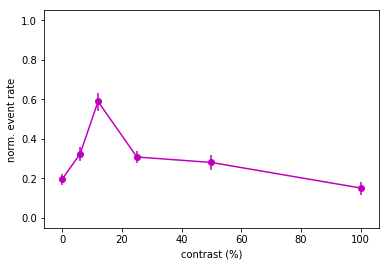

In [31]:
# szs = np.array(((2,2,2,2,2,2))

# for k in np.array((1,2,3,5)):
#     lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
#     snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k]:szs[k]+1,:]},{keylist[k]:lkat},sizes=(0,),append_gray=False)
#     # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
#     # plt.plot(c,snorm[:,0].mean(0),c='r')
#     if k==1:
#         snorm1 = snorm[:,0]
#     else:
#         snorm1 = np.vstack((snorm1,snorm[:,0]))
c = np.array((0,0.06,0.12,0.25,0.5,1))*100
szs = [np.array((0,1,2,3,4))]*7

for k in np.array((1,2,3,4,6)):
    lkat = np.logical_and(True,ontarget_ret_lax[keylist[k]])
    snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k],:]},{keylist[k]:lkat},sizes=(0,1,2,3,4),append_gray=False)
    # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
    # plt.plot(c,snorm[:,0].mean(0),c='r')
    if k==1:
        snorm1 = snorm
    else:
        snorm1 = np.vstack((snorm1,snorm))


plt.figure()
lb,ub = ut.bootstrap(snorm1,pct=(2.5,97.5),fn=np.nanmean)
for i in (2,):
    ut.plot_errorbar_hillel(c,np.nanmean(snorm1[:,i],axis=0),lb[i],ub[i],c='m')
# plt.plot(c,snorm1.T,alpha=0.01,c='b')
plt.ylim(-0.05,1.05)
plt.xlabel('contrast (%)')
plt.ylabel('norm. event rate')
plt.savefig('vip_crf_one.pdf')
plt.savefig('vip_crf_one.eps')

savedict = {}
savedict['contrast'] = c
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['mid'] = (np.nanmean(snorm1[:,0],axis=0),lb[0],ub[0])
# savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['mid'] = {'c':'r','linewidth':2}
# savedict['opt']['lo'] = {'c':'y','linestyle':'dashed'}

In [153]:
lb.shape

(5, 6)

<IPython.core.display.Javascript object>


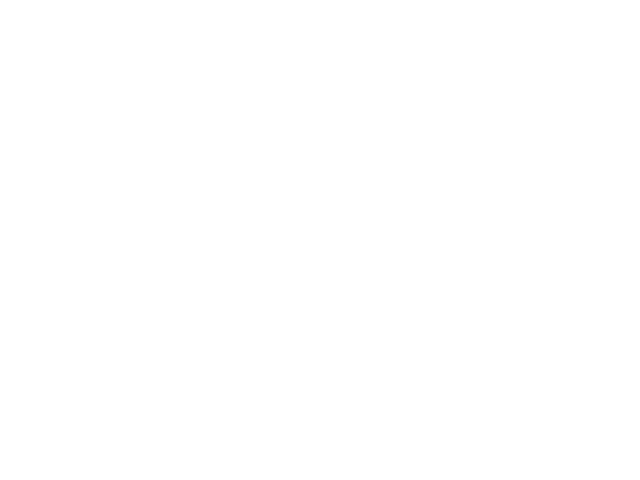

In [59]:
# szs = np.array(((2,2,2,2,2,2))

# for k in np.array((1,2,3,5)):
#     lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
#     snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k]:szs[k]+1,:]},{keylist[k]:lkat},sizes=(0,),append_gray=False)
#     # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
#     # plt.plot(c,snorm[:,0].mean(0),c='r')
#     if k==1:
#         snorm1 = snorm[:,0]
#     else:
#         snorm1 = np.vstack((snorm1,snorm[:,0]))
               
szs = [np.array((0,1,2,3,4))]*7

for k in np.array((1,2,3,4,6)):
    lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
    snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k],:]},{keylist[k]:lkat},sizes=(0,1,2,3,4),append_gray=False)
    # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
    # plt.plot(c,snorm[:,0].mean(0),c='r')
    if k==1:
        snorm1 = snorm
    else:
        snorm1 = np.vstack((snorm1,snorm))


plt.figure()
lb,ub = ut.bootstrap(snorm1,pct=(2.5,97.5),fn=np.nanmean)
for i in range(lb.shape[0]):
    ut.plot_errorbar_hillel(c,np.nanmean(snorm1[:,i],axis=0),lb[i],ub[i],c='b',linewidth=1+i)
# plt.plot(c,snorm1.T,alpha=0.01,c='b')
plt.ylim(-0.05,1.05)
plt.xlabel('contrast (%)')
plt.ylabel('norm. event rate')
# plt.savefig('vip_suppressed_crf_two.pdf')
# plt.savefig('vip_suppressed_crf_two.eps')

savedict = {}
savedict['contrast'] = c
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['mid'] = (np.nanmean(snorm1[:,0],axis=0),lb[0],ub[0])
# savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['mid'] = {'c':'r','linewidth':2}
# savedict['opt']['lo'] = {'c':'y','linestyle':'dashed'}

<IPython.core.display.Javascript object>


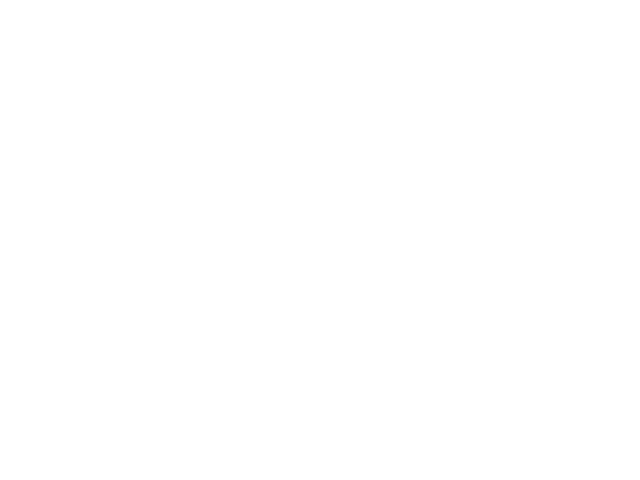

In [63]:
# szs = np.array(((2,2,2,2,2,2))

# for k in np.array((1,2,3,5)):
#     lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
#     snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k]:szs[k]+1,:]},{keylist[k]:lkat},sizes=(0,),append_gray=False)
#     # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
#     # plt.plot(c,snorm[:,0].mean(0),c='r')
#     if k==1:
#         snorm1 = snorm[:,0]
#     else:
#         snorm1 = np.vstack((snorm1,snorm[:,0]))
               
szs = [np.array((0,1,2,3,4))]*7

for k in np.array((1,2,3,4,6)):
    lkat = np.logical_and(True,ontarget_ret_lax[keylist[k]])
    snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k],:]},{keylist[k]:lkat},sizes=(0,1,2,3,4),append_gray=False)
    # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
    # plt.plot(c,snorm[:,0].mean(0),c='r')
    if k==1:
        snorm1 = snorm
    else:
        snorm1 = np.vstack((snorm1,snorm))


plt.figure()
lb,ub = ut.bootstrap(snorm1,pct=(2.5,97.5),fn=np.nanmean)
for i in range(lb.shape[0]):
    ut.plot_errorbar_hillel(c,np.nanmean(snorm1[:,i],axis=0),lb[i],ub[i],c='m',linewidth=1+i)
# plt.plot(c,snorm1.T,alpha=0.01,c='b')
plt.ylim(-0.05,1.05)
plt.xlabel('contrast (%)')
plt.ylabel('norm. event rate')
# plt.savefig('vip_suppressed_crf_two.pdf')
# plt.savefig('vip_suppressed_crf_two.eps')

savedict = {}
savedict['contrast'] = c
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['mid'] = (np.nanmean(snorm1[:,0],axis=0),lb[0],ub[0])
# savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['mid'] = {'c':'r','linewidth':2}
# savedict['opt']['lo'] = {'c':'y','linestyle':'dashed'}

/home/mossing/Documents/code/adesnal/size_contrast_analysis.py:248: RuntimeWarning: invalid value encountered in true_divide
  return arr/np.nanmax(np.nanmax(arr,axis=1),axis=1)[:,np.newaxis,np.newaxis]


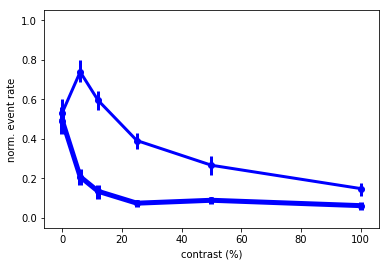

In [36]:
# szs = np.array(((2,2,2,2,2,2))

# for k in np.array((1,2,3,5)):
#     lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
#     snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k]:szs[k]+1,:]},{keylist[k]:lkat},sizes=(0,),append_gray=False)
#     # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
#     # plt.plot(c,snorm[:,0].mean(0),c='r')
#     if k==1:
#         snorm1 = snorm[:,0]
#     else:
#         snorm1 = np.vstack((snorm1,snorm[:,0]))
               
szs = [np.array((0,1,2,3,4))]*6

for k in np.array((1,2,3,5)):
    lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
    snorm = sca.get_norm_curves({keylist[k]:soriavg[keylist[k]][:,szs[k],:]},{keylist[k]:lkat},sizes=(0,1,2,3,4),append_gray=False)
    # plt.plot(c,snorm[:,0].T,c='r',alpha=1e-1)
    # plt.plot(c,snorm[:,0].mean(0),c='r')
    if k==1:
        snorm1 = snorm
    else:
        snorm1 = np.vstack((snorm1,snorm))


plt.figure()
lb,ub = ut.bootstrap(snorm1,pct=(2.5,97.5),fn=np.nanmean)
for i in np.array((2,4)):
    ut.plot_errorbar_hillel(c,np.nanmean(snorm1[:,i],axis=0),lb[i],ub[i],c='b',linewidth=i+1)
# plt.plot(c,snorm1.T,alpha=0.01,c='b')
plt.ylim(-0.05,1.05)
plt.xlabel('contrast (%)')
plt.ylabel('norm. event rate')
# plt.savefig('vip_suppressed_crf_two.pdf')
# plt.savefig('vip_suppressed_crf_two.eps')

savedict = {}
savedict['contrast'] = c
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['mid'] = (np.nanmean(snorm1[:,0],axis=0),lb[0],ub[0])
# savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['mid'] = {'c':'r','linewidth':2}
# savedict['opt']['lo'] = {'c':'y','linestyle':'dashed'}

<IPython.core.display.Javascript object>


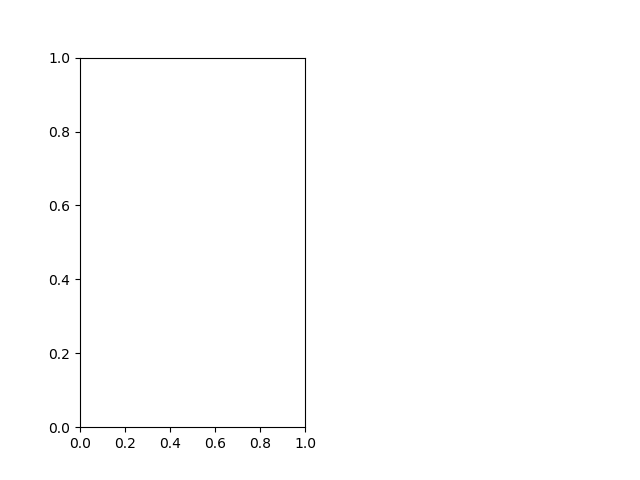

NameError: name 'get_norm_curves' is not defined

In [75]:
lkatd = {}
for k in np.array((1,2,3,5)):
    lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]]) #np.logical_and(ontarget[keylist[k]],ontarget_ret_lax[keylist[k]])
    lkatd[keylist[k]] = lkat
    
plt.figure()
plt.subplot(1,2,1)
plot_options = None #{'linestyle':['solid','solid','solid','solid','solid']}
cselection = np.array((2,4))
sizebycontrast = get_norm_curves(soriavg, lkatd, contrasts=cselection, append_gray=True)
plot_bootstrapped_errorbars(s0,sizebycontrast,transpose=False,plot_options=plot_options)
plt.legend(c[cselection])
plt.subplot(1,2,2)
plot_options = None #{'linewidth':[1,1,1,1,1]}
sselection = np.array((2,))
contrastbysize = get_norm_curves(soriavg, lkatd, sizes=sselection, append_gray=False)
plot_bootstrapped_errorbars(c,contrastbysize,transpose=True,plot_options=plot_options)
plt.legend(s[sselection])

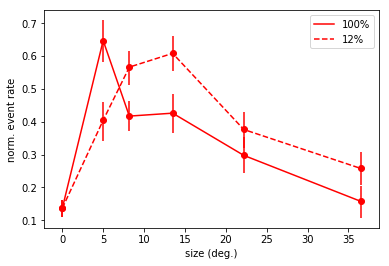

In [116]:
lkatd = {}
for k in ((1,2,3,4,6)):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]])
    
snorm = sca.get_norm_curves(soriavg,lkatd,append_gray=True)
    
reload(ut)
plt.figure()
lb,ub = ut.bootstrap(snorm,np.nanmean,pct=(2.5,97.5))
s0 = np.concatenate(((0,),s))
plt.plot(s0.mean(),0.5,c='r',linestyle='solid')
plt.plot(s0.mean(),0.5,c='r',linestyle='dashed')
ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,-1],lb[:,-1],ub[:,-1],c='r',linestyle='solid')
ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2],c='r',linestyle='dashed')
plt.legend(['100%','12%'])
plt.ylabel('norm. event rate')
plt.xlabel('size (deg.)')
plt.savefig('vip_facilitated_size_tuning.pdf')
plt.savefig('vip_facilitated_size_tuning.eps')
savedict = {}
savedict['size'] = s0
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['hi'] = (np.nanmean(snorm,axis=0)[:,-1],lb[:,-1],ub[:,-1])
savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['hi'] = {'c':'r','linestyle':'solid'}
savedict['opt']['lo'] = {'c':'r','linestyle':'dashed'}

<IPython.core.display.Javascript object>


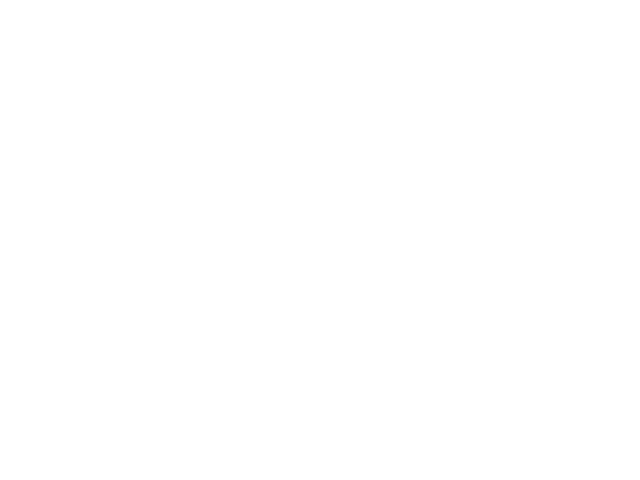

In [57]:
lkatd = {}
for k in ((1,2,3,4,6)):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]])
    
snorm = sca.get_norm_curves(soriavg,lkatd,append_gray=True)
    
reload(ut)
plt.figure()
lb,ub = ut.bootstrap(snorm,np.nanmean,pct=(2.5,97.5))
s0 = np.concatenate(((0,),s))
for i in range(1,lb.shape[1],2):
    plt.plot(s0.mean(),0.5,c=np.array((1,0,0))+(5-i)/5*np.array((0,1,1)),linestyle='solid')
for i in range(1,lb.shape[1],2):
    ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,i],lb[:,i],ub[:,i],c=np.array((1,0,0))+(5-i)/5*np.array((0,1,1)),linestyle='solid')
# ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2],c='r',linestyle='dashed')
plt.legend(['6%','25%','100%'])
plt.ylabel('norm. event rate')
plt.xlabel('size (deg.)')
# plt.savefig('vip_facilitated_size_tuning.pdf')
# plt.savefig('vip_facilitated_size_tuning.eps')
savedict = {}
savedict['size'] = s0
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['hi'] = (np.nanmean(snorm,axis=0)[:,-1],lb[:,-1],ub[:,-1])
savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['hi'] = {'c':'r','linestyle':'solid'}
savedict['opt']['lo'] = {'c':'r','linestyle':'dashed'}

<IPython.core.display.Javascript object>


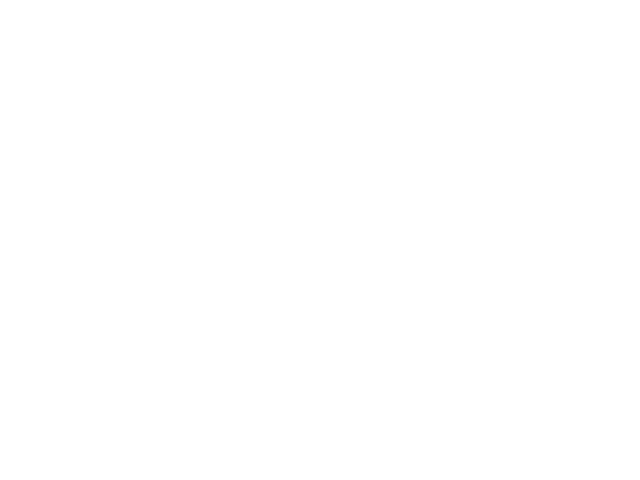

In [58]:
lkatd = {}
for k in ((1,2,3,4,6)):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
    
snorm = sca.get_norm_curves(soriavg,lkatd,append_gray=True)
    
reload(ut)
plt.figure()
lb,ub = ut.bootstrap(snorm,np.nanmean,pct=(2.5,97.5))
s0 = np.concatenate(((0,),s))
for i in range(1,lb.shape[1],2):
    plt.plot(s0.mean(),0.5,c=np.array((0,0,1))+(5-i)/5*np.array((1,1,0)),linestyle='solid')
for i in range(1,lb.shape[1],2):
    ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,i],lb[:,i],ub[:,i],c=np.array((0,0,1))+(5-i)/5*np.array((1,1,0)),linestyle='solid')
# ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2],c='r',linestyle='dashed')
plt.legend(['6%','25%','100%'])
plt.ylabel('norm. event rate')
plt.xlabel('size (deg.)')
# plt.savefig('vip_facilitated_size_tuning.pdf')
# plt.savefig('vip_facilitated_size_tuning.eps')
savedict = {}
savedict['size'] = s0
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['hi'] = (np.nanmean(snorm,axis=0)[:,-1],lb[:,-1],ub[:,-1])
savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['hi'] = {'c':'r','linestyle':'solid'}
savedict['opt']['lo'] = {'c':'r','linestyle':'dashed'}

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


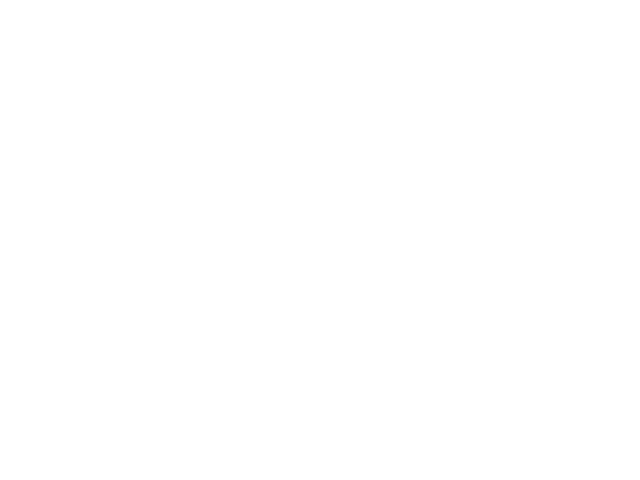

In [195]:
lkatd = {}
for k in ((1,2,3,4,6)):
    lkatd[keylist[k]] = np.logical_and(True,ontarget_ret_lax[keylist[k]])
    
snorm = sca.get_norm_curves(soriavg,lkatd,append_gray=True)
    
reload(ut)
plt.figure()
lb,ub = ut.bootstrap(snorm,np.nanmean,pct=(2.5,97.5))
s0 = np.concatenate(((0,),s))
col = [0,0,0.6,0,0.3,0]
khi = 5
kmid = 4
klo = 2
base = np.array((1,0,1))
to_add = np.array((1,1,1))-base
color = {}
color['lo'] = base+col[klo]*to_add
color['mid'] = base+col[kmid]*to_add
color['hi'] = base+col[khi]*to_add
for i in np.array((klo,kmid,khi)):
    plt.plot(s0.mean(),0.5,c=base+col[i]*to_add,linestyle='solid')
for i in np.array((klo,kmid,khi)):
    color = base+col[i]*to_add
    ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,i],lb[:,i],ub[:,i],c=color,linestyle='solid')
# ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2],c='r',linestyle='dashed')
plt.ylim((-0.05,1.05))
plt.legend(['12%','50%','100%'])
plt.ylabel('norm. event rate')
plt.xlabel('size (deg.)')
# plt.savefig('vip_facilitated_size_tuning.pdf')
# plt.savefig('vip_facilitated_size_tuning.eps')
# savedict = {}
# savedict['size'] = s0
# savedict['rate'] = {}
# savedict['opt'] = {}

# savedict['rate']['hi'] = (np.nanmean(snorm,axis=0)[:,khi],lb[:,khi],ub[:,khi])
# savedict['rate']['mid'] = (np.nanmean(snorm,axis=0)[:,kmid],lb[:,kmid],ub[:,kmid])
# savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,klo],lb[:,klo],ub[:,klo])
# savedict['opt']['hi'] = {'c':color['hi'],'linestyle':'solid'}
# savedict['opt']['mid'] = {'c':color['mid'],'linestyle':'solid'}
# savedict['opt']['lo'] = {'c':color['lo'],'linestyle':'solid'}
plt.savefig('vip_size_tuning_3.eps')
plt.savefig('vip_size_tuning_3.pdf')
import pickle as pkl
with open('vip_size_3.p', 'wb') as handle:
    pkl.dump(savedict, handle, protocol=pkl.HIGHEST_PROTOCOL)
# with open('vip_all_size.p', 'wb') as handle:
#     pkl.dump(savedict, handle, protocol=pkl.HIGHEST_PROTOCOL)

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


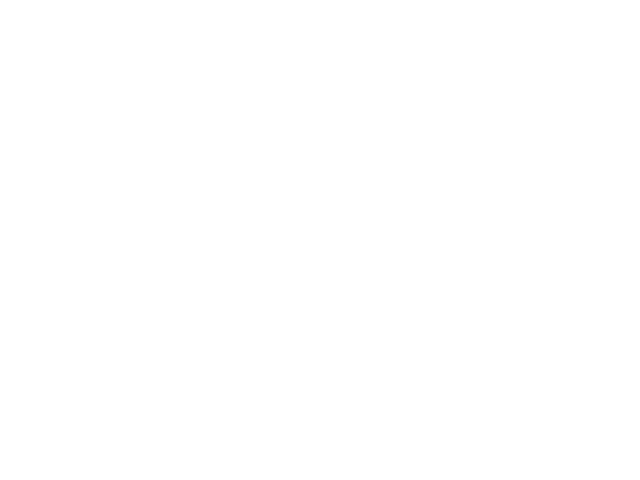

In [183]:
lkatd = {}
for k in ((1,2,3,4,6)):
    lkatd[keylist[k]] = np.logical_and(True,ontarget_ret_lax[keylist[k]])
    
snorm = sca.get_norm_curves(soriavg,lkatd,append_gray=True)
    
reload(ut)
plt.figure()
lb,ub = ut.bootstrap(snorm,np.nanmean,pct=(2.5,97.5))
s0 = np.concatenate(((0,),s))
col = [0,0,0.6,0,0.3,0]
khi = 5
kmid = 4
klo = 2
base = np.array((1,0,1))
to_add = np.array((1,1,1))-base
color = {}
color['lo'] = base+col[klo]*to_add
color['mid'] = base+col[kmid]*to_add
color['hi'] = base+col[khi]*to_add
for i in np.array((klo,)):
    plt.plot(s0.mean(),0.5,c=base+col[i]*to_add,linestyle='solid')
for i in np.array((klo,)):
    color = base+col[i]*to_add
    ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,i],lb[:,i],ub[:,i],c=color,linestyle='solid')
# ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2],c='r',linestyle='dashed')
# plt.legend(['12%'])
plt.ylim((-0.05,1.05))
plt.ylabel('norm. event rate')
plt.xlabel('size (deg.)')
# plt.savefig('vip_facilitated_size_tuning.pdf')
# plt.savefig('vip_facilitated_size_tuning.eps')
# savedict = {}
# savedict['size'] = s0
# savedict['rate'] = {}
# savedict['opt'] = {}

# savedict['rate']['hi'] = (np.nanmean(snorm,axis=0)[:,khi],lb[:,khi],ub[:,khi])
# savedict['rate']['mid'] = (np.nanmean(snorm,axis=0)[:,kmid],lb[:,kmid],ub[:,kmid])
# savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,klo],lb[:,klo],ub[:,klo])
# savedict['opt']['hi'] = {'c':color['hi'],'linestyle':'solid'}
# savedict['opt']['mid'] = {'c':color['mid'],'linestyle':'solid'}
# savedict['opt']['lo'] = {'c':color['lo'],'linestyle':'solid'}
plt.savefig('vip_size_tuning_12.eps')
plt.savefig('vip_size_tuning_12.pdf')
import pickle as pkl
with open('vip_size_12.p', 'wb') as handle:
    pkl.dump(savedict, handle, protocol=pkl.HIGHEST_PROTOCOL)

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


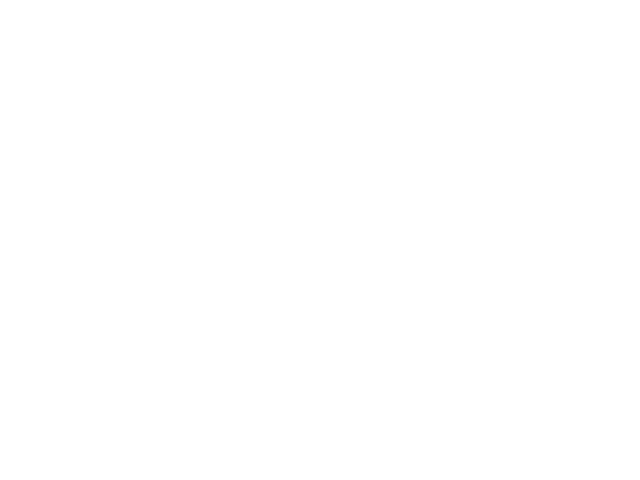

In [187]:
lkatd = {}
for k in ((1,2,3,4,6)):
    lkatd[keylist[k]] = np.logical_and(True,ontarget_ret_lax[keylist[k]])
    
snorm = sca.get_norm_curves(soriavg,lkatd,append_gray=True)
    
reload(ut)
plt.figure()
lb,ub = ut.bootstrap(snorm,np.nanmean,pct=(2.5,97.5))
s0 = np.concatenate(((0,),s))
col = [0,0,0.6,0,0.3,0]
khi = 5
kmid = 4
klo = 2
base = np.array((1,0,1))
to_add = np.array((1,1,1))-base
color = {}
color['lo'] = base+col[klo]*to_add
color['mid'] = base+col[kmid]*to_add
color['hi'] = base+col[khi]*to_add
for i in np.array((khi,)):
    plt.plot(s0.mean(),0.5,c=base+col[i]*to_add,linestyle='solid')
for i in np.array((khi,)):
    color = base+col[i]*to_add
    ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,i],lb[:,i],ub[:,i],c=color,linestyle='solid')
# ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2],c='r',linestyle='dashed')
# plt.legend(['12%'])
plt.ylim((-0.05,1.05))
plt.ylabel('norm. event rate')
plt.xlabel('size (deg.)')
# plt.savefig('vip_facilitated_size_tuning.pdf')
# plt.savefig('vip_facilitated_size_tuning.eps')
# savedict = {}
# savedict['size'] = s0
# savedict['rate'] = {}
# savedict['opt'] = {}

# savedict['rate']['hi'] = (np.nanmean(snorm,axis=0)[:,khi],lb[:,khi],ub[:,khi])
# savedict['rate']['mid'] = (np.nanmean(snorm,axis=0)[:,kmid],lb[:,kmid],ub[:,kmid])
# savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,klo],lb[:,klo],ub[:,klo])
# savedict['opt']['hi'] = {'c':color['hi'],'linestyle':'solid'}
# savedict['opt']['mid'] = {'c':color['mid'],'linestyle':'solid'}
# savedict['opt']['lo'] = {'c':color['lo'],'linestyle':'solid'}
plt.savefig('vip_size_tuning_100.eps')
plt.savefig('vip_size_tuning_100.pdf')
import pickle as pkl
with open('vip_size_12.p', 'wb') as handle:
    pkl.dump(savedict, handle, protocol=pkl.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>


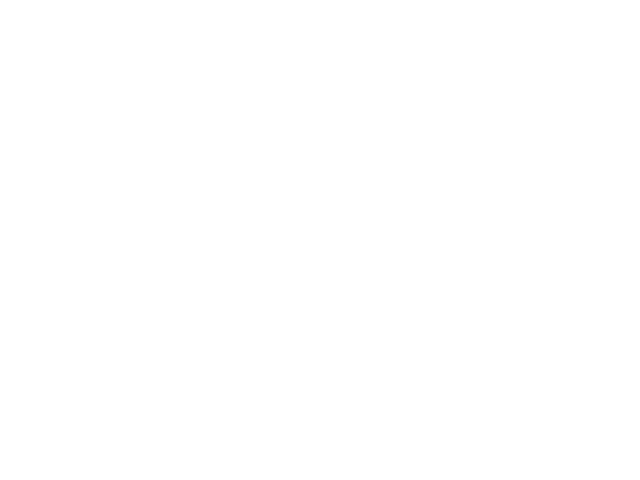

In [94]:
lkatd = {}
for k in ((1,2,3,4,6)):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
    
snorm = sca.get_norm_curves(soriavg,lkatd,append_gray=True)
    
reload(ut)
plt.figure()
lb,ub = ut.bootstrap(snorm,np.nanmean,pct=(2.5,97.5))
s0 = np.concatenate(((0,),s))
col = [0,0,0.6,0,0.3,0]
for i in np.array((2,4,5)):
    plt.plot(s0.mean(),0.5,c=np.array((0,0,1))+col[i]*np.array((1,1,0)),linestyle='solid')
for i in np.array((2,4,5)):
    ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,i],lb[:,i],ub[:,i],c=np.array((0,0,1))+col[i]*np.array((1,1,0)),linestyle='solid')
# ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2],c='r',linestyle='dashed')
plt.legend(['12%','50%','100%'])
plt.ylabel('norm. event rate')
plt.xlabel('size (deg.)')
# plt.savefig('vip_facilitated_size_tuning.pdf')
# plt.savefig('vip_facilitated_size_tuning.eps')
savedict = {}
savedict['size'] = s0
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['hi'] = (np.nanmean(snorm,axis=0)[:,-1],lb[:,-1],ub[:,-1])
savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['hi'] = {'c':np.array((1,0,1)),'linestyle':'solid'}
savedict['opt']['lo'] = {'c':np.array((1,0,1))+(5-2)/5*np.array((0,1,0)),'linestyle':'solid'}
plt.savefig('vip_suppressed_size_tuning_3.eps')
plt.savefig('vip_suppressed_size_tuning_3.pdf')
with open('vip_all_size.p', 'wb') as handle:
    pkl.dump(savedict, handle, protocol=pkl.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>


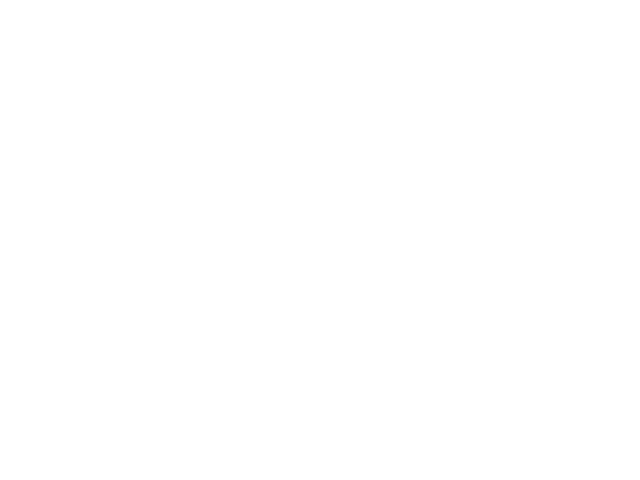

In [101]:
lkatd = {}
for k in ((1,2,3,4,6)):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]])
    
snorm = sca.get_norm_curves(soriavg,lkatd,append_gray=True)
    
reload(ut)
plt.figure()
lb,ub = ut.bootstrap(snorm,np.nanmean,pct=(2.5,97.5))
s0 = np.concatenate(((0,),s))
col = [0,0,0.6,0,0.3,0]
for i in np.array((2,4,5)):
    plt.plot(s0.mean(),0.5,c=np.array((1,0,0))+col[i]*np.array((0,1,1)),linestyle='solid')
for i in np.array((2,4,5)):
    ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,i],lb[:,i],ub[:,i],c=np.array((1,0,0))+col[i]*np.array((0,1,1)),linestyle='solid')
# ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2],c='r',linestyle='dashed')
plt.legend(['12%','50%','100%'])
plt.ylabel('norm. event rate')
plt.xlabel('size (deg.)')
# plt.savefig('vip_facilitated_size_tuning.pdf')
# plt.savefig('vip_facilitated_size_tuning.eps')
savedict = {}
savedict['size'] = s0
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['hi'] = (np.nanmean(snorm,axis=0)[:,-1],lb[:,-1],ub[:,-1])
savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['hi'] = {'c':np.array((1,0,1)),'linestyle':'solid'}
savedict['opt']['lo'] = {'c':np.array((1,0,1))+(5-2)/5*np.array((0,1,0)),'linestyle':'solid'}
plt.savefig('vip_facilitated_size_tuning_3.eps')
plt.savefig('vip_facilitated_size_tuning_3.pdf')
with open('vip_all_size.p', 'wb') as handle:
    pkl.dump(savedict, handle, protocol=pkl.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>


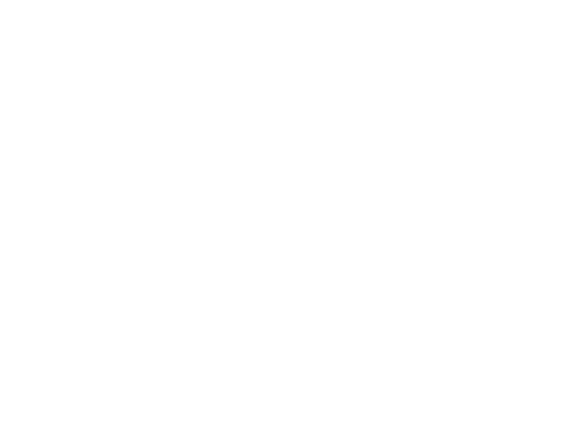

(0, 1)

In [131]:
reload(sca)
sanglemax = {}

def align_to_max(arr,arr0):
    arrc = np.zeros_like(arr[:,0,:])
    for i in range(arr.shape[0]):
        amy = np.argmax(arr[i].mean(-1))
        amx = np.argmax(arr0[i,amy])
        arrc[i] = np.roll(arr[i,amy],-amx)
    return arrc
def compute_sangle(thisproc,thislkat):
    strialwise = thisproc['strialwise'][thislkat]
    angle = thisproc['angle']
    size = thisproc['size']
    contrast = thisproc['contrast']
    trialrun = thisproc['trialrun']
    uangle = np.unique(angle)
    usize = np.unique(size)
    ucontrast = np.unique(contrast)
    sangle = np.zeros((thislkat.sum(),usize.size,uangle.size))
    sangle0 = np.zeros((thislkat.sum(),usize.size,uangle.size))
    for i in range(sangle.shape[1]):
        for j in range(sangle.shape[2]):
            thiscond = np.logical_and(trialrun,np.logical_and(np.in1d(contrast,ucontrast[-2:]),np.logical_and(angle==uangle[j],size==usize[i])))
            sangle0[:,i,j] = strialwise[:,thiscond,4:-4][:,:1].mean(-1).mean(-1)
            sangle[:,i,j] = strialwise[:,thiscond,4:-4][:,1:].mean(-1).mean(-1)
    return sangle,sangle0
plt.figure()
lkatd = {}
for k in (1,2,3,4,6):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]])
for k in (1,2,3,4,6):
    sangle,sangle0 = compute_sangle(proc[keylist[k]],lkatd[keylist[k]])
    sanglemax[keylist[k]] = align_to_max(sangle,sangle0)-spont[keylist[k]][lkatd[keylist[k]]][:,np.newaxis]
snorm = np.vstack([val for val in sanglemax.values()])
snorm = np.roll(snorm,2,axis=1)
snorm = np.hstack((snorm,snorm[:,0:1]))/(snorm.max(1)[:,np.newaxis])
lb,ub = ut.bootstrap(snorm,np.nanmean,axis=0,pct=(2.5,97.5))
ut.plot_errorbar_hillel(45*np.arange(9),np.nanmean(snorm,0),lb,ub)
plt.ylim((0,1))

lkatd = {}
for k in (1,2,3,4,6):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
for k in (1,2,3,4,6):
    sangle,sangle0 = compute_sangle(proc[keylist[k]],lkatd[keylist[k]])
    sanglemax[keylist[k]] = align_to_max(sangle,sangle0)-spont[keylist[k]][lkatd[keylist[k]]][:,np.newaxis]
snorm = np.vstack([val for val in sanglemax.values()])
snorm = np.roll(snorm,2,axis=1)
snorm = np.hstack((snorm,snorm[:,0:1]))/(snorm.max(1)[:,np.newaxis])
lb,ub = ut.bootstrap(snorm,np.nanmean,axis=0,pct=(2.5,97.5))
ut.plot_errorbar_hillel(45*np.arange(9),np.nanmean(snorm,0),lb,ub)
plt.ylim((0,1))
# plt.savefig('pc_ori_tuning.pdf')
# plt.savefig('pc_ori_tuning.eps')

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


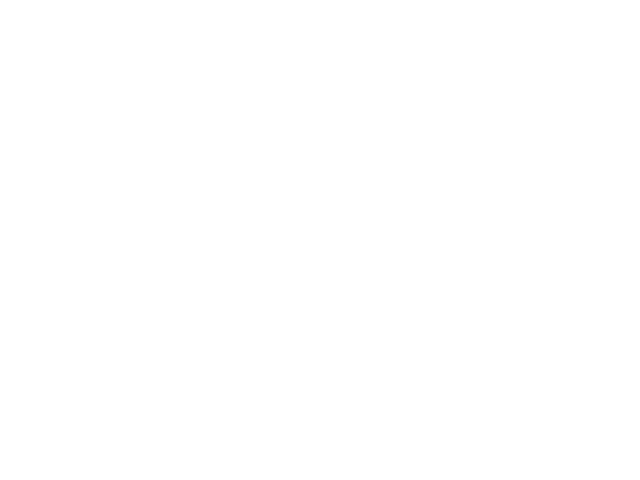

In [146]:
reload(sca)
sanglemax = {}
lkatd = {}
for k in ((0,1,2)):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]])
def align_to_max(arr,arr0):
    arrc = np.zeros_like(arr[:,0,:])
    for i in range(arr.shape[0]):
        amy = np.argmax(arr[i].mean(-1))
        amx = np.argmax(arr0[i,amy])
        arrc[i] = np.roll(arr[i,amy],-amx)
    return arrc
def compute_sangle(thisproc,thislkat,slc=slice(-2,None)):
    strialwise = thisproc['strialwise'][thislkat]
    angle = thisproc['angle']
    size = thisproc['size']
    contrast = thisproc['contrast']
    trialrun = thisproc['trialrun']
    uangle = np.unique(angle)
    usize = np.unique(size)
    ucontrast = np.unique(contrast)
    sangle = np.zeros((thislkat.sum(),usize.size,uangle.size))
    sangle0 = np.zeros((thislkat.sum(),usize.size,uangle.size))
    for i in range(sangle.shape[1]):
        for j in range(sangle.shape[2]):
            thiscond = np.logical_and(trialrun,np.logical_and(np.in1d(contrast,ucontrast[slc]),np.logical_and(angle==uangle[j],size==usize[i])))
            sangle0[:,i,j] = strialwise[:,thiscond,4:-4][:,:1].mean(-1).mean(-1)
            sangle[:,i,j] = strialwise[:,thiscond,4:-4][:,1:].mean(-1).mean(-1)
    return sangle,sangle0

lkatd = {}
for k in (1,2,3,4,6):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]])

for k in (1,2,3,4,6):
    sangle,sangle0 = compute_sangle(proc[keylist[k]],lkatd[keylist[k]],slc=slice(1,4))
    sanglemax[keylist[k]] = align_to_max(sangle,sangle0)-spont[keylist[k]][lkatd[keylist[k]]][:,np.newaxis]
snorm = np.vstack([val for val in sanglemax.values()])
snorm = np.roll(snorm,2,axis=1)
snorm = np.hstack((snorm,snorm[:,0:1]))/(snorm.max(1)[:,np.newaxis])
plt.figure()
plt.plot(0,0,c=np.array((1,0.6,0.6)))
plt.plot(0,0,c=np.array((0.6,0.6,1)))

lb,ub = ut.bootstrap(snorm,np.nanmean,axis=0,pct=(2.5,97.5))
ut.plot_errorbar_hillel(45*np.arange(9),np.nanmean(snorm,0),lb,ub,c=np.array((1,0.6,0.6)))
plt.ylim((0,1))

lkatd = {}
for k in (1,2,3,4,6):
    lkatd[keylist[k]] = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])

for k in (1,2,3,4,6):
    sangle,sangle0 = compute_sangle(proc[keylist[k]],lkatd[keylist[k]],slc=slice(1,4))
    sanglemax[keylist[k]] = align_to_max(sangle,sangle0)-spont[keylist[k]][lkatd[keylist[k]]][:,np.newaxis]
snorm = np.vstack([val for val in sanglemax.values()])
snorm = np.roll(snorm,2,axis=1)
snorm = np.hstack((snorm,snorm[:,0:1]))/(snorm.max(1)[:,np.newaxis])
lb,ub = ut.bootstrap(snorm,np.nanmean,axis=0,pct=(2.5,97.5))
ut.plot_errorbar_hillel(45*np.arange(9),np.nanmean(snorm,0),lb,ub,c=np.array((0.6,0.6,1)))
plt.ylim((0,1))
plt.legend(['facilitated VIP, low contrast','suppressed VIP, low contrast'])
plt.ylabel('norm. evoked event rate')
plt.xlabel('direction (deg.)')
plt.savefig('vip_ori_tuning.pdf')
plt.savefig('vip_ori_tuning.eps')

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


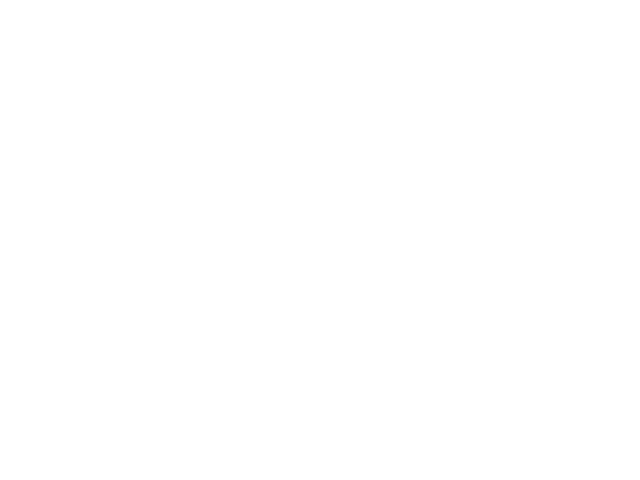

(0, 1)

In [132]:
lkatd.keys()

In [75]:
import pickle as pkl


In [103]:
for k in (1,2,3,5):
    print((ret_vars[keylist[k]]['pval_ret']<0.05).sum())

72
69
54
105


/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [97]:
ret_vars[keylist[k]]['ret'].shape

(290, 5, 6, 2)

In [88]:
[(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0).sum() for k in (1,2,3,5)]

[203, 114, 98, 32]

In [89]:
[(ontarget_ret_lax[keylist[k]]>0).sum() for k in (1,2,3,5)]

[19, 22, 13, 55]

/home/mossing/Documents/code/adesnal/size_contrast_analysis.py:248: RuntimeWarning: invalid value encountered in true_divide
  return arr/np.nanmax(np.nanmax(arr,axis=1),axis=1)[:,np.newaxis,np.newaxis]


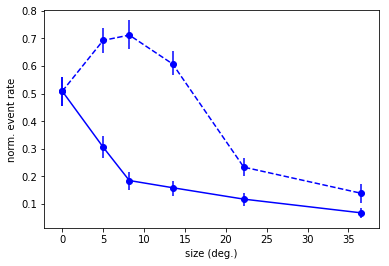

In [24]:
lkatd = {}
for k in ((1,2,3,5)):
    lkatd[keylist[k]] = lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]<0,ontarget_ret_lax[keylist[k]])
    
snorm = sca.get_norm_curves(soriavg,lkatd,append_gray=True)
    
reload(ut)
plt.figure()
lb,ub = ut.bootstrap(snorm,np.nanmean,pct=(2.5,97.5))
s0 = np.concatenate(((0,),s))
plt.plot(s0.mean(),0.5,c='b',linestyle='solid')
plt.plot(s0.mean(),0.5,c='b',linestyle='dashed')
ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,-1],lb[:,-1],ub[:,-1],c='b',linestyle='solid')
ut.plot_errorbar_hillel(s0,np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2],c='b',linestyle='dashed')
# plt.legend(['100%','12%'])
plt.ylabel('norm. event rate')
plt.xlabel('size (deg.)')
# plt.savefig('vip_suppressed_size_tuning.pdf')
# plt.savefig('vip_suppressed_size_tuning.eps')
savedict = {}
savedict['size'] = s0
savedict['rate'] = {}
savedict['opt'] = {}
savedict['rate']['hi'] = (np.nanmean(snorm,axis=0)[:,-1],lb[:,-1],ub[:,-1])
savedict['rate']['lo'] = (np.nanmean(snorm,axis=0)[:,2],lb[:,2],ub[:,2])
savedict['opt']['hi'] = {'c':'r','linestyle':'solid'}
savedict['opt']['lo'] = {'c':'r','linestyle':'dashed'}

<IPython.core.display.Javascript object>


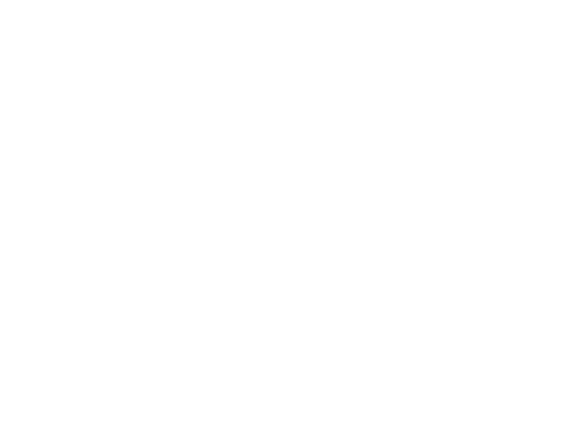

<IPython.core.display.Javascript object>


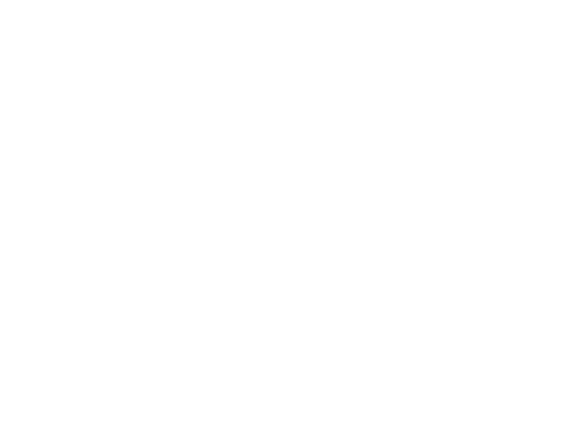

In [132]:
plt.figure()
plt.imshow(ut.norm01(proc[keylist[4]]['trialwise'][:,proc[keylist[4]]['trialrun']>100].mean(1)))
plt.figure()
plt.imshow(ut.norm01(proc[keylist[4]]['strialwise'][:,proc[keylist[4]]['trialrun']>100].mean(1)))
#plt.plot(proc[keylist[4]]['trialwise'][:,proc[keylist[4]]['trialrun']<100].mean(0).mean(0))

<IPython.core.display.Javascript object>


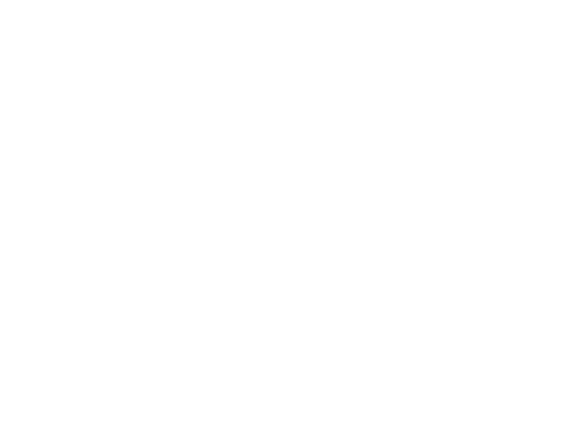

In [133]:
plt.figure()
k = 4
r = 1
plt.plot(proc[keylist[k]]['dfof'][r,:1000])
plt.plot(proc[keylist[k]]['straces'][r,:1000])

<IPython.core.display.Javascript object>


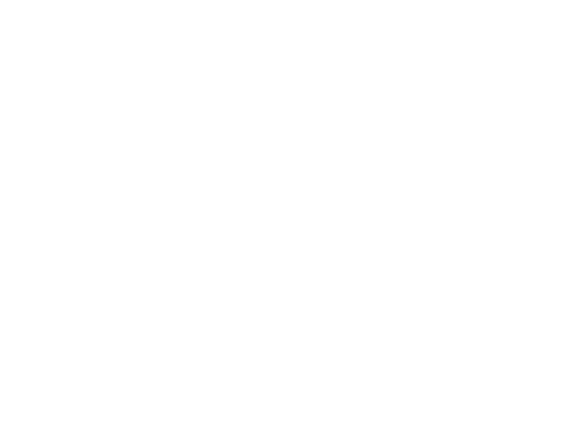

<IPython.core.display.Javascript object>


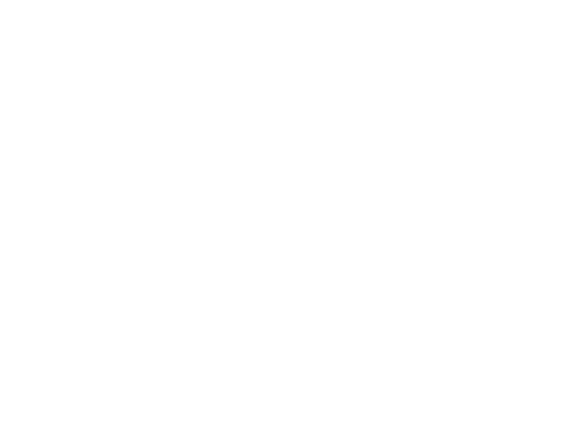

<IPython.core.display.Javascript object>


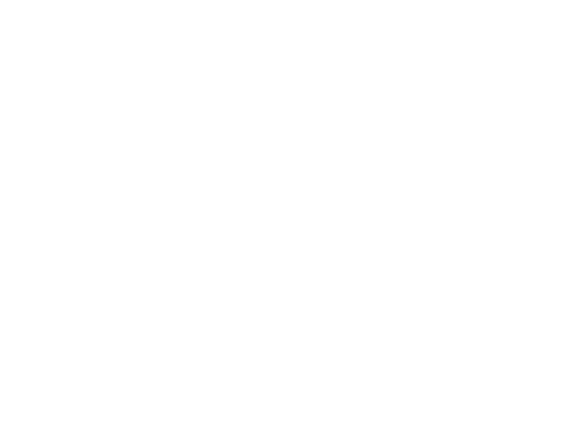

<IPython.core.display.Javascript object>


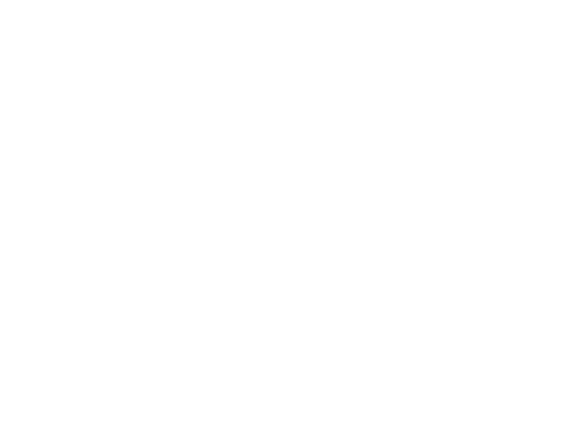

<IPython.core.display.Javascript object>


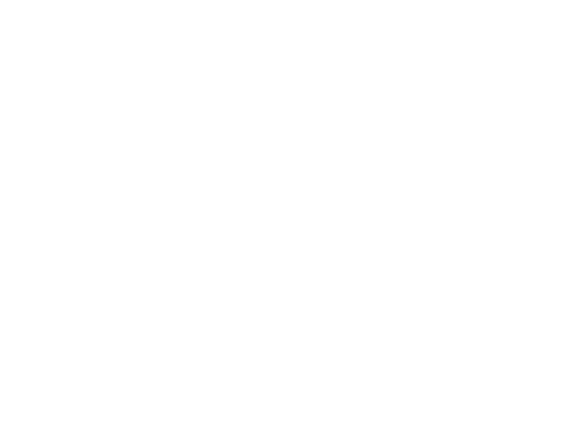

<IPython.core.display.Javascript object>


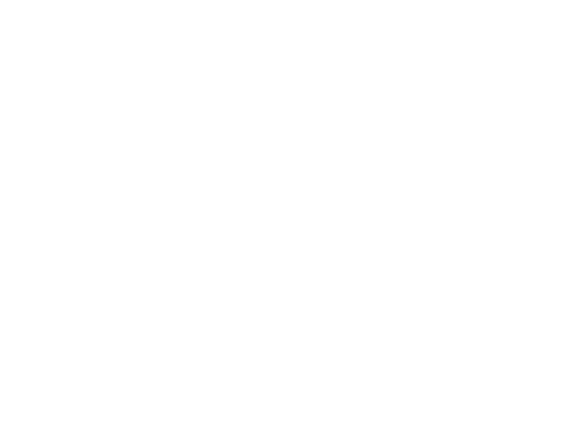

<IPython.core.display.Javascript object>


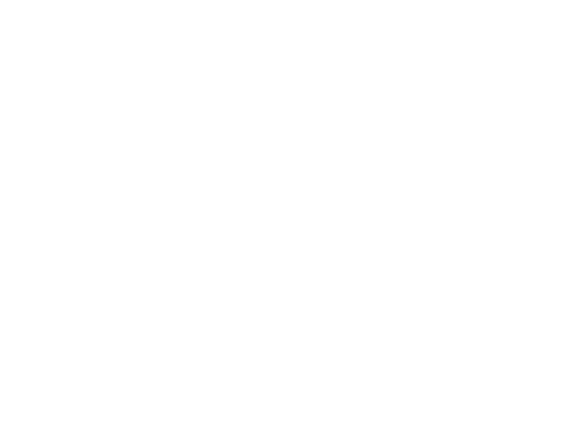

In [195]:
kmeans = [None]*7
for k in range(7):
    nc = 3
    data = soriavg[keylist[k]].reshape((soriavg[keylist[k]].shape[0],-1))
    data = data/(np.nanmax(data,1)[:,np.newaxis]+1e-3)
    kmeans[k] = sklearn.cluster.KMeans(n_clusters=nc, random_state=0).fit(data)
    plt.figure()
    for i in range(nc):
        plt.subplot(1,nc,i+1)
        plt.imshow(soriavg[keylist[k]][kmeans[k].labels_==i].mean(0))
        plt.xlabel((kmeans[k].labels_==i).mean())

<IPython.core.display.Javascript object>


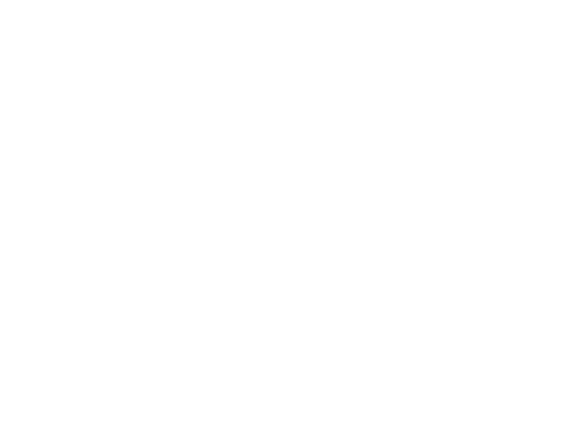

<IPython.core.display.Javascript object>


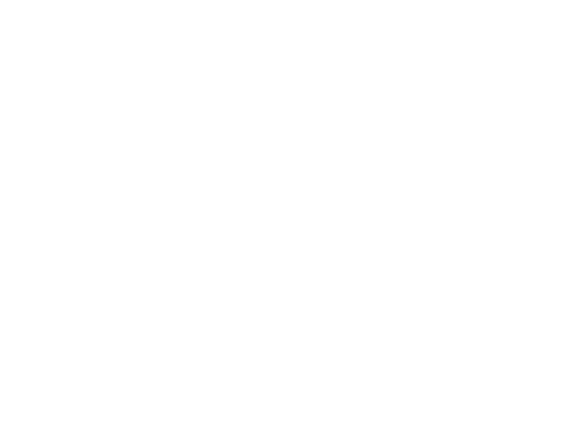

<IPython.core.display.Javascript object>


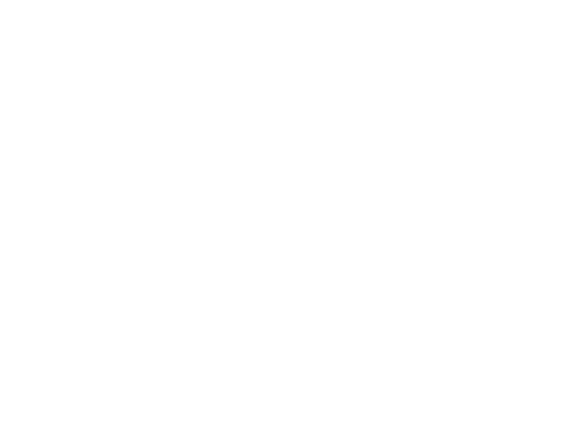

<IPython.core.display.Javascript object>


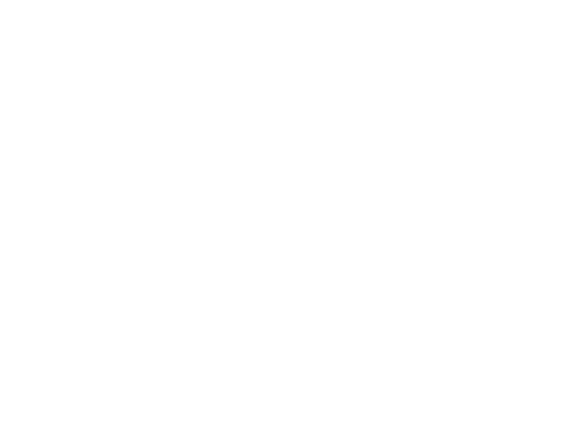

In [211]:
plt.figure()
# plt.subplot(1,2,1)
k = 0
lbl1 = 1
lbl2 = 0
arr1 = (soriavg[keylist[k]]/(1e-3+soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis]))[kmeans[k].labels_==lbl1].mean(0)
arr2 = (soriavg[keylist[k]]/(1e-3+soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis]))[kmeans[k].labels_==lbl2].mean(0)

plt.subplot(1,2,1)
colors = plt.cm.viridis(np.linspace(0,1,6))
for i in range(arr1.shape[0]):
    plt.plot(arr1[i],arr2[i],c=colors[i])
    
plt.subplot(1,2,2)
colors = plt.cm.viridis(np.linspace(0,1,6))
for i in range(arr1.shape[1]):
    plt.plot(arr1[:,i],arr2[:,i],c=colors[i])
    
plt.figure()
# plt.subplot(1,2,1)
k = 1
lbl1 = 2
lbl2 = 1
arr1 = (soriavg[keylist[k]]/(1e-3+soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis]))[kmeans[k].labels_==lbl1].mean(0)
arr2 = (soriavg[keylist[k]]/(1e-3+soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis]))[kmeans[k].labels_==lbl2].mean(0)

plt.subplot(1,2,1)
colors = plt.cm.viridis(np.linspace(0,1,6))
for i in range(arr1.shape[0]):
    plt.plot(arr1[i],arr2[i],c=colors[i])
    
plt.subplot(1,2,2)
colors = plt.cm.viridis(np.linspace(0,1,6))
for i in range(arr1.shape[1]):
    plt.plot(arr1[:,i],arr2[:,i],c=colors[i])
    
plt.figure()
# plt.subplot(1,2,1)
k = 5
lbl1 = 1
lbl2 = 2
arr1 = (soriavg[keylist[k]]/(1e-3+soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis]))[kmeans[k].labels_==lbl1].mean(0)
arr2 = (soriavg[keylist[k]]/(1e-3+soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis]))[kmeans[k].labels_==lbl2].mean(0)

plt.subplot(1,2,1)
colors = plt.cm.viridis(np.linspace(0,1,6))
for i in range(arr1.shape[0]):
    plt.plot(arr1[i],arr2[i],c=colors[i])
    
plt.subplot(1,2,2)
colors = plt.cm.viridis(np.linspace(0,1,6))
for i in range(arr1.shape[1]):
    plt.plot(arr1[:,i],arr2[:,i],c=colors[i])
    
plt.figure()
k = 6
lbl1 = 0
lbl2 = 1
arr1 = (soriavg[keylist[k]]/(1e-3+soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis]))[kmeans[k].labels_==lbl1].mean(0)
arr2 = (soriavg[keylist[k]]/(1e-3+soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis]))[kmeans[k].labels_==lbl2].mean(0)

plt.subplot(1,2,1)
colors = plt.cm.viridis(np.linspace(0,1,6))
for i in range(arr1.shape[0]):
    plt.plot(arr1[i],arr2[i],c=colors[i])
    
plt.subplot(1,2,2)
colors = plt.cm.viridis(np.linspace(0,1,6))
for i in range(arr1.shape[1]):
    plt.plot(arr1[:,i],arr2[:,i],c=colors[i])

<IPython.core.display.Javascript object>


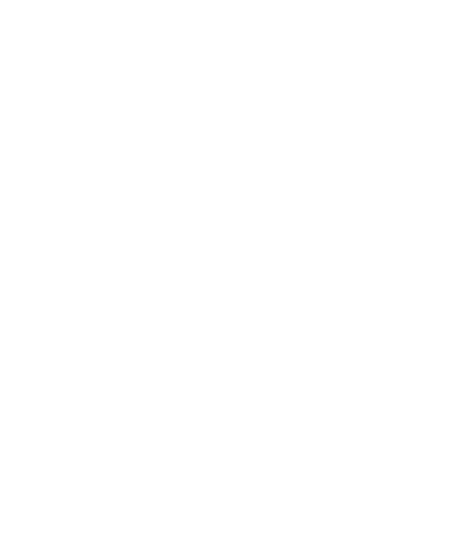

<IPython.core.display.Javascript object>


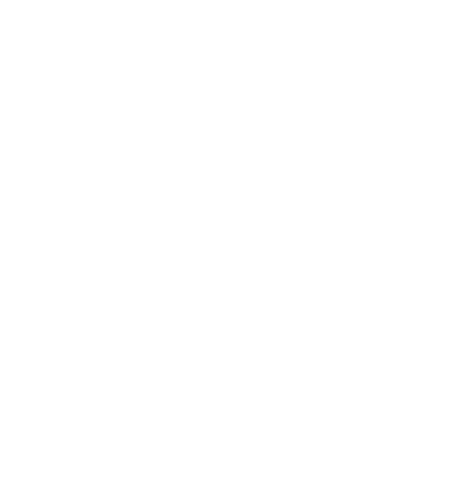

<IPython.core.display.Javascript object>


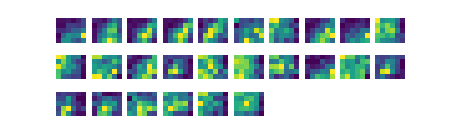

<IPython.core.display.Javascript object>


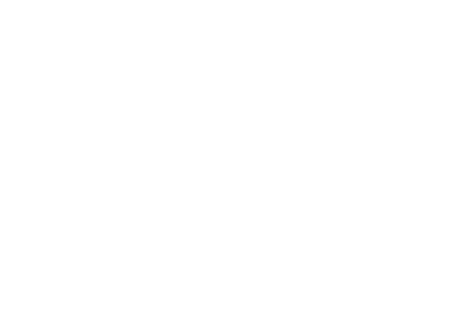

<IPython.core.display.Javascript object>


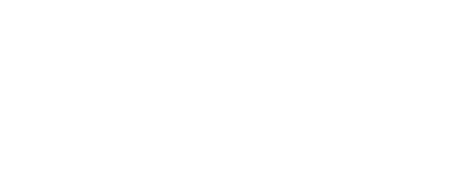

<IPython.core.display.Javascript object>


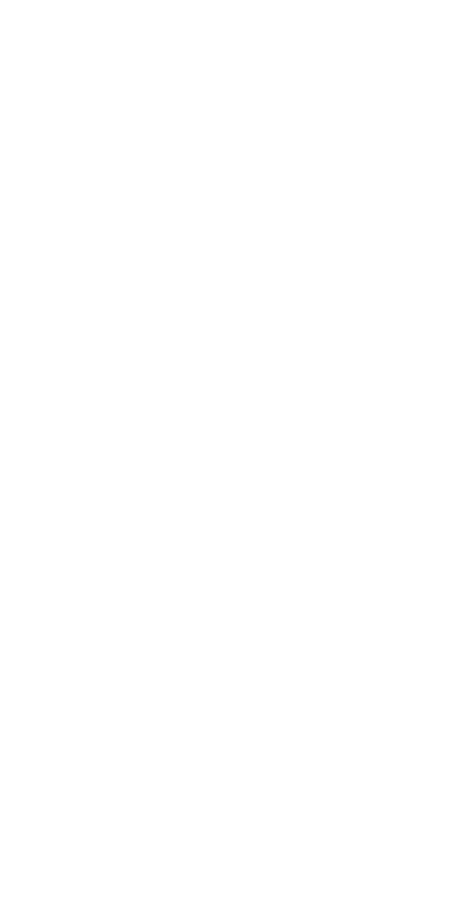

<IPython.core.display.Javascript object>


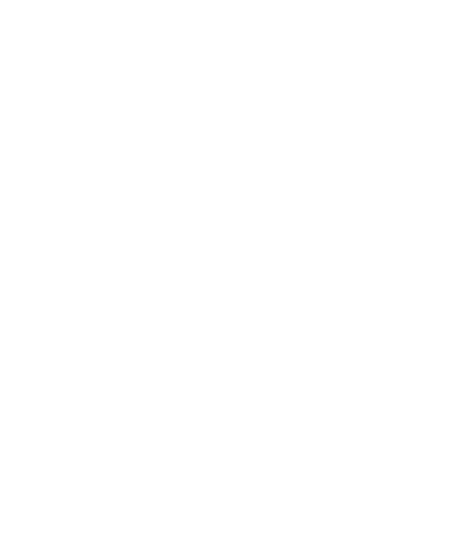

In [212]:
for k in range(7):
    ut.imshow_in_rows(soriavg[keylist[k]][ontarget_ret_lax[keylist[k]]])
# plt.savefig('example_stationary_vip_size_contrast.pdf')
# ut.imshow_in_rows(proc[keylist[k]]['oriavg_dfof'][ontarget_ret_lax[keylist[k]]])

<IPython.core.display.Javascript object>


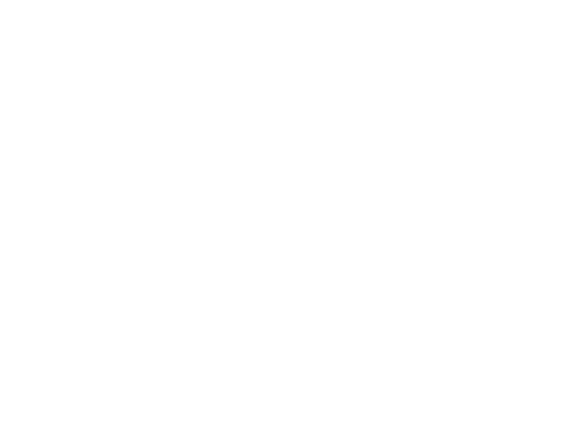

In [210]:
plt.figure()
for k in range(7):
    plt.subplot(2,7,k+1)
    plt.imshow(soriavg[keylist[k]].mean(0))
    plt.subplot(2,7,k+8)
    plt.imshow(soriavg[keylist[k]][ontarget_ret_lax[keylist[k]]].mean(0))

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


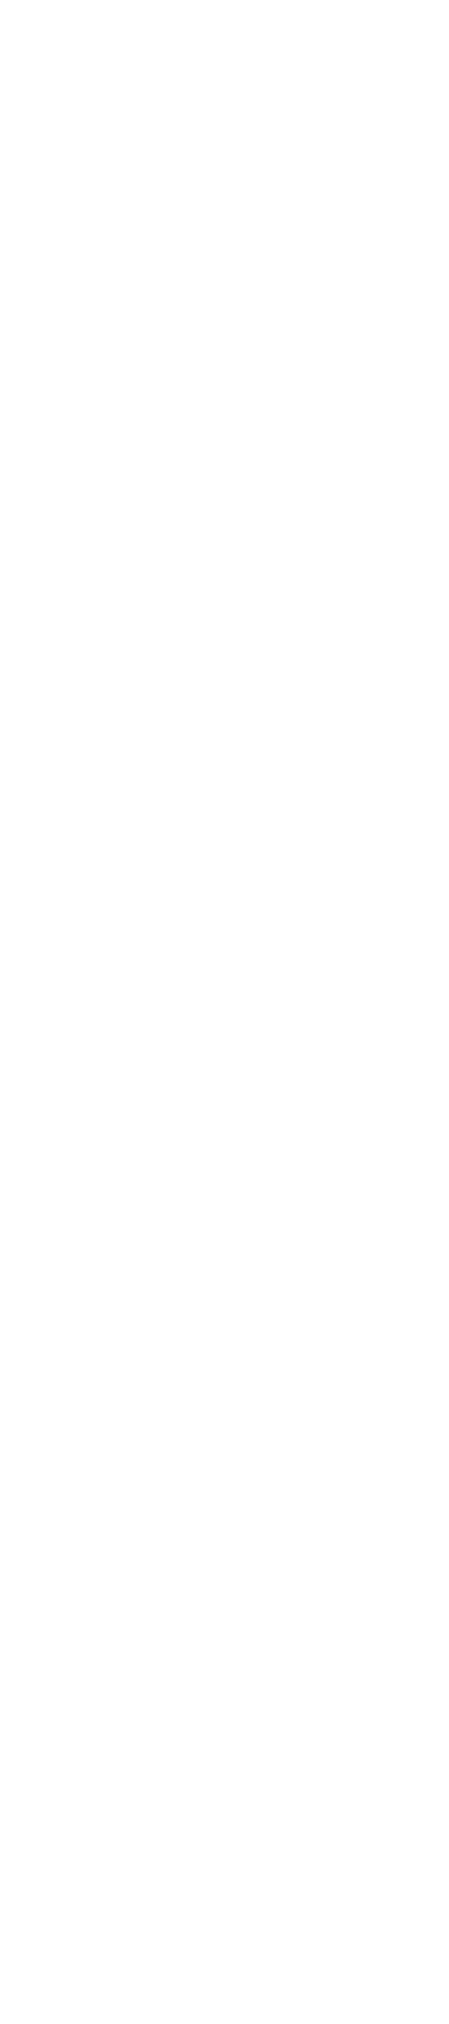

<IPython.core.display.Javascript object>


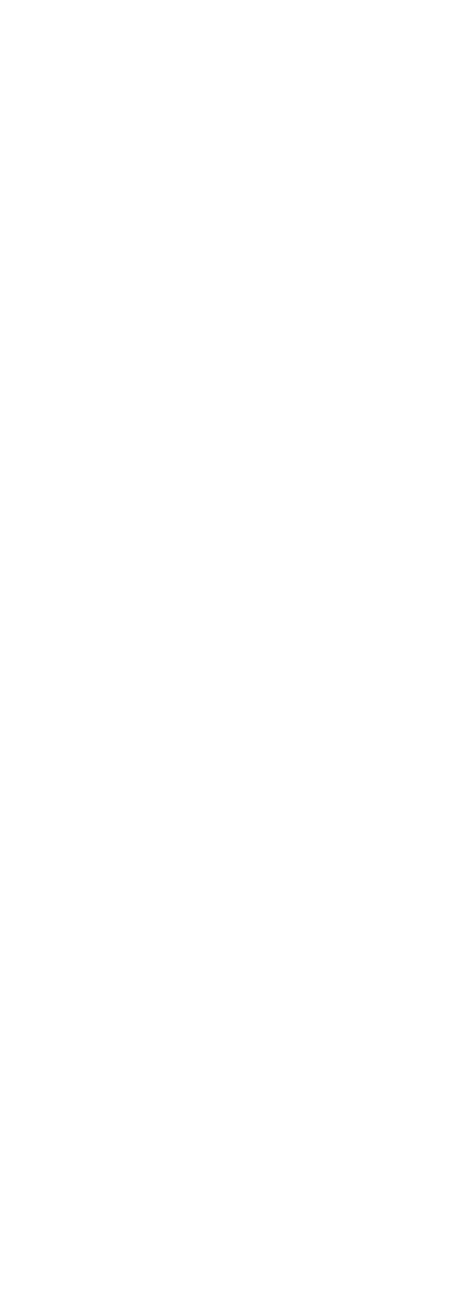

<IPython.core.display.Javascript object>


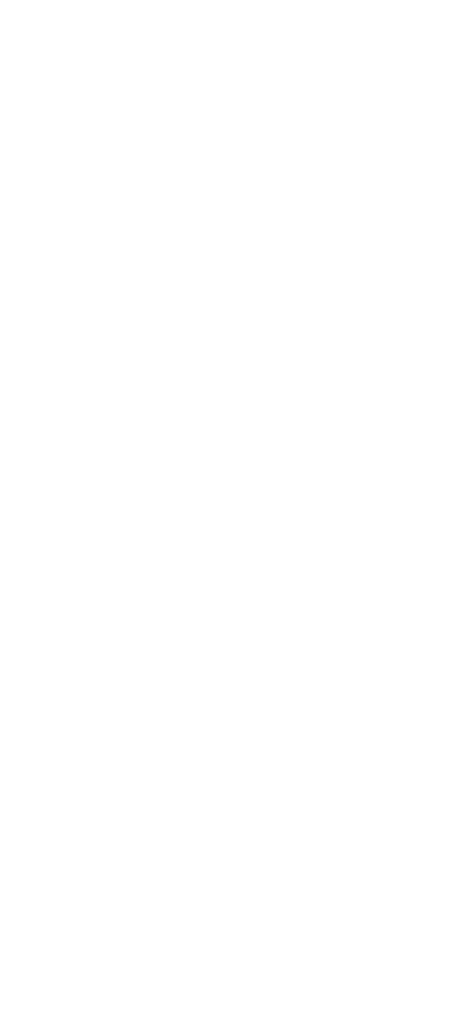

<IPython.core.display.Javascript object>


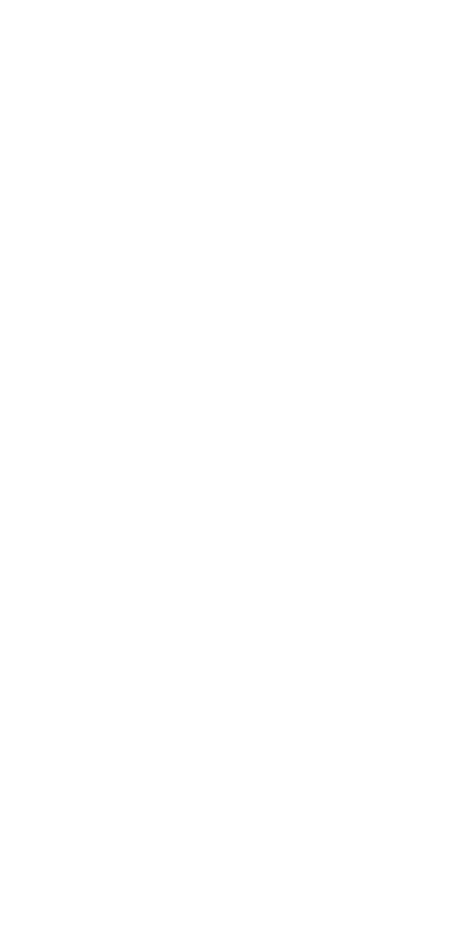

<IPython.core.display.Javascript object>


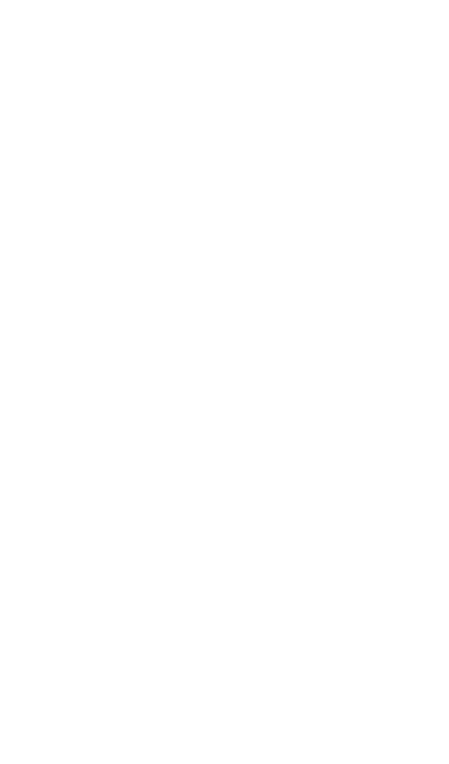

<IPython.core.display.Javascript object>


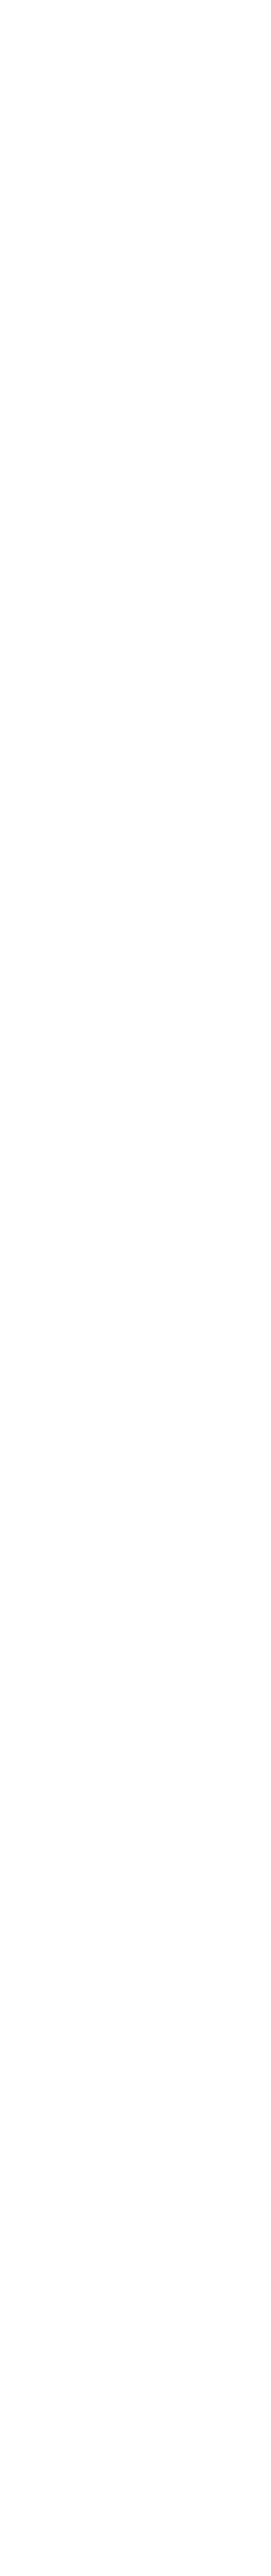

<IPython.core.display.Javascript object>


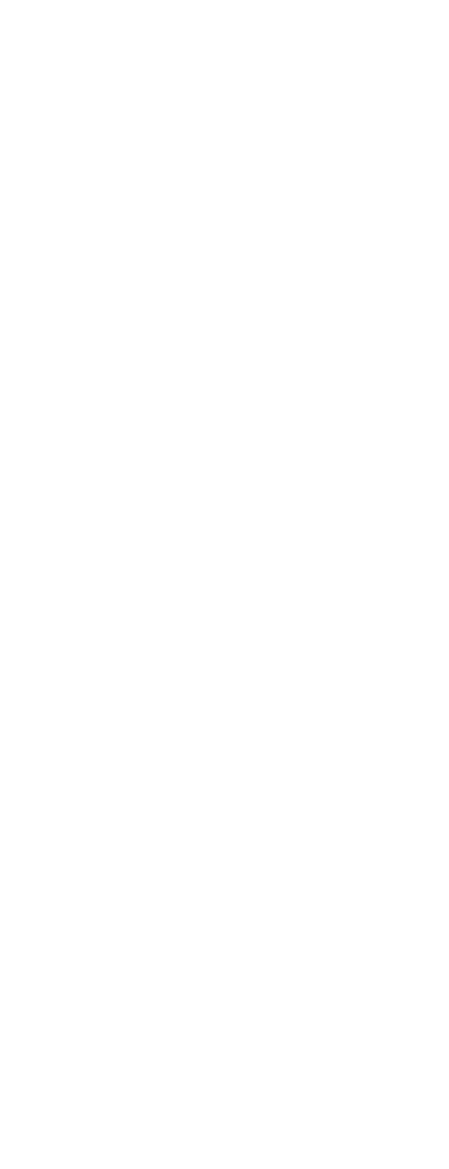

In [142]:
for k in range(7):
    ut.imshow_in_rows(soriavg[keylist[k]])
# plt.savefig('example_stationary_vip_size_contrast.pdf')
# ut.imshow_in_rows(proc[keylist[k]]['oriavg_dfof'][ontarget_ret_lax[keylist[k]]])

In [145]:
k = 0
# ut.imshow_in_rows(soriavg[keylist[k]])
proc[keylist[k]]['trialrun'].shape
proc[keylist[k]]['contrast'].shape

KeyError: 'ucontrast'

In [146]:
def trial_avg(arr,running,size,contrast):
    
#     urunning = np.unique(running)
    usize = np.unique(size)
    ucontrast = np.unique(contrast)
    
#     nrunning = len(urunning)
    nsize = len(usize)
    ncontrast = len(ucontrast)
    
    to_return = np.zeros((nsize,ncontrast))
    for j in range(nsize):
        for k in range(ncontrast):
            lkat = np.logical_and(running,np.logical_and(size==usize[j],contrast==ucontrast[k]))
            to_return[j,k] = arr[lkat].mean()
            
    return to_return

In [147]:
running_avg = trial_avg(proc[keylist[k]]['trialrun'],proc[keylist[k]]['runtrial'],proc[keylist[k]]['size'],proc[keylist[k]]['contrast'])

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


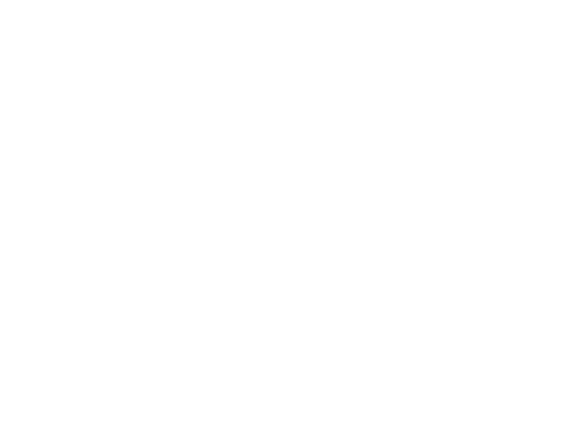

In [150]:
plt.figure()
for k in range(7):
    plt.subplot(2,4,k+1)
    running_avg = trial_avg(proc[keylist[k]]['trialrun'],proc[keylist[k]]['runtrial'],proc[keylist[k]]['size'],proc[keylist[k]]['contrast'])
    plt.imshow(running_avg)
    plt.colorbar()

In [86]:
k = 0
(proc[keylist[k]]['trialrun']>100).mean()
np.isnan(soriavg[keylist[k]]).mean()
np.isnan(proc[keylist[k]]['strialwise']).mean()
np.isnan(proc[keylist[k]]['runtrial']).mean()

0.0

<IPython.core.display.Javascript object>


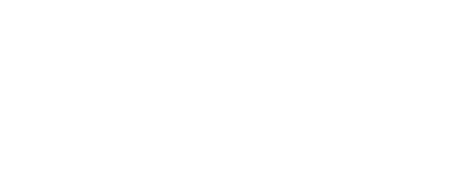

<IPython.core.display.Javascript object>


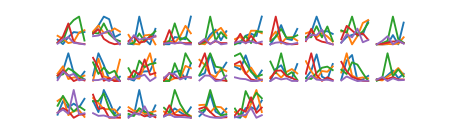

<IPython.core.display.Javascript object>


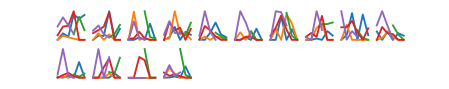

<IPython.core.display.Javascript object>


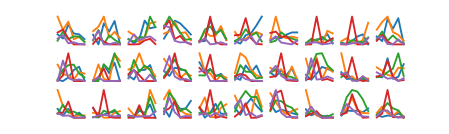

<IPython.core.display.Javascript object>


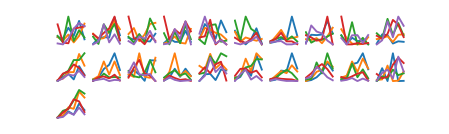

<IPython.core.display.Javascript object>


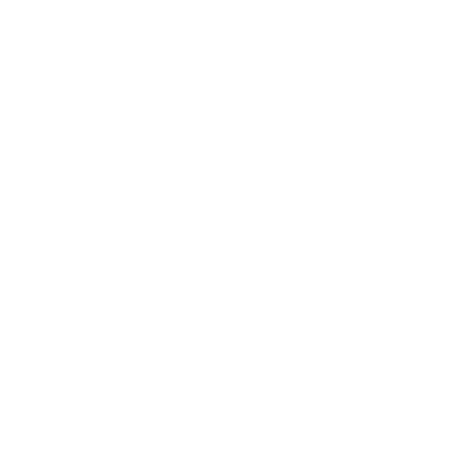

<IPython.core.display.Javascript object>


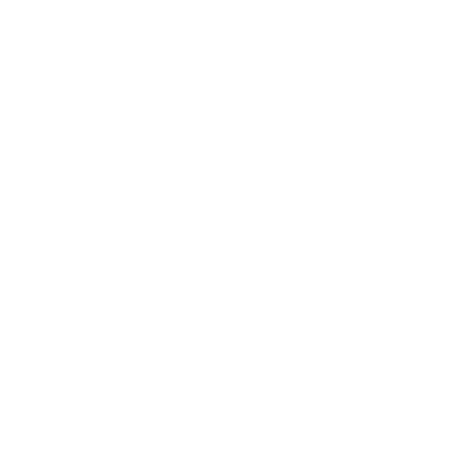

In [76]:
k = 6
for k in range(len(keylist)):
    ut.plot_in_rows(soriavg[keylist[k]][ontarget_ret_lax[keylist[k]]].transpose((0,2,1)))
#     plt.savefig('vip_size_contrast_{}.pdf'.format(k))

In [674]:
import naka_rushton_analysis as nra
reload(nra)

<module 'naka_rushton_analysis' from '/home/mossing/Documents/code/adesnal/naka_rushton_analysis.py'>

In [688]:
param

array([  1.30679388e-03,   2.47806422e-03,   1.75390456e-03,
         1.89120782e-03,   4.46116625e-04,   1.48363392e-02,
         6.78125789e+01,   2.57734807e+01,   1.77103157e+01,
         5.21661286e+00,   2.63399413e+00,   2.29472232e+00])

In [685]:
nra.naka_rushton_all(c,param,5)

array([[ 0.01483634,  0.01478471,  0.01458673,  0.01359205,  0.01034485,
         0.00524169],
       [ 0.01483634,  0.01441533,  0.01301323,  0.00887314,  0.0046947 ,
         0.0030051 ],
       [ 0.01483634,  0.01382895,  0.01103655,  0.00583486,  0.00286047,
         0.00199571],
       [ 0.01483634,  0.00733358,  0.0035585 ,  0.00223689,  0.00196319,
         0.00190594],
       [ 0.01483634,  0.00233615,  0.00087631,  0.00052794,  0.00046287,
         0.00044953]])

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


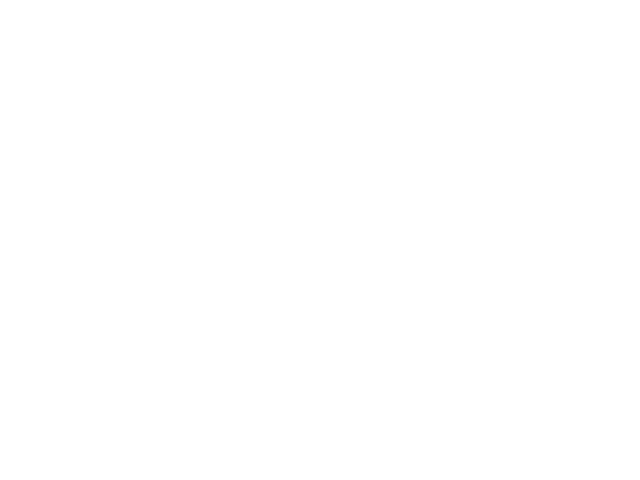

In [701]:
reload(nra)
plt.figure()
c=np.array((0,0.06,0.12,0.25,0.5,1))*100
data = soriavg[keylist[k]][ontarget_ret_lax[keylist[k]]][8]

param = nra.fit_opt_params_two_n(c,data)
plt.plot(c,data.T)
plt.plot(c,nra.naka_rushton_two_n(c,param,5).T,linestyle='dashed')

In [713]:
keylist56 = keylist.copy()
keylist56.remove(keylist[0])
keylist56.remove(keylist[4])

In [721]:
Rgrand = np.zeros((len(keylist56),)+soriavg[thisfold][0].shape)
for i,key in enumerate(keylist56):
    print(i)
    gd = ret_vars[key]['paramdict_normal']['amplitude'][()]<0
    Rgrand[i] = soriavg[key][np.logical_and(gd,ontarget_ret_lax[key])].mean(0)

0
1
2
3


In [722]:
keylist56

['180516/M8956/', '180528/M8959/', '180531/M8961/', '180903/M8961/']

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


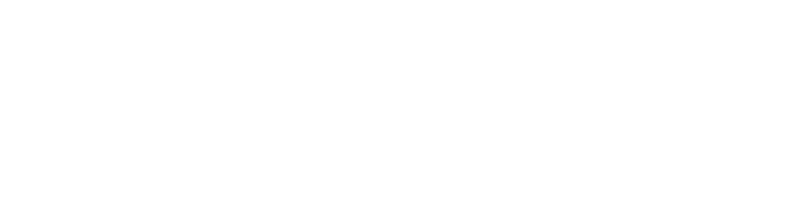

In [726]:
plt.figure(figsize=(8,2))
for i in range(Rgrand.shape[0]):
    plt.subplot(1,4,i+1)
    plt.plot(c,Rgrand[i].T)

In [728]:
import pickle as pkl
with open('sst_mean_size_contrast.p', 'rb') as handle:
    SST = pkl.load(handle)

In [746]:
import pickle as pkl
with open('fake_pc_size_contrast.p', 'rb') as handle:
    PC = pkl.load(handle)

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


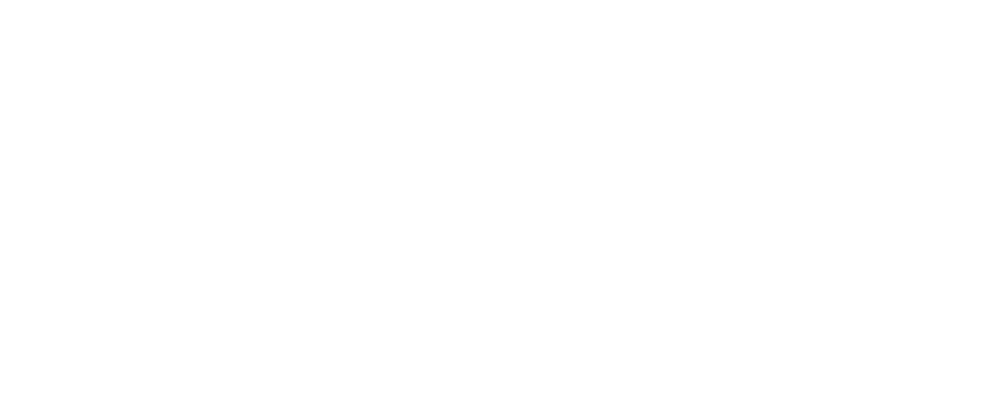

In [755]:
N = 5
plt.figure(figsize=(2*N,4))
coupling = np.logspace(1,2,N)
for i,cpl in enumerate(coupling):
    plt.subplot(2,N,i+1)
    plt.plot(c,((0.1+PC.T)/(1+PC.T+cpl*SST.T))**2)
    plt.subplot(2,N,N+i+1)
    plt.plot(c,(1/(1+cpl*SST.T))**2)

In [753]:
keylist

['180412/M7955/',
 '180516/M8956/',
 '180528/M8959/',
 '180531/M8961/',
 '180618/M8956/',
 '180903/M8961/']

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


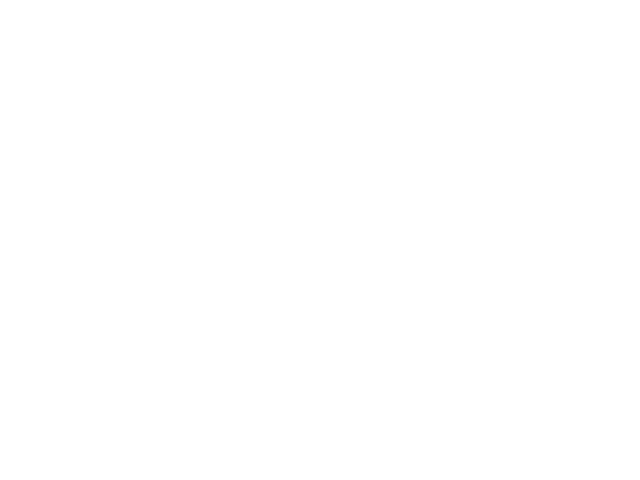

In [761]:
plt.figure()
plt.plot(soriavg[keylist[1]][ontarget_ret_lax[keylist[1]]][2].T)


In [794]:
def fit_couplings(data,PC,SST):
    a_0 = data.max()
    b_0 = data[:,0].mean()
    c_0 = 10
    n_0 = 2
    param_0 = np.array((a_0,b_0,c_0,n_0))
    param_opt = sop.least_squares(lambda param:data.flatten()-sim_vip(param,PC,SST).flatten(),param_0,bounds=(0,np.inf))
    return param_opt['x']

def sim_vip(param,PC,SST):
    a = param[0]
    b = param[1]
    c = param[2]
    n = param[3]
    return ((a*PC+b)/(c*SST+1))**n

In [795]:
ontarget_ret_lax[keylist[-1]].sum()

55

1


<IPython.core.display.Javascript object>


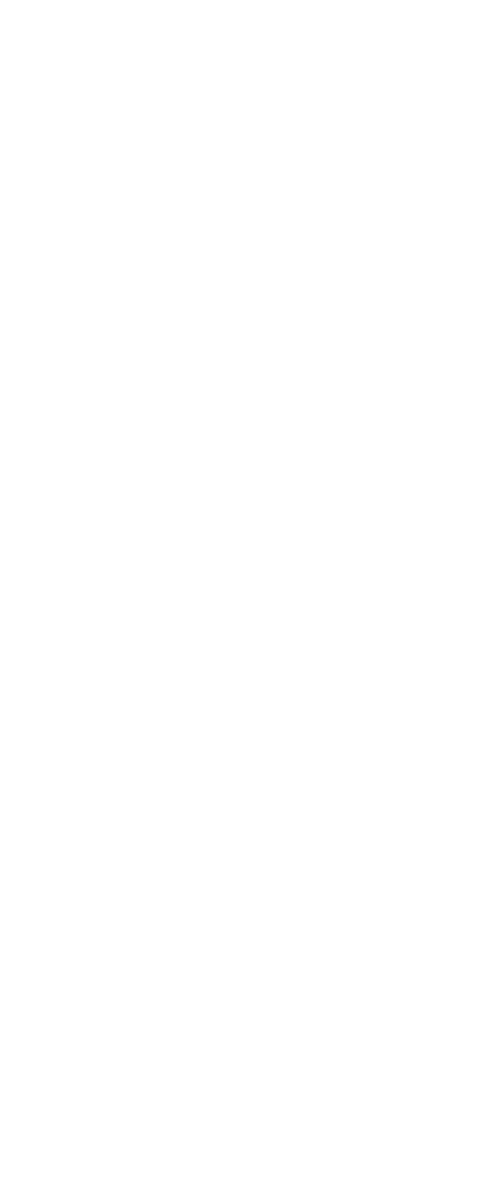

2


<IPython.core.display.Javascript object>


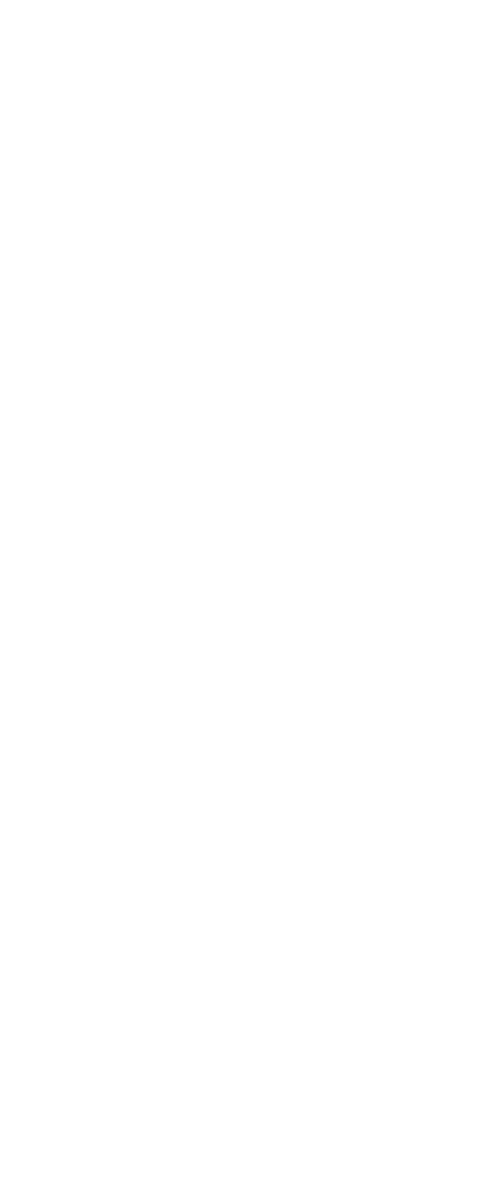

3


<IPython.core.display.Javascript object>

5


<IPython.core.display.Javascript object>

In [796]:
colors = plt.cm.viridis(np.linspace(0,1,5))
expt = 2

for expt in (1,2,3,5):
    print(expt)
    plt.figure(figsize=(5,12))
    for i in range(ontarget_ret_lax[keylist[expt]].sum()):
        plt.subplot(12,5,i+1)
        data = soriavg[keylist[expt]][ontarget_ret_lax[keylist[expt]]][i]
        for i in range(5):
            plt.plot(c,data[i],c=colors[i])

        param_opt = fit_couplings(data,PC,SST)
        sim = sim_vip(param_opt,PC,SST)
        for i in range(5):
            plt.plot(c,sim[i],c=colors[i],linestyle='dashed')

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


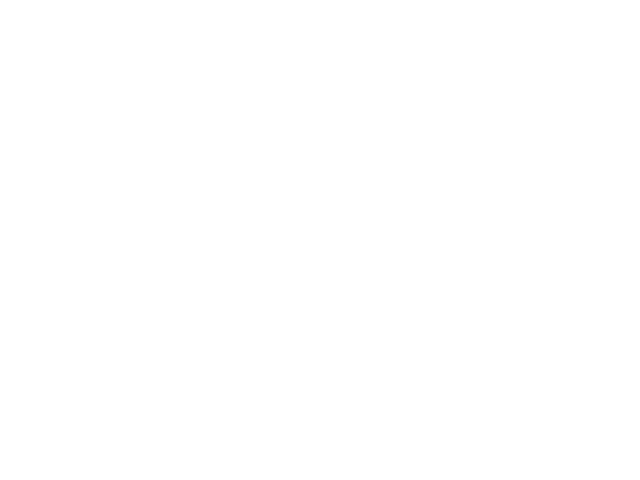

In [724]:
k = 5
plt.figure()
plt.plot(Rgrand.mean(0).T)

In [624]:
proc[keylist[k]]['strialwise'].shape

(258, 1200, 12)

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


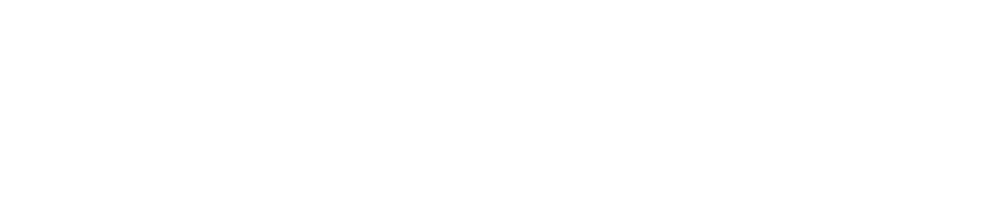

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [640]:
plt.figure(figsize=(10,2))
lkat = 18
k = 5
angle180 = proc[keylist[k]]['angle180']
size = proc[keylist[k]]['size']
contrast = proc[keylist[k]]['contrast']
uangle180 = np.unique(angle180)
usize = np.unique(size)
ucontrast = np.unique(contrast)
for j in range(5):
    for i in range(1,6):
        plt.subplot(1,5,i)
        trialtype = np.logical_and(size==usize[j],contrast==ucontrast[i])
        plt.plot(proc[keylist[k]]['strialwise'][ontarget_ret_lax[keylist[k]]][lkat,trialtype,4:-4].mean(-1))
        plt.axis('off')

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


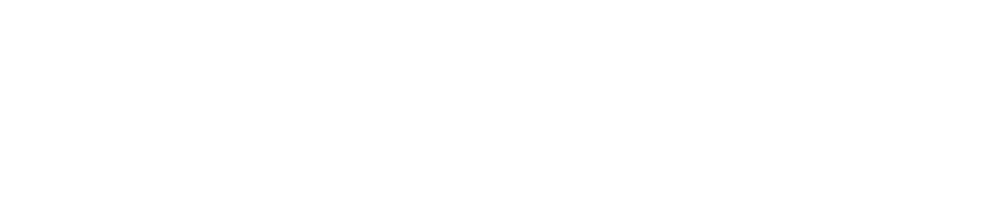

In [647]:
plt.figure(figsize=(10,2))
lkat = 18
k = 5
angle180 = proc[keylist[k]]['angle180']
size = proc[keylist[k]]['size']
contrast = proc[keylist[k]]['contrast']
uangle180 = np.unique(angle180)
usize = np.unique(size)
ucontrast = np.unique(contrast)
# for j in range(5):
#     for i in range(1,6):
j = 0
i = 1
for m in range(4):
    plt.subplot(1,4,m+1)
    trialtype = np.logical_and(np.logical_and(size==usize[j],contrast==ucontrast[i]),angle180==uangle180[m])
    plt.plot(proc[keylist[k]]['strialwise'][ontarget_ret_lax[keylist[k]]][lkat,trialtype])
    plt.ylim(0,1)
    plt.axis('off')

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


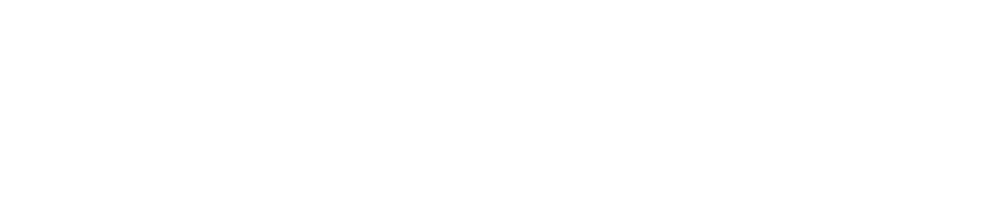

/home/mossing/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [642]:
plt.figure(figsize=(10,2))
lkat = 18
k = 5
for j in range(5):
    for i in range(1,6):
        plt.subplot(1,5,i)
        plt.plot(strialavg[keylist[k]][ontarget_ret_lax[keylist[k]]][lkat,:,j,i,4:-4].mean(-1))
        plt.axis('off')

In [563]:
# import pickle as pkl
# with open('vip_facilitated_size.p', 'wb') as handle:
#     pkl.dump(savedict, handle, protocol=pkl.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>


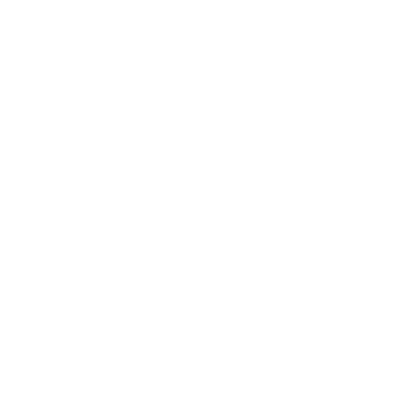

/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [269]:
def snorm_two_curves(soriavg,theserows,lkat):
    keylist = list(lkat.keys())
    snorm = np.array(())
    for key in keylist:
#         biny = np.in1d(np.arange(soriavg[key].shape[1]),theserows)
        binx = np.in1d(np.arange(soriavg[key].shape[2]),theserows)
        to_add = soriavg[key][lkat[key]][:,:,binx]
        to_add = to_add/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        if snorm.size:
            snorm = np.vstack((snorm,to_add))
        else:
            snorm = to_add
    return snorm

def snormup_two_curves(soriavg,theserows,lkat):
    keylist = list(lkat.keys())
    snorm = np.array(())
    for key in keylist:
#         biny = np.in1d(np.arange(soriavg[key].shape[1]),theserows)
        binx = np.in1d(np.arange(soriavg[key].shape[2]),theserows)
        to_add = soriavg[key][lkat[key]][:,:,binx]
        to_add = to_add/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        temp = soriavg[key][lkat[key]]/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        gray = np.tile(temp[:,:,0].mean(1)[:,np.newaxis],(1,theserows.size))[:,np.newaxis,:]
        to_add = np.concatenate((gray,to_add),axis=1)
        if snorm.size:
            snorm = np.vstack((snorm,to_add))
        else:
            snorm = to_add


    return snorm

plt.figure(figsize=(4,4))
s = np.array([5,8.2,13.5,22.2,36.5])
s0 = np.concatenate(((0,),s))
theserows = np.array((2,4))
lkatd = {}
for k in np.array((1,2,3,5)):
    
    lkat = ontarget_ret_lax[keylist[k]] #np.logical_and(ontarget[keylist[k]],ontarget_ret_lax[keylist[k]])
    lkatd[keylist[k]] = lkat
    snorm = (soriavg[keylist[k]]/soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis])
    lbmn,ubmn = ut.bootstrap(snorm[lkat],np.nanmean,axis=0,pct=(16,84))
    gray = snorm[lkat][:,:,0].mean(1)[:,np.newaxis]
#     
    reload(ut)

    # goldenrod = np.array((218,165,32))/255
    salmon = np.array((250,128,114))/255

#     fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='solid',c=goldenrod)
#     fn_inner = lambda x: x[:,theserows[1]].T
#     do_three(s,np.nanmean(snorm[lkat],axis=0),lbmn,ubmn,fn_outer,fn_inner)

#     fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='dashed',c='y')
#     fn_inner = lambda x: x[:,theserows[0]].T
#     do_three(s,np.nanmean(snorm[lkat],axis=0),lbmn,ubmn,fn_outer,fn_inner)

    # # ut.plot_errorbar_hillel(s,snorm[lkat].mean(0)[:,theserows[0]].T,lbmn[:,theserows[0]].T,ubmn[:,theserows[0]].T,linestyle='dashed')
    plt.plot(30,0.5,linestyle='solid',c='m')
    plt.plot(30,0.5,linestyle='dashed',c=salmon)
    plt.plot(s0,np.hstack((snorm[lkat][:,:,0].mean(1)[:,np.newaxis],snorm[lkat][:,:,theserows[1]])).T,alpha=0.12,c='m')
    plt.plot(s0,np.hstack((snorm[lkat][:,:,0].mean(1)[:,np.newaxis],snorm[lkat][:,:,theserows[0]])).T,alpha=0.16,c=salmon)
    whitespace = 0.05
    plt.ylim(0-whitespace,1+whitespace)
    plt.xlabel('size (deg.)')
    plt.ylabel('norm. event rate')
    plt.legend(['50% contrast','12% contrast'])
#     gray = snorm[lkat,:,0].mean(1)
#     plt.scatter(np.zeros_like(gray),gray,c='r')
# plt.savefig('sst_12_50_size_tuning_curves.pdf')
# plt.axis('tight')
snorm = snormup_two_curves(soriavg,theserows,lkatd)
lbmn,ubmn = ut.bootstrap(snorm,np.nanmean,axis=0,pct=(16,84))
fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='solid',c='m')
fn_inner = lambda x: x[1]
do_three(s0,np.nanmean(snorm,axis=0).T,lbmn.T,ubmn.T,fn_outer,fn_inner)
fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='dashed',c=salmon)
fn_inner = lambda x: x[0]
do_three(s0,np.nanmean(snorm,axis=0).T,lbmn.T,ubmn.T,fn_outer,fn_inner)

# plt.savefig('vip_all_12_50_size_tuning_curves.pdf')

In [230]:
np.hstack((snorm[lkat][:,:,0].mean(1)[:,np.newaxis],snorm[lkat][:,:,theserows[1]])).shape

(10, 6)

/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


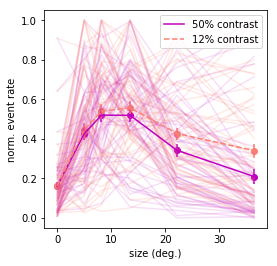

In [22]:
def snorm_two_curves(soriavg,theserows,lkat):
    keylist = list(lkat.keys())
    snorm = np.array(())
    for key in keylist:
#         biny = np.in1d(np.arange(soriavg[key].shape[1]),theserows)
        binx = np.in1d(np.arange(soriavg[key].shape[2]),theserows)
        to_add = soriavg[key][lkat[key]][:,:,binx]
        to_add = to_add/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        if snorm.size:
            snorm = np.vstack((snorm,to_add))
        else:
            snorm = to_add
    return snorm

def snormup_two_curves(soriavg,theserows,lkat):
    keylist = list(lkat.keys())
    snorm = np.array(())
    for key in keylist:
#         biny = np.in1d(np.arange(soriavg[key].shape[1]),theserows)
        binx = np.in1d(np.arange(soriavg[key].shape[2]),theserows)
        to_add = soriavg[key][lkat[key]][:,:,binx]
        to_add = to_add/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        temp = soriavg[key][lkat[key]]/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        gray = np.tile(temp[:,:,0].mean(1)[:,np.newaxis],(1,theserows.size))[:,np.newaxis,:]
        to_add = np.concatenate((gray,to_add),axis=1)
        if snorm.size:
            snorm = np.vstack((snorm,to_add))
        else:
            snorm = to_add


    return snorm

plt.figure(figsize=(4,4))
s = np.array([5,8.2,13.5,22.2,36.5])
s0 = np.concatenate(((0,),s))
theserows = np.array((2,4))
lkatd = {}
for k in np.array((1,2,3,5)):
    
    lkat = np.logical_and(ret_vars[keylist[k]]['paramdict_normal']['amplitude'][()]>0,ontarget_ret_lax[keylist[k]]) #np.logical_and(ontarget[keylist[k]],ontarget_ret_lax[keylist[k]])
    lkatd[keylist[k]] = lkat
    snorm = (soriavg[keylist[k]]/soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis])
    lbmn,ubmn = ut.bootstrap(snorm[lkat],np.nanmean,axis=0,pct=(16,84))
    gray = snorm[lkat][:,:,0].mean(1)[:,np.newaxis]
#     
    reload(ut)

    # goldenrod = np.array((218,165,32))/255
    salmon = np.array((250,128,114))/255

#     fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='solid',c=goldenrod)
#     fn_inner = lambda x: x[:,theserows[1]].T
#     do_three(s,np.nanmean(snorm[lkat],axis=0),lbmn,ubmn,fn_outer,fn_inner)

#     fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='dashed',c='y')
#     fn_inner = lambda x: x[:,theserows[0]].T
#     do_three(s,np.nanmean(snorm[lkat],axis=0),lbmn,ubmn,fn_outer,fn_inner)

    # # ut.plot_errorbar_hillel(s,snorm[lkat].mean(0)[:,theserows[0]].T,lbmn[:,theserows[0]].T,ubmn[:,theserows[0]].T,linestyle='dashed')
    plt.plot(30,0.5,linestyle='solid',c='m')
    plt.plot(30,0.5,linestyle='dashed',c=salmon)
    plt.plot(s0,np.hstack((snorm[lkat][:,:,0].mean(1)[:,np.newaxis],snorm[lkat][:,:,theserows[1]])).T,alpha=0.12,c='m')
    plt.plot(s0,np.hstack((snorm[lkat][:,:,0].mean(1)[:,np.newaxis],snorm[lkat][:,:,theserows[0]])).T,alpha=0.16,c=salmon)
    whitespace = 0.05
    plt.ylim(0-whitespace,1+whitespace)
    plt.xlabel('size (deg.)')
    plt.ylabel('norm. event rate')
    plt.legend(['50% contrast','12% contrast'])
#     gray = snorm[lkat,:,0].mean(1)
#     plt.scatter(np.zeros_like(gray),gray,c='r')
# plt.savefig('sst_12_50_size_tuning_curves.pdf')
# plt.axis('tight')
snorm = snormup_two_curves(soriavg,theserows,lkatd)
lbmn,ubmn = ut.bootstrap(snorm,np.nanmean,axis=0,pct=(16,84))
fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='solid',c='m')
fn_inner = lambda x: x[1]
do_three(s0,np.nanmean(snorm,axis=0).T,lbmn.T,ubmn.T,fn_outer,fn_inner)
fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='dashed',c=salmon)
fn_inner = lambda x: x[0]
do_three(s0,np.nanmean(snorm,axis=0).T,lbmn.T,ubmn.T,fn_outer,fn_inner)

# plt.savefig('vip_fac_12_50_size_tuning_curves.pdf')

In [256]:
key = keylist[1]
soriavg[key][lkatd[key]][:,:,0].mean(1)

array([ 0.01952281,  0.02569329,  0.00607279,  0.01659225])

In [249]:
snorm[0,:,0]

array([ 0.50544323,  0.46482407,  1.        ,  0.86191224,  0.17307987,
        0.02739998])

/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


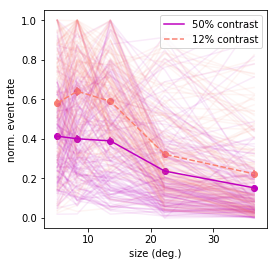

In [23]:
def snorm_two_curves(soriavg,theserows,lkat):
    keylist = list(lkat.keys())
    snorm = np.array(())
    for key in keylist:
#         biny = np.in1d(np.arange(soriavg[key].shape[1]),theserows)
        binx = np.in1d(np.arange(soriavg[key].shape[2]),theserows)
        to_add = soriavg[key][lkat[key]][:,:,binx]
        to_add = to_add/soriavg[key][lkat[key]].max(1).max(1)[:,np.newaxis,np.newaxis]
        if snorm.size:
            snorm = np.vstack((snorm,to_add))
        else:
            snorm = to_add
    return snorm

plt.figure(figsize=(4,4))
s = np.array([5,8.2,13.5,22.2,36.5])
theserows = np.array((2,4))
lkatd = {}
for k in np.array((1,2,3,5)):
    
    lkat = ontarget_ret_lax[keylist[k]] #np.logical_and(ontarget[keylist[k]],ontarget_ret_lax[keylist[k]])
    lkatd[keylist[k]] = lkat
    snorm = (soriavg[keylist[k]]/soriavg[keylist[k]].max(1).max(1)[:,np.newaxis,np.newaxis])
    lbmn,ubmn = ut.bootstrap(snorm[lkat],np.nanmean,axis=0,pct=(16,84))

#     
    reload(ut)

    # goldenrod = np.array((218,165,32))/255
    salmon = np.array((250,128,114))/255

#     fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='solid',c=goldenrod)
#     fn_inner = lambda x: x[:,theserows[1]].T
#     do_three(s,np.nanmean(snorm[lkat],axis=0),lbmn,ubmn,fn_outer,fn_inner)

#     fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='dashed',c='y')
#     fn_inner = lambda x: x[:,theserows[0]].T
#     do_three(s,np.nanmean(snorm[lkat],axis=0),lbmn,ubmn,fn_outer,fn_inner)

    # # ut.plot_errorbar_hillel(s,snorm[lkat].mean(0)[:,theserows[0]].T,lbmn[:,theserows[0]].T,ubmn[:,theserows[0]].T,linestyle='dashed')
    plt.plot(30,0.5,linestyle='solid',c='m')
    plt.plot(30,0.5,linestyle='dashed',c=salmon)
    plt.plot(s,snorm[lkat][:,:,theserows[1]].T,alpha=0.08,c='m')
    plt.plot(s,snorm[lkat][:,:,theserows[0]].T,alpha=0.08,c=salmon)
    whitespace = 0.05
    plt.ylim(0-whitespace,1+whitespace)
    plt.xlabel('size (deg.)')
    plt.ylabel('norm. event rate')
    plt.legend(['50% contrast','12% contrast'])
# plt.savefig('sst_12_50_size_tuning_curves.pdf')
# plt.axis('tight')
snorm = snorm_two_curves(soriavg,theserows,lkatd)
lbmn,ubmn = ut.bootstrap(snorm,np.nanmean,axis=0,pct=(16,84))
fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='solid',c='m')
fn_inner = lambda x: x[1]
do_three(s,np.nanmean(snorm,axis=0).T,lbmn.T,ubmn.T,fn_outer,fn_inner)
fn_outer = lambda x,y,z,w: ut.plot_errorbar_hillel(x,y,z,w,linestyle='dashed',c=salmon)
fn_inner = lambda x: x[0]
do_three(s,np.nanmean(snorm,axis=0).T,lbmn.T,ubmn.T,fn_outer,fn_inner)
plt.savefig('vip_12_50_size_tuning_curves.pdf')

array([  4.48897097e+00,   2.56449462e+00,   3.15600259e-01,
         2.59164608e+00,   5.16959375e-01,   8.29176594e-02,
         6.79061180e-01,   1.06534093e+00,   3.77823583e-01,
         4.36906785e-01,   1.51837216e+00,   2.29677096e+00,
         1.59731025e+00,   1.54259245e+00,   4.61980660e-01,
         3.93390543e-01,   1.82855687e+00,   3.74599562e-01,
         4.99698807e-01,   2.69415045e+00,   1.20772656e+00,
         1.76480145e+00,   6.63513412e-01,  -5.27948881e-01,
        -1.10655785e+00,   2.58189715e+00,   8.90403335e-01,
         3.44926366e+00,   1.15661793e+00,   1.96855509e+00,
         2.03758423e+00,   3.29936121e-01,   8.28893538e-01,
         2.39894081e-01,   1.43622104e+00,   2.64066303e+00,
         1.90265655e+00,   7.60180008e-01,   0.00000000e+00,
         3.87885487e+00,   0.00000000e+00,   1.22513478e+00,
         2.22120937e+00,   3.43783561e-01,   8.69249035e-01,
         7.55316718e-01,   2.07012097e+00,   1.01757773e+00,
         1.72817585e+00,

In [191]:
snorm.shape

(77, 5, 2)

In [151]:
keylist[k]

'180618/M8956/'

In [166]:
keylist[3]

'180531/M8961/'

In [137]:
ret_vars.keys()

dict_keys(['180412/M7955/', '180516/M8956/', '180528/M8959/', '180531/M8961/', '180618/M8956/', '180903/M8961/'])

In [141]:
soriavg[keylist[0]].shape

(431, 5, 5)

<IPython.core.display.Javascript object>


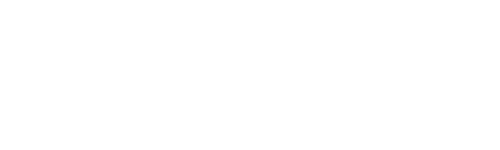

In [144]:
reload(ut)
ut.plot_in_rows(soriavg[keylist[0]][ontarget[keylist[0]]].transpose((0,1,2)))
# plt.plot(soriavgNew[keylist[0]][2])

In [117]:
ut.imshow_in_rows(soriavg[keylist[0]][::10])


KeyError: '180412/M7955/'

<IPython.core.display.Javascript object>


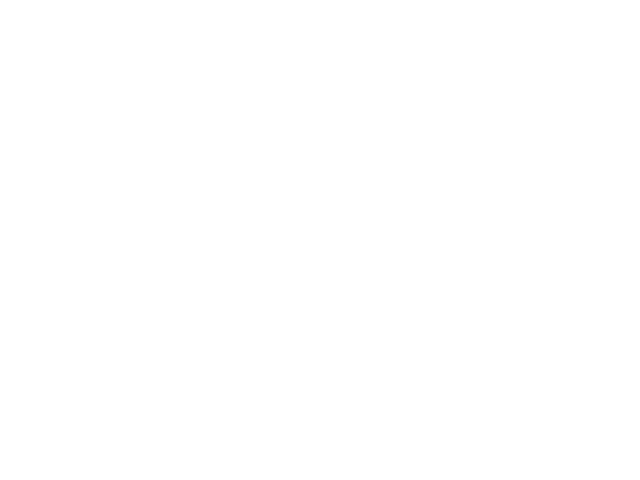

In [97]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(soriavgNew[keylist[0]].mean(0))
plt.subplot(1,2,2)
plt.imshow(soriavg[keylist[0]].mean(0))

<IPython.core.display.Javascript object>


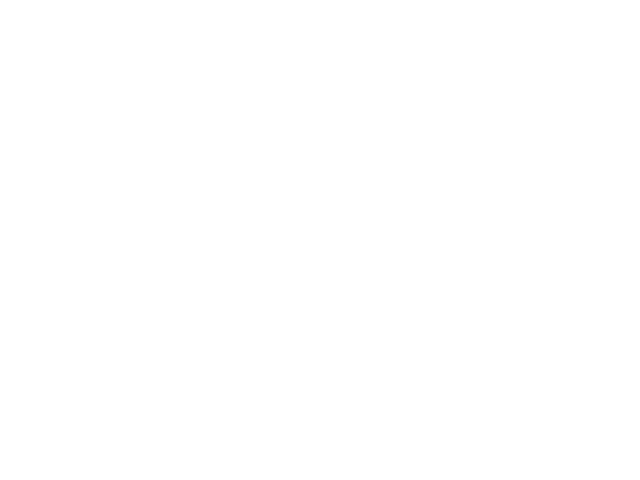

In [99]:
plt.figure()
plt.scatter(straces[keylist[0]].flatten(),soriavgNew[keylist[0]].flatten())

In [58]:
import pdb
pdb.pm()

> /home/mossing/Documents/notebooks/size_contrast/h5py/h5o.pyx(190)h5py.h5o.open()
(Pdb) u
> /home/mossing/Documents/notebooks/size_contrast/h5py/_objects.pyx(55)h5py._objects.with_phil.wrapper()
(Pdb) u
> /home/mossing/Documents/notebooks/size_contrast/h5py/_objects.pyx(54)h5py._objects.with_phil.wrapper()
(Pdb) u
> /home/mossing/anaconda3/lib/python3.6/site-packages/h5py/_hl/group.py(169)__getitem__()
-> oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
(Pdb) u
> /home/mossing/Documents/notebooks/size_contrast/h5py/_objects.pyx(55)h5py._objects.with_phil.wrapper()
(Pdb) u
> /home/mossing/Documents/notebooks/size_contrast/h5py/_objects.pyx(54)h5py._objects.with_phil.wrapper()
(Pdb) u
> /home/mossing/Documents/code/adesnal/pyute.py(485)<listcomp>()
-> to_return = tuple([f[var][:].T for var in desired_vars])
(Pdb) u
> /home/mossing/Documents/code/adesnal/pyute.py(485)loadmat()
-> to_return = tuple([f[var][:].T for var in desired_vars])
(Pdb) u
> /home/mossing/Documents/code/adesna

In [23]:
datafoldbase = '/home/mossing/scratch/2Pdata/'
stimfoldbase = '/home/mossing/scratch/visual_stim/'
datafold = datafoldbase+thisfold+'ot/'
datafiles = [datafold+thisfile+'_ot_'+number+'.rois' for number in ['000','001','002','003']]

In [24]:
traces,ctraces,straces,dfofall,baselineall = gen_traces(datafiles)

In [ ]:
ut.gen_trialwise()

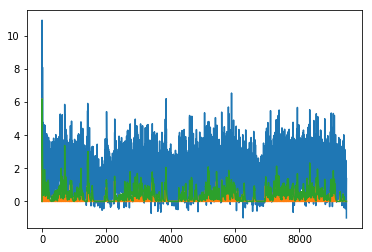

In [25]:
plt.figure()
k = 7
plt.plot(dfofall[k])
plt.plot(straces[k])
plt.plot(ctraces[k])

In [75]:
# soriavg,strialavg,lb,ub,pval,nbydepth,Sspont,Strials = analyze_everything(folds,files,rets,adjust_fns)
soriavg,strialavg,lb,ub,pval,nbydepth,spont,ret_vars = sca.analyze_everything(folds,files,rets,adjust_fns,rgs)

/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/mossing/Documents/code/adesnal/size_contrast_analysis.py:103: RuntimeWarning: Mean of empty slice.
  trialrun[i] = dxdt[frame[0::2][i]:frame[1::2][i]].mean()
/home/mossing/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mossing/Documents/code/adesnal/size_contrast_analysis.py:104: RuntimeWarning: invalid value encountered in greater
  runtrial = trialrun>100


(431, 1000, 12)
0
1
2
3
0.0
45.0
90.0
135.0


/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/io/matlab/mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


(290, 1200, 12)
0
1


/home/mossing/Documents/code/adesnal/size_contrast_analysis.py:138: RuntimeWarning: Mean of empty slice.
  Smean[:,i,j,k,:] = data[:,lkat,:].mean(1)
/home/mossing/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


2
3
0.0
45.0
90.0
135.0


/home/mossing/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/mossing/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/mossing/Documents/code/adesnal/size_contrast_analysis.py:164: RuntimeWarning: Mean of empty slice
  Savg = np.nanmean(np.nanmean(Smean[:,:,:,:,nbefore:-nafter],axis=-1),axis=1)
/home/mossing/Documents/code/adesnal/size_contrast_analysis.py:175: RuntimeWarning: Mean of empty slice.
  spont = spont + Sspont[key].mean(1)/nkeys


(202, 1200, 12)
0
1
2
3
0.0
45.0
90.0
135.0
(163, 1200, 12)
0
1
2
3
0.0
45.0
90.0
135.0
(941, 720, 12)
0
1
2
3
0.0
45.0
90.0
135.0


/home/mossing/Documents/code/adesnal/pyute.py:513: RuntimeWarning: invalid value encountered in true_divide
  this_dfof[i] = (to_add[i]-baseline[i,:])/baseline[i,:]


couldn't do 13
couldn't do 52
couldn't do 64
couldn't do 6
couldn't do 8
couldn't do 14
couldn't do 19
couldn't do 26
couldn't do 39
couldn't do 46
couldn't do 48
couldn't do 51
couldn't do 59
couldn't do 5
couldn't do 8
couldn't do 12
couldn't do 13
couldn't do 14
couldn't do 19
couldn't do 32
couldn't do 36
couldn't do 47
couldn't do 23
couldn't do 35
(258, 1200, 12)


KeyError: "Unable to open object (Object 'dxdt' doesn't exist)"

In [76]:
import pdb
pdb.pm()

> /home/mossing/Documents/notebooks/size_contrast/h5py/h5o.pyx(190)h5py.h5o.open()
(Pdb) u
> /home/mossing/Documents/notebooks/size_contrast/h5py/_objects.pyx(55)h5py._objects.with_phil.wrapper()
(Pdb) u
> /home/mossing/Documents/notebooks/size_contrast/h5py/_objects.pyx(54)h5py._objects.with_phil.wrapper()
(Pdb) u
> /home/mossing/anaconda3/lib/python3.6/site-packages/h5py/_hl/group.py(169)__getitem__()
-> oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
(Pdb) u
> /home/mossing/Documents/notebooks/size_contrast/h5py/_objects.pyx(55)h5py._objects.with_phil.wrapper()
(Pdb) u
> /home/mossing/Documents/notebooks/size_contrast/h5py/_objects.pyx(54)h5py._objects.with_phil.wrapper()
(Pdb) u
> /home/mossing/Documents/code/adesnal/size_contrast_analysis.py(99)analyze_size_contrast()
-> dxdt = f['dxdt'][:].T
(Pdb) datafile
*** NameError: name 'datafile' is not defined
(Pdb) datafiles
['/home/mossing/scratch/2Pdata/180903/M8961/ot/M8961_150_003_ot_000.rois', '/home/mossing/scratch/2Pdata/1

In [61]:
keylist = list(soriavg.keys())

<IPython.core.display.Javascript object>


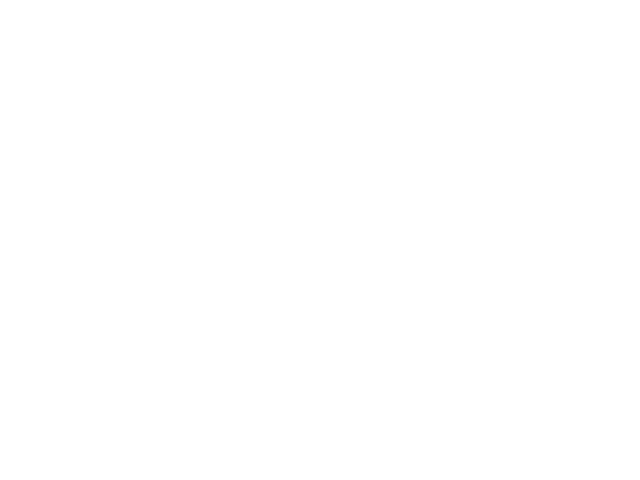

In [65]:
plt.figure()
plt.plot(np.nanmean(soriavg[keylist[3]],0))

In [70]:
ontarget = {}
for key in pval.keys():
    ontarget[key] = pval[key].min(1)<0.05/pval[key].shape[1]

/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
soriavgontarget[key]

In [44]:
# 5x5: [5,9.3,17.3,32.2,60]x[0,0.1,0.22,0.46,1]
# 5x6: [5,8.2,13.5,22.2,36.5]x[0,0.06,0.12,0.25,0.5,1]
# 3x6: [5,13.5,36.5]x[0,0.06,0.12,0.25,0.5,1]
for key in soriavg.keys():
    print(soriavg[key].shape)

(431, 5, 5)
(290, 5, 6)
(202, 5, 6)
(163, 5, 6)
(941, 3, 6)


In [38]:
def imshow_in_rows(arr,rowlen=10):
    rowlen = 10
    nrows = np.ceil(arr.shape[0]/rowlen)
    for k in range(arr.shape[0]):
        plt.subplot(nrows,rowlen,k+1)
        plt.imshow(arr[k])
        plt.axis('off')

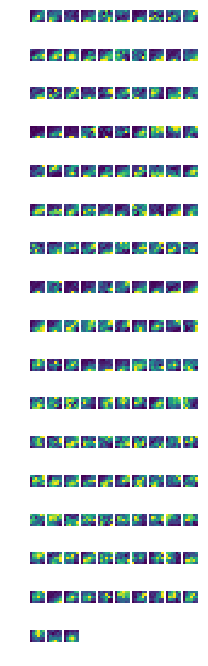

In [39]:
plt.figure(figsize=(3,12))
imshow_in_rows(soriavg[thisfold])

In [40]:
for key in ontarget.keys():
    print((ontarget[key].sum(),np.logical_not(ontarget[key]).sum()))

(33, 398)
(24, 266)
(31, 171)
(33, 130)
(58, 883)


In [43]:
for key in keylist:
    print(key)

NameError: name 'keylist' is not defined

In [42]:
np.logspace(np.log10(5),np.log10(60),6)

array([  5.        ,   8.21875915,  13.50960039,  22.20643035,
        36.50186051,  60.        ])

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
keylist = list(ontarget.keys())
for key in keylist:
#     if not key=='180516/M8956':
        vals = soriavg[key][ontarget[key]].copy()
        mx = vals.max()[np.newaxis,np.newaxis,np.newaxis]
#         vals = vals/mx
        plt.scatter(vals[:,:,0].mean(1),vals[:,2,-1],s=0.5)        
#         plt.xlim((-0.1,1))
#         plt.ylim((-0.1,1))
plt.xlim((-0.1,2.1))
plt.ylim((-0.1,2.1))

plt.subplot(2,2,2)
for key in keylist:
#     if not key=='180516/M8956':
        vals = soriavg[key][ontarget[key]].copy()
        mx = vals.max()[np.newaxis,np.newaxis,np.newaxis]
    #     vals = vals/mx
        plt.scatter(vals[:,:,0].mean(1),vals[np.random.permutation(vals.shape[0]),2,-1],s=0.5)        
    #     plt.xlim((-0.1,1))
    #     plt.ylim((-0.1,1))

plt.subplot(2,2,3)
for key in keylist:
#     if not key=='180516/M8956':
        vals = soriavg[key][ontarget[key]].copy()
        mx = vals.max()[np.newaxis,np.newaxis,np.newaxis]
        vals = vals/mx
        plt.scatter(vals[:,:,0].mean(1),vals[:,2,-1],s=0.5)        
#         plt.xlim((-0.1,1))
#         plt.ylim((-0.1,1))

plt.subplot(2,2,4)
for key in keylist:
#     if not key=='180516/M8956':
        vals = soriavg[key][ontarget[key]].copy()
        mx = vals.max()[np.newaxis,np.newaxis,np.newaxis]
        vals = vals/mx
        plt.scatter(vals[:,:,0].mean(1),vals[np.random.permutation(vals.shape[0]),2,-1],s=0.5)        
    #     plt.xlim((-0.1,1))
    #     plt.ylim((-0.1,1))

In [ ]:
plt.figure()
XX = np.array(())
YY = np.array(())
for key in keylist:
        vals = soriavg[key][ontarget[key]].copy()
        mx = vals.max()[np.newaxis,np.newaxis,np.newaxis]
        vals = vals/mx
        plt.scatter(vals[:,:,0].mean(1),vals[:,2,-1],s=0.5)
        xx = vals[:,:,0].mean(1)
        yy = vals[:,2,-1]
        plt.scatter(xx,yy,s=0.5)  # np.random.permutation(vals.shape[0])
        XX = ut.add_to_array(XX,xx)
        YY = ut.add_to_array(YY,yy)

matdict = sio.loadmat('updated_pc_vip_15deg_0_100.mat')
matdict['dataZ'] = XX
matdict['dataW'] = YY
matdict['labelX'] = 'inferred event rate 0% contrast'
matdict['labelY'] = 'inferred event rate 100% contrast'
plt.figure()
plt.scatter(matdict['dataX'],matdict['dataY'],alpha=1,s=1)
plt.scatter(matdict['dataZ'],matdict['dataW'],alpha=1,s=1)
# sio.savemat('updated_pc_vip_15deg_0_100.mat',matdict)

In [ ]:
plt.figure()
XX = np.array(())
YY = np.array(())
for key in keylist:
        vals = soriavg[key][ontarget[key]].copy()
        mx = 1#vals.max()[np.newaxis,np.newaxis,np.newaxis]
        vals = vals/mx
        plt.scatter(vals[:,:,0].mean(1),vals[:,2,-1],s=0.5)
        xx = vals[:,:,0].mean(1)
        yy = vals[:,2,-1]
        plt.scatter(xx,yy,s=0.5)  # np.random.permutation(vals.shape[0])
        XX = ut.add_to_array(XX,xx)
        YY = ut.add_to_array(YY,yy)
        
matdict = sio.loadmat('updated_pc_vip_15deg_0_100_non_norm.mat')
matdict['dataZ'] = XX
matdict['dataW'] = YY
matdict['labelX'] = 'inferred event rate 0% contrast'
matdict['labelY'] = 'inferred event rate 100% contrast'
plt.figure()
plt.scatter(matdict['dataX'],matdict['dataY'],alpha=1,s=1)
plt.scatter(matdict['dataZ'],matdict['dataW'],alpha=1,s=1)
# sio.savemat('updated_pc_vip_15deg_0_100_non_norm.mat',matdict)

<IPython.core.display.Javascript object>


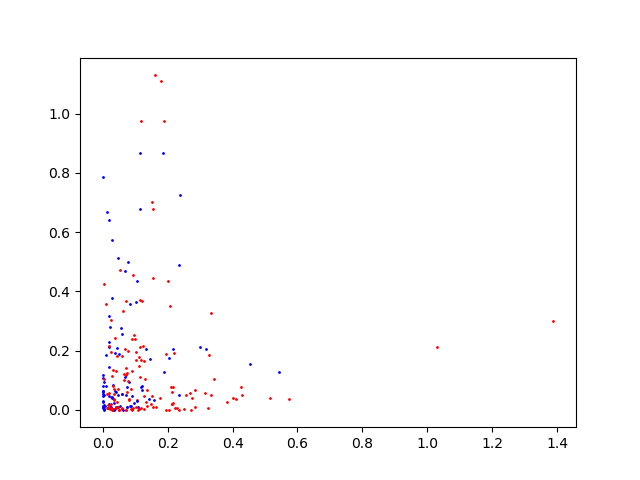

<IPython.core.display.Javascript object>


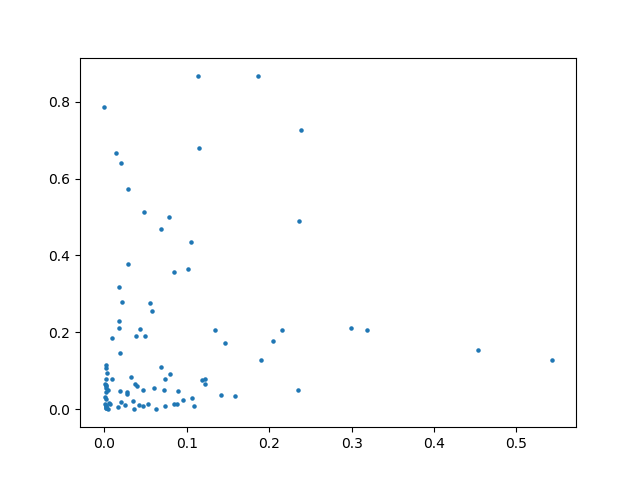

In [117]:
plt.figure()
XX = np.array(())
YY = np.array(())
ZZ = np.array(())
WW = np.array(())
for key in keylist:
    
    vals = soriavg[key][ontarget[key]].copy()
    mx = vals.max()[np.newaxis,np.newaxis,np.newaxis]
    mx = 1
    
    bd = int(np.cumsum(nbydepth[key])[0])
    
    vals = soriavg[key][:bd][ontarget[key][:bd]].copy()
    vals = vals/mx
    xx = vals[:,:,0].mean(1)
    yy = vals[:,2,-1]
    plt.scatter(xx,yy,s=1,c='b')  # np.random.permutation(vals.shape[0])
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
    
    bd = int(np.cumsum(nbydepth[key])[2])
    
    vals = soriavg[key][bd:][ontarget[key][bd:]].copy()
    vals = vals/mx
    zz = vals[:,:,0].mean(1)
    ww = vals[:,2,-1]
    plt.scatter(zz,ww,s=1,c='r')  # np.random.permutation(vals.shape[0])
    ZZ = ut.add_to_array(ZZ,zz)
    WW = ut.add_to_array(WW,ww)

matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['dataZ'] = ZZ
matdict['dataW'] = WW
matdict['labelX'] = 'inferred event rate 0% contrast'
matdict['labelY'] = 'inferred event rate 100% contrast'
plt.figure()
plt.scatter(matdict['dataX'],matdict['dataY'],s=5)
# sio.savemat('updated_vip_superficial_deep_15deg_0_100_non_norm.mat',matdict)

In [ ]:
plt.figure()
XX = np.array(())
YY = np.array(())
ZZ = np.array(())
WW = np.array(())
for key in keylist:
    
    vals = soriavg[key][ontarget[key]].copy()
    mx = vals.max()[np.newaxis,np.newaxis,np.newaxis]
    
    bd = int(np.cumsum(nbydepth[key])[0])
    
    vals = soriavg[key][:bd][ontarget[key][:bd]].copy()
    vals = vals/mx
    xx = vals[:,:,0].mean(1)
    yy = vals[:,2,-1]
    plt.scatter(xx,yy,s=1,c='b')  # np.random.permutation(vals.shape[0])
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
    
    bd = int(np.cumsum(nbydepth[key])[2])
    
    vals = soriavg[key][bd:][ontarget[key][bd:]].copy()
    vals = vals/mx
    zz = vals[:,:,0].mean(1)
    ww = vals[:,2,-1]
    plt.scatter(zz,ww,s=1,c='r')  # np.random.permutation(vals.shape[0])
    ZZ = ut.add_to_array(ZZ,zz)
    WW = ut.add_to_array(WW,ww)
    
matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['dataZ'] = ZZ
matdict['dataW'] = WW
matdict['labelX'] = 'inferred event rate 0% contrast'
matdict['labelY'] = 'inferred event rate 100% contrast'
plt.figure()
plt.scatter(matdict['dataX'],matdict['dataY'],s=5)
# sio.savemat('updated_vip_superficial_deep_15deg_0_100.mat',matdict)

In [ ]:
keylist = ['180412/M7955/']
# plt.figure()
XX = np.array(())
YY = np.array(())
for key in keylist:
    
    vals = soriavg[key].copy() #[ontarget[key]].copy()
    mx = 1 #vals.max()[np.newaxis,np.newaxis,np.newaxis]
    vals = vals/mx
    print(vals.shape)
    if vals.shape[2]==5:
        xx = vals[:,-1,1]
        yy = vals[:,-1,-1]
    else:
        xx = np.array(())
        yy = np.array(())
#     plt.scatter(xx,yy,s=1,c='b')  # np.random.permutation(vals.shape[0])
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
    
matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate 0% contrast'
matdict['labelY'] = 'inferred event rate 100% contrast'
plt.figure()
plt.scatter(matdict['dataX'],matdict['dataY'],s=10*vals[:,0,-1])
plt.plot(matdict['dataY'],matdict['dataY'],c='r')
plt.axis('equal')
# sio.savemat('updated_vip_sst_60deg_12_100_non_norm.mat',matdict)

In [ ]:
keylist = ['180412/M7955/']
# plt.figure()
XX = np.array(())
YY = np.array(())
for key in keylist:
    
    vals = soriavg[key].copy() #[ontarget[key]].copy()
    mx = 1 #vals.max()[np.newaxis,np.newaxis,np.newaxis]
    vals = vals/mx
    print(vals.shape)
    if vals.shape[2]==5:
        xx = vals[:,-2,1]
        yy = vals[:,-2,-1]
    else:
        xx = np.array(())
        yy = np.array(())
#     plt.scatter(xx,yy,s=1,c='b')  # np.random.permutation(vals.shape[0])
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
    
matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate 0% contrast'
matdict['labelY'] = 'inferred event rate 100% contrast'
plt.figure()
plt.scatter(matdict['dataX'],matdict['dataY'],s=10*vals[:,0,-1])
plt.plot(matdict['dataY'],matdict['dataY'],c='r')
plt.axis('equal')
# sio.savemat('updated_vip_sst_60deg_12_100_non_norm.mat',matdict)

In [ ]:
plt.figure()
XX = np.array(())
YY = np.array(())
for key in keylist:
    
    vals = soriavg[key][ontarget[key]].copy()
    mx = vals.max()[np.newaxis,np.newaxis,np.newaxis]
    
    
    vals = soriavg[key][ontarget[key]].copy()
    vals = vals/mx
    print(vals.shape)
    if vals.shape[2]==5:
        xx = vals[:,-1,1]
        yy = vals[:,-1,-1]
    else:
        xx = np.array(())
        yy = np.array(())
    plt.scatter(xx,yy,s=1,c='b')  # np.random.permutation(vals.shape[0])
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
    
matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate 0% contrast'
matdict['labelY'] = 'inferred event rate 100% contrast'
plt.figure()
plt.scatter(matdict['dataX'],matdict['dataY'],s=1)
plt.plot(matdict['dataY'],matdict['dataY'])
plt.axis('equal')
# sio.savemat('updated_vip_sst_60deg_12_100.mat',matdict)

<IPython.core.display.Javascript object>


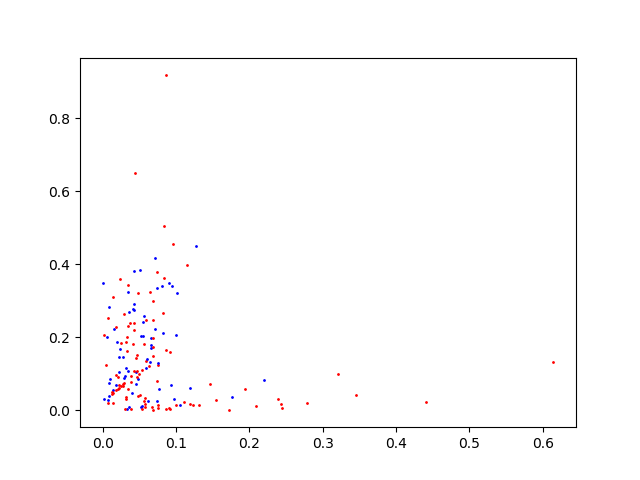

In [216]:
plt.figure()
for key in keylist:
    vals = soriavg[key][ontarget[key]].copy()
    mx = vals.max()[np.newaxis,np.newaxis,np.newaxis]
    
    bd = int(np.cumsum(nbydepth[key])[0])
    
    vals = soriavg[key][:bd][ontarget[key][:bd]].copy()
    vals = vals/mx
    plt.scatter(vals[:,:,0].mean(1),vals[:,2,-1],s=1,c='b')
    
    bd = int(np.cumsum(nbydepth[key])[2])
    
    vals = soriavg[key][bd:][ontarget[key][bd:]].copy()
    vals = vals/mx
    plt.scatter(vals[:,:,0].mean(1),vals[:,2,-1],s=1,c='r')

<IPython.core.display.Javascript object>


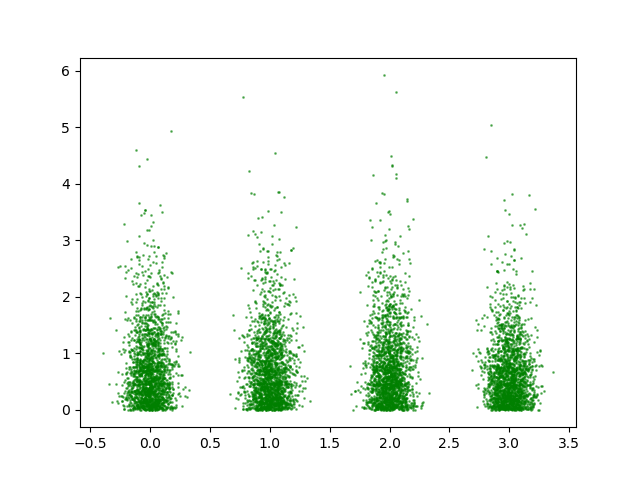

In [212]:
plt.figure()
for key in pval.keys():
    for i in range(pval[key].shape[0]):
        plt.scatter(np.array((0,1,2,3))+0.1*np.random.randn(4),-np.log10(pval[key][i]),s=1,c='g',alpha=0.5)

In [65]:
ucontrast = np.array([0,0.06,0.12,0.25,0.5,1])

In [66]:
lb[thisfold].shape

(941, 4, 3, 6)

In [83]:
list(ontarget.keys())

['180412/M7955/',
 '180516/M8956/',
 '180528/M8959/',
 '180531/M8961/',
 '180618/M8956/']

In [84]:
keylist = list(ontarget.keys())
keylist.remove(keylist[3])
keylist.remove(keylist[0])

<IPython.core.display.Javascript object>


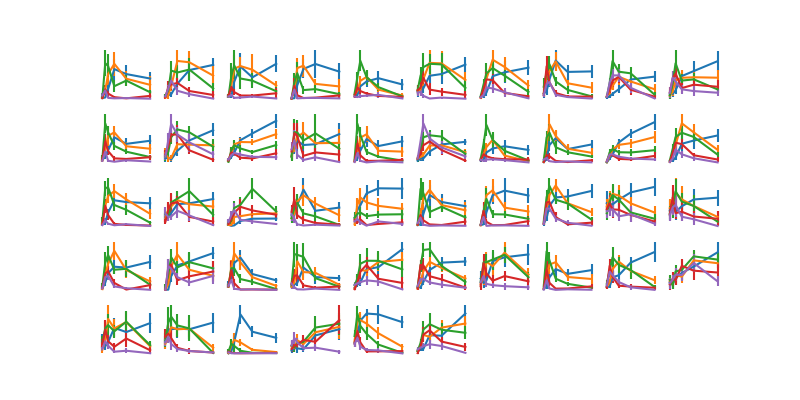

<IPython.core.display.Javascript object>


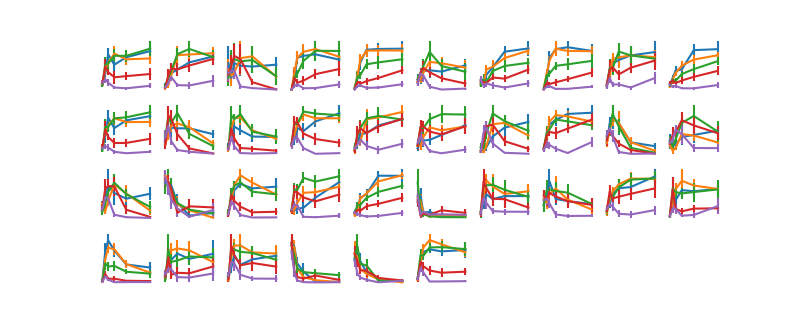

<IPython.core.display.Javascript object>


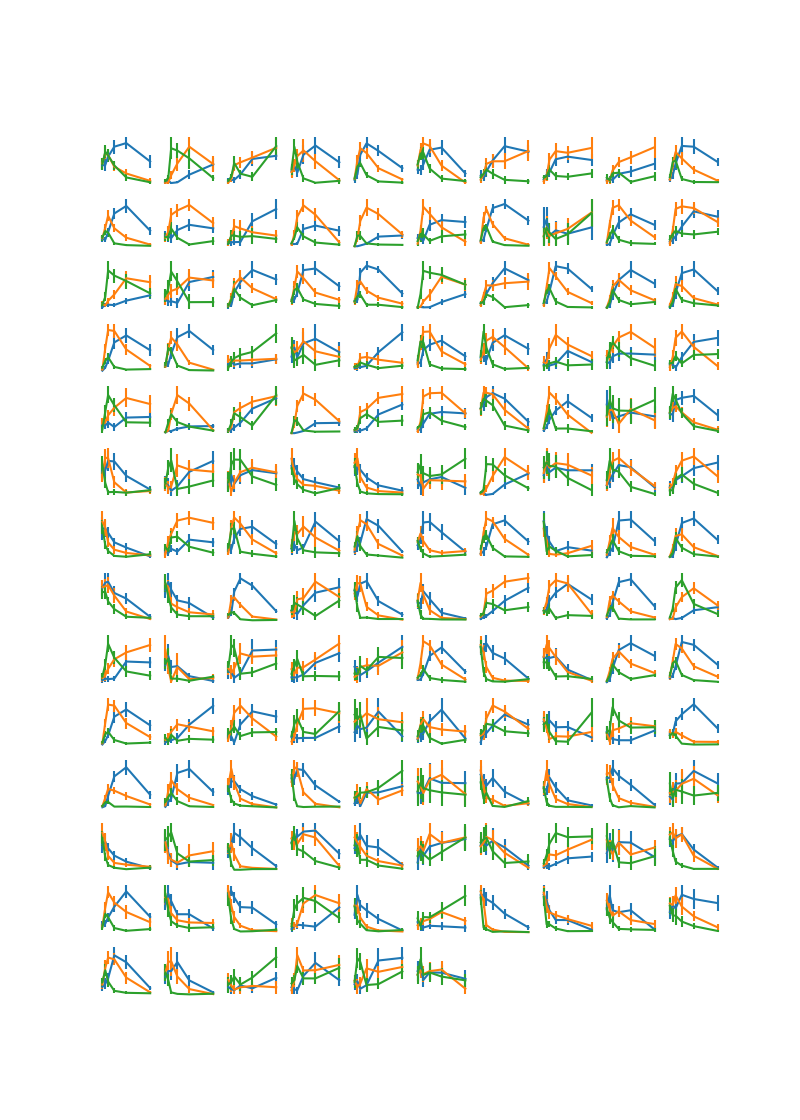

In [85]:
for key in keylist:
    grid_dims = np.array((np.ceil(ontarget[key].sum()/10),10))
    plt.figure(figsize=tuple(0.8*grid_dims[::-1]))
    for k in range(ontarget[key].sum()):
        plt.subplot(grid_dims[0],grid_dims[1],k+1)
        nvals = soriavg[key].shape[-1]
        plot_errorbars(100*ucontrast[:nvals],soriavg[key][ontarget[key]][k],lb[key][ontarget[key]][k].mean(0),ub[key][ontarget[key]][k].mean(0))
        plt.axis('off')

In [110]:
facilitated = {}
suppressed = {}

for key in keylist:
    suppressed[key] = np.logical_and(ontarget,soriavg[key][:,0,-1]<soriavg[key][:,0,0])
    facilitated[key] = np.logical_and(ontarget,soriavg[key][:,0,-1]>soriavg[key][:,0,0])

In [111]:
s36 = soriavg.copy()
for key in keylist:
    if s36[key].shape[1]==5:
        s36[key] = s36[key][:,::2]

In [114]:
s36[keylist[2]].shape

(941, 3, 6)

In [115]:
def concatenate_by_key(d_val,d_ind,keys):
    to_return = np.array(())
    for key in keys:
        vals = d_val[key]
        inds = d_ind[key].astype('bool')
        if to_return.shape[0]:
            to_return = np.concatenate((to_return,vals[inds]))
        else:
            to_return = vals[inds]
        return to_return

In [116]:
soriavg[keylist[-1]].shape

(941, 3, 6)

In [117]:
s_supp = concatenate_by_key(s36,suppressed,keylist)
s_fac = concatenate_by_key(s36,facilitated,keylist)

In [119]:
s_supp.shape

(42, 3, 6)

In [120]:
s_fac.shape

(248, 3, 6)

<IPython.core.display.Javascript object>


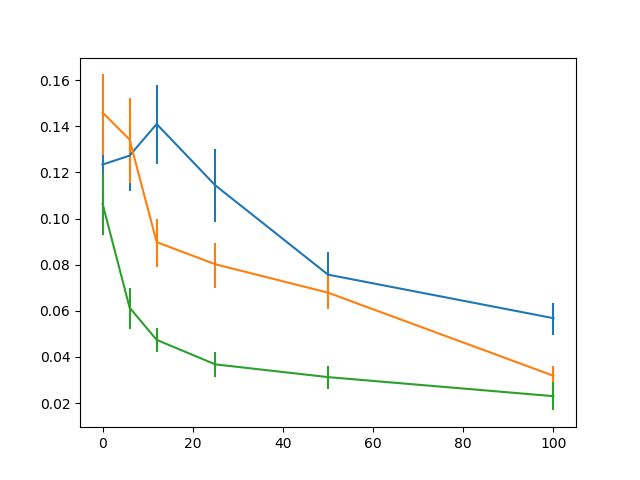

In [121]:
plt.figure()
plot_bootstrapped_errorbars(100*ucontrast,s_supp,axis=0)

<IPython.core.display.Javascript object>


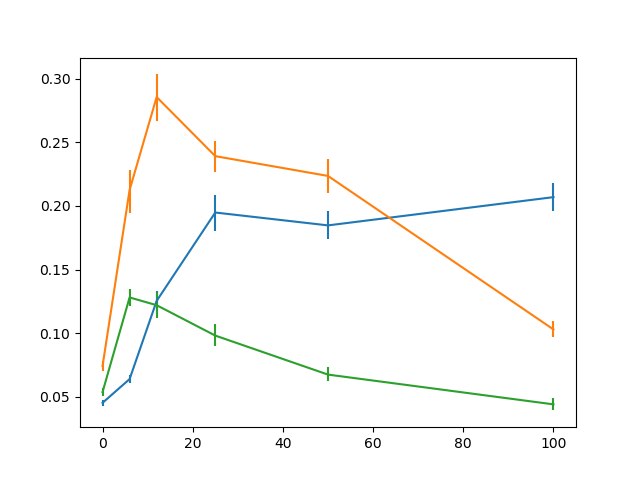

In [122]:
plt.figure()
plot_bootstrapped_errorbars(100*ucontrast,s_fac,axis=0)

In [140]:
keylist_scatter = list(soriavg.keys())
for key in keylist_scatter:
    print(key)
keylist_scatter.remove(keylist_scatter[3])

180412/M7955/
180516/M8956/
180528/M8959/
180531/M8961/
180618/M8956/
180321/M7955/


In [141]:
np.linspace(5,36.5,5)

array([  5.   ,  12.875,  20.75 ,  28.625,  36.5  ])

In [150]:
keylist_scatter

['180412/M7955/',
 '180516/M8956/',
 '180528/M8959/',
 '180618/M8956/',
 '180321/M7955/']

In [2]:
# blcutoff = 1
# ds = 10
# blspan = 3000
# nbefore = 4
# nafter = 4
# def gen_trialwise(datafiles,blcutoff=blcutoff,blspan=blspan,frame_adjust=None): #nbefore=nbefore,nafter=nafter
#     trialwise = np.array(())
#     ctrialwise = np.array(())
#     strialwise = np.array(())
#     try:
#         for datafile in datafiles:
#             frm = sio.loadmat(datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][1:]
#             if frame_adjust:
#                 frm = frame_adjust(frm)
#             to_add = sio.loadmat(datafile,squeeze_me=True)['corrected']
#     #         baseline = np.percentile(to_add,blcutoff,axis=1)
#             baseline = sfi.percentile_filter(to_add[:,::ds],blcutoff,(1,int(blspan/ds)))
#             baseline = np.repeat(baseline,ds,axis=1)
#     #         if baseline.shape[1]<to_add.shape[1]:
#     #             baseline = np.hstack((baseline,np.repeat(baseline[:,-1],to_add.shape[1]-baseline.shape[1])))
#             if baseline.shape[1]>to_add.shape[1]:
#                 baseline = baseline[:,:to_add.shape[1]]
#             c = np.zeros_like(to_add)
#             s = np.zeros_like(to_add)
#             for i in range(c.shape[0]):
#     #                 dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
#                 dfof = (to_add[i]-baseline[i,:])/baseline[i,:]
#                 c[i],s[i],_,_,_  = deconvolve(dfof,penalty=1)
#             to_add = ut.trialize(to_add,frm,nbefore,nafter)
#             c = ut.trialize(c,frm,nbefore,nafter)
#             s = ut.trialize(s,frm,nbefore,nafter)
#             try:
#                 trialwise = np.concatenate((trialwise,to_add),axis=0)
#                 ctrialwise = np.concatenate((ctrialwise,c),axis=0)
#                 strialwise = np.concatenate((strialwise,s),axis=0)
#             except:
#                 trialwise = to_add.copy()
#                 ctrialwise = np.concatenate((ctrialwise,c),axis=0)
#                 strialwise = np.concatenate((strialwise,s),axis=0)
#     except:
#         for datafile in datafiles:
#             frm = sio.loadmat(datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][1:]
#             if frame_adjust:
#                 frm = frame_adjust(frm)
#             with h5py.File(datafile,mode='r') as f:
#                 to_add = f['corrected'][:].T
#                 to_add[np.isnan(to_add)] = 0
#     #             baseline = np.percentile(to_add,blcutoff,axis=1)
#                 baseline = sfi.percentile_filter(to_add[:,::ds],blcutoff,(1,int(blspan/ds)))
#                 baseline = np.repeat(baseline,ds,axis=1)
#                 for i in range(baseline.shape[0]):
#                     baseline[i] = sfi.gaussian_filter1d(baseline[i],blspan/2)
#     #             if baseline.shape[1]<to_add.shape[1]:
#     #                 baseline = np.hstack((baseline,np.repeat(baseline[:,-1],to_add.shape[1]-baseline.shape[1])))
#                 if baseline.shape[1]>to_add.shape[1]:
#                     baseline = baseline[:,:to_add.shape[1]]
#                 c = np.zeros_like(to_add)
#                 s = np.zeros_like(to_add)
#                 dfof = np.zeros_like(to_add)
#                 for i in range(c.shape[0]):
#     #                 dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
#                     dfof[i] = (to_add[i]-baseline[i,:])/baseline[i,:]
#                     try:
#                         c[i],s[i],_,_,_  = deconvolve(dfof[i],penalty=1)#,sn=5e-3)
#                     except:
# #                         throwaway = 0
#                         print("in "+datafile+" couldn't do "+str(i))
#                 to_add_temp = ut.trialize(dfof,frm,nbefore,nafter)
#                 ctemp = ut.trialize(c,frm,nbefore,nafter)
#                 stemp = ut.trialize(s,frm,nbefore,nafter)
#                 try:
#                     trialwise = np.concatenate((trialwise,to_add_temp),axis=0)
#                     ctrialwise = np.concatenate((ctrialwise,ctemp),axis=0)
#                     strialwise = np.concatenate((strialwise,stemp),axis=0)
# #                     print(to_add.shape)
#                 except:
#                     trialwise = to_add_temp.copy()
#                     ctrialwise = ctemp.copy()
#                     strialwise = stemp.copy()
#     return trialwise,ctrialwise,strialwise

In [3]:
# def get_nbydepth(datafiles):
#     nbydepth = np.zeros((len(datafiles),))
#     for i,datafile in enumerate(datafiles):
#         with h5py.File(datafile,mode='r') as f:
#             nbydepth[i] = (f['corrected'][:].T.shape[0])
#     return nbydepth

In [4]:
# ret = {}
# paramdict = {}
# pval = {}
# trialrun = {}
# nbydepth = {}
# spont = {}

In [5]:
#     def gen_traces(datafiles,blcutoff=blcutoff,blspan=blspan): #nbefore=nbefore,nafter=nafter
#         trialwise = np.array(())
#         ctrialwise = np.array(())
#         strialwise = np.array(())
#         dfofall = np.array(())
#         baselineall = np.array(())
#         for datafile in datafiles:
#             frm = sio.loadmat(datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][1:]
#             with h5py.File(datafile,mode='r') as f:
#                 to_add = f['corrected'][:].T
#                 to_add[np.isnan(to_add)] = 0
#     #             baseline = np.percentile(to_add,blcutoff,axis=1)
#                 baseline = sfi.percentile_filter(to_add[:,::ds],blcutoff,(1,int(blspan/ds)))
#                 baseline = np.repeat(baseline,ds,axis=1)
#                 for i in range(baseline.shape[0]):
#                     baseline[i] = sfi.gaussian_filter1d(baseline[i],blspan/2)
#     #             if baseline.shape[1]<to_add.shape[1]:
#     #                 baseline = np.hstack((baseline,np.repeat(baseline[:,-1],to_add.shape[1]-baseline.shape[1])))
#                 if baseline.shape[1]>to_add.shape[1]:
#                     baseline = baseline[:,:to_add.shape[1]]
#                 c = np.zeros_like(to_add)
#                 s = np.zeros_like(to_add)
#                 dfof = np.zeros_like(to_add)
#                 for i in range(c.shape[0]):
#     #                 dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
#                     dfof[i] = (to_add[i]-baseline[i,:])/baseline[i,:]
#                     try:
#                         c[i],s[i],_,_,_  = deconvolve(dfof[i],penalty=1)#,sn=5e-3)
#                     except:
# #                         throwaway = 0
#                         print("in "+datafile+" couldn't do "+str(i))
#                 try:
#                     trialwise = np.concatenate((trialwise,to_add),axis=0)
#                     ctrialwise = np.concatenate((ctrialwise,c),axis=0)
#                     strialwise = np.concatenate((strialwise,s),axis=0)
#                     dfofall = np.concatenate((dfofall,dfof),axis=0)
#                     baselineall = np.concatenate((baselineall,baseline),axis=0)
#                 except:
#                     trialwise = to_add.copy()
#                     ctrialwise = c.copy()
#                     strialwise = s.copy()
#                     dfofall = dfof.copy()
#                     baselineall = baseline.copy()
#         return trialwise,ctrialwise,strialwise,dfofall,baselineall

In [6]:
# def analyze_size_contrast(datafiles,stimfile,retfile=None,frame_adjust=None,nbefore=nbefore,nafter=nafter,rg=(1,0)):
#     nbydepth = get_nbydepth(datafiles)
#     trialwise,ctrialwise,strialwise,_ = ut.gen_precise_trialwise(datafiles,frame_adjust=frame_adjust,rg=rg,nbefore=nbefore,nafter=nafter) # rg temporary! # removed precise_ TEMPORARY!
#     zstrialwise = sst.zscore(strialwise.reshape((strialwise.shape[0],-1)).T).T.reshape(strialwise.shape)
    
#     result = sio.loadmat(stimfile,squeeze_me=True)['result'][()]
    
#     infofile = sio.loadmat(datafiles[0][:-5]+'.mat',squeeze_me=True)
#     frame = infofile['info'][()]['frame'][()]#[1:]
#     frame = frame[rg[0]:frame.size+rg[1]]
#     if frame_adjust:
#         frame = frame_adjust(frame)
    
#     data = strialwise #[:,:,nbefore:-nafter]
    
#     try:
#         dxdt = sio.loadmat(datafiles[1],squeeze_me=True)['dxdt']
#     except:
#         with h5py.File(datafiles[1],mode='r') as f:
#             dxdt = f['dxdt'][:].T
            
#     trialrun = np.zeros(frame[0::2].shape)
#     for i in range(len(trialrun)):
#         trialrun[i] = dxdt[frame[0::2][i]:frame[1::2][i]].mean()
#     runtrial = trialrun>100
    
#     pval = np.zeros(strialwise.shape[0])
#     for i in range(strialwise.shape[0]):
#         _,pval[i] = sst.ttest_rel(data[i,:,nbefore-1],data[i,:,nbefore+1])
        
#     stimparams = result['stimParams']
        
#     indexlut,stimp = np.unique(stimparams,axis=1,return_inverse=True)
    
#     angle = stimparams[0]
#     size = stimparams[1]
#     contrast = stimparams[4]
    
#     ucontrast = np.unique(contrast)
#     uangle = np.unique(angle)
#     usize = np.unique(size)
#     ncontrast = len(ucontrast)
#     nangle = len(uangle)
#     nsize = len(usize)
    
#     angle180 = np.remainder(angle,180)
#     uangle180 = np.unique(angle180)
#     nangle180 = len(uangle180)
    
#     Smean = np.zeros((data.shape[0],nangle180,nsize,ncontrast,data.shape[2]))
#     Stavg = np.zeros((data.shape[0],nangle180,nsize,ncontrast,int(data.shape[1]/nangle/nsize/ncontrast)))
    
#     Strials = {}
#     Sspont = {}
#     for i in range(nangle180):
#         for j in range(nsize):
#             for k in range(ncontrast):
#                 lkat = np.logical_and(runtrial,np.logical_and(angle180==uangle180[i],np.logical_and(size==usize[j],contrast==ucontrast[k])))
#                 Smean[:,i,j,k,:] = data[:,lkat,:].mean(1)
#                 Strials[(i,j,k)] = data[:,lkat,nbefore:-nafter].mean(2)
#                 Sspont[(i,j,k)] = data[:,lkat,:nbefore].mean(2)
    
#     lb = np.zeros((strialwise.shape[0],nangle180,nsize,ncontrast))
#     ub = np.zeros((strialwise.shape[0],nangle180,nsize,ncontrast))
#     # mn = np.zeros((strialwise.shape[0],nangle180,nsize,ncontrast))
    
#     for i in range(nangle180):
#         print(i)
#         for j in range(nsize):
#             for k in range(ncontrast):
#                 lb[:,i,j,k],ub[:,i,j,k] = ut.bootstrap(Strials[(i,j,k)],np.mean,axis=1,pct=(16,84))
#                 # mn[:,i,j,k] = np.nanmean(Strials[(i,j,k)],axis=1)
    
#     pval = np.zeros((strialwise.shape[0],nangle180))
# #     for i in range(pval.shape[0]):
# #         print(i)
#     for j,theta in enumerate(uangle180):
# #         print(theta)
#         _,pval[:,j] = sst.ttest_rel(Sspont[(j,2,ncontrast-1)],Strials[(j,2,ncontrast-1)],axis=1)
# #         _,pval[:,j] = sst.mannwhitneyu(Sspont[(j,np.argmin(np.abs(usize-20)),ncontrast-1)],Strials[(j,np.argmin(np.abs(usize-20)),ncontrast-1)],alternative='two-sided')
                
#     Savg = np.nanmean(np.nanmean(Smean[:,:,:,:,nbefore:-nafter],axis=-1),axis=1)
    
# #     Storiavg = Stavg.mean(1)
#     # _,pval = sst.ttest_ind(Storiavg[:,0,-1].T,Storiavg[:,0,0].T)
    
#     #suppressed = np.logical_and(pval<0.05,Savg[:,0,-1]<Savg[:,0,0])
#     #facilitated = np.logical_and(pval<0.05,Savg[:,0,-1]>Savg[:,0,0])
    
#     return Savg,Smean,lb,ub,pval,Sspont,Strials

In [7]:
# soriavg = {}
# strialavg = {}
# lb = {}
# ub = {}
# pval = {}
# nbydepth = {}
# Sspont = {}
# Strials = {}

In [8]:
# folds = []

In [9]:
# def analyze_everything(folds,files,rets,adjust_fns,rgs):
#     soriavg = {}
#     strialavg = {}
#     lb = {}
#     ub = {}
#     pval = {}
#     nbydepth = {}
#     datafoldbase = '/home/mossing/scratch/2Pdata/'
#     stimfoldbase = '/home/mossing/scratch/visual_stim/'
#     for thisfold,thisfile,retnumber,frame_adjust,rg in zip(folds,files,rets,adjust_fns,rgs):
#         datafold = datafoldbase+thisfold+'ot/'
#         datafiles = [thisfile+'_ot_'+number+'.rois' for number in ['000','001','002','003']]

#         stimfold = stimfoldbase+thisfold
#         stimfile = thisfile+'.mat'

#         datafiles = [datafold+file for file in datafiles]
#         stimfile = stimfold+stimfile
#         retfile = datafoldbase+thisfold+'retinotopy_'+thisfile[-3:]+'.mat'

#         nbefore = 4
#         nafter = 4
#         #  removed temporarily
#         soriavg[thisfold],strialavg[thisfold],lb[thisfold],ub[thisfold],pval[thisfold],Sspont[thisfold],Strials[thisfold]= analyze_size_contrast(datafiles,stimfile,retfile,frame_adjust=frame_adjust,nbefore=nbefore,nafter=nafter,rg=rg) # sca. temporary!
#         nbydepth[thisfold] = get_nbydepth(datafiles)
#     return soriavg,strialavg,lb,ub,pval,nbydepth,Sspont,Strials